# Random Forest Model Training on All Competition Datasets
This notebook provides a step-by-step process to:
1. Read and preprocess all datasets in the `Competition_data` folder.
2. Perform feature engineering and data visualization.
3. Train a binary classification model on each dataset using Random Forest.
4. Evaluate and visualize the model performance for each dataset.
5. Save the predictions and evaluation metrics for each dataset.

In [1]:

import pandas as pd
import os

# Path to the main competition data folder
competition_data_dir = '../Group_DS34/Competition_data'  # Update this path

# Function to load dataset files from a specific folder
def load_dataset(dataset_folder):
    """Load X_train, X_test, y_train, and y_predict files from a given dataset folder."""
    X_train = pd.read_csv(os.path.join(dataset_folder, 'X_train.csv'))
    X_test = pd.read_csv(os.path.join(dataset_folder, 'X_test.csv'))
    y_train = pd.read_csv(os.path.join(dataset_folder, 'y_train.csv'))
    y_predict = pd.read_csv(os.path.join(dataset_folder, 'y_predict.csv'))
    return X_train, X_test, y_train, y_predict

# List all dataset directories in the main folder
dataset_folders = [os.path.join(competition_data_dir, d) for d in os.listdir(competition_data_dir) if os.path.isdir(os.path.join(competition_data_dir, d))]
dataset_folders


['../Group_DS34/Competition_data/Dataset_2',
 '../Group_DS34/Competition_data/Dataset_35',
 '../Group_DS34/Competition_data/Dataset_5',
 '../Group_DS34/Competition_data/Dataset_32',
 '../Group_DS34/Competition_data/Dataset_4',
 '../Group_DS34/Competition_data/Dataset_33',
 '../Group_DS34/Competition_data/Dataset_3',
 '../Group_DS34/Competition_data/Dataset_34',
 '../Group_DS34/Competition_data/Dataset_45',
 '../Group_DS34/Competition_data/Dataset_42',
 '../Group_DS34/Competition_data/Dataset_27',
 '../Group_DS34/Competition_data/Dataset_18',
 '../Group_DS34/Competition_data/Dataset_20',
 '../Group_DS34/Competition_data/Dataset_16',
 '../Group_DS34/Competition_data/Dataset_29',
 '../Group_DS34/Competition_data/Dataset_11',
 '../Group_DS34/Competition_data/Dataset_43',
 '../Group_DS34/Competition_data/Dataset_44',
 '../Group_DS34/Competition_data/Dataset_10',
 '../Group_DS34/Competition_data/Dataset_17',
 '../Group_DS34/Competition_data/Dataset_28',
 '../Group_DS34/Competition_data/Datas

In [2]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing: Scaling and visualization
def preprocess_and_visualize(X_train, y_train, dataset_name):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Convert scaled data back to DataFrame for visualization
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_df['target'] = y_train.values
    
    # Visualize distribution of features with respect to the target
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(X_train.columns[:6], 1):  # Limiting to the first 6 features for brevity
        plt.subplot(2, 3, i)
        sns.histplot(data=X_train_scaled_df, x=feature, hue='target', element="step", kde=True)
        plt.title(f'{dataset_name} - Distribution of {feature}')
    plt.tight_layout()
    plt.show()
    
    return X_train_scaled_df


In [3]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Model Training and Evaluation
def train_and_evaluate_model(X_train, y_train, X_test, y_test, dataset_name):
    # Train-test split for further model validation within training set
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initialize a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_sub, y_train_sub)

    # Predictions on validation and test sets
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Performance on validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    print(f"{dataset_name} - Validation Accuracy: {val_accuracy:.2f}")
    print(f"{dataset_name} - Validation F1 Score: {val_f1:.2f}")

    # Detailed Classification Report on Test Set
    print(f"\n{dataset_name} - Classification Report on Test Set:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

    return model, y_test_pred


Processing Dataset_2...
DEBUG INFO: Dataset_2 - y_train.keys(): Index(['target'], dtype='object')


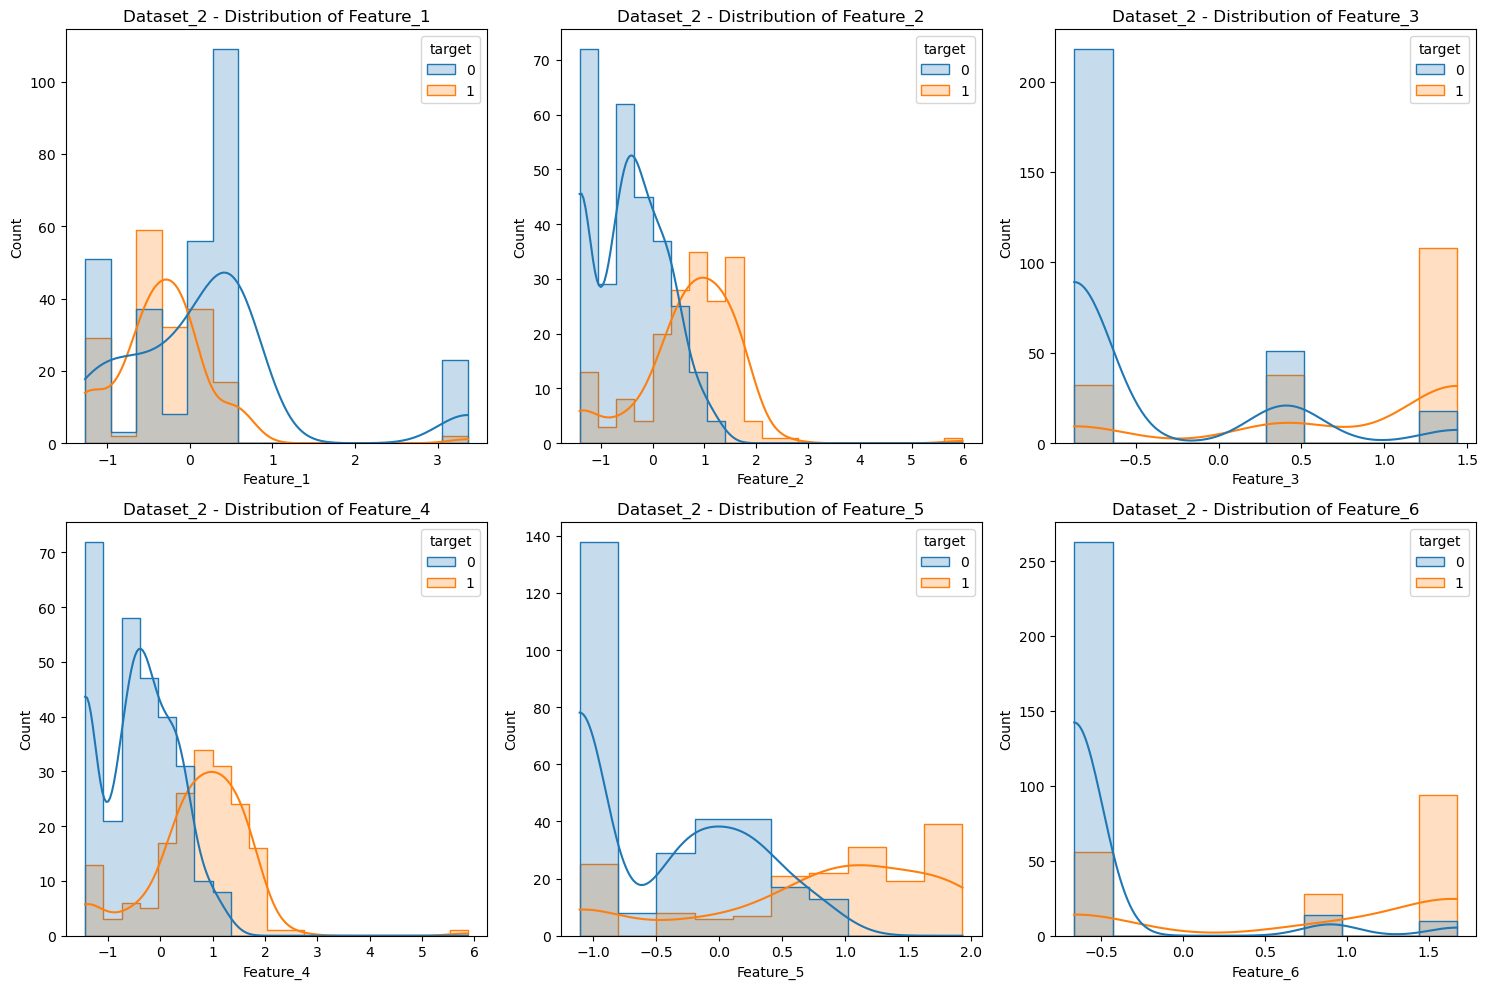

Dataset_2 - Validation Accuracy: 0.98
Dataset_2 - Validation F1 Score: 0.97

Dataset_2 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       168
           1       0.97      0.64      0.77       143

    accuracy                           0.83       311
   macro avg       0.87      0.81      0.82       311
weighted avg       0.86      0.83      0.82       311

Saved predictions for Dataset_2 to ../Group_DS34/Competition_data/Dataset_2/y_predict.csv.

Processing Dataset_35...
DEBUG INFO: Dataset_35 - y_train.keys(): Index(['target'], dtype='object')


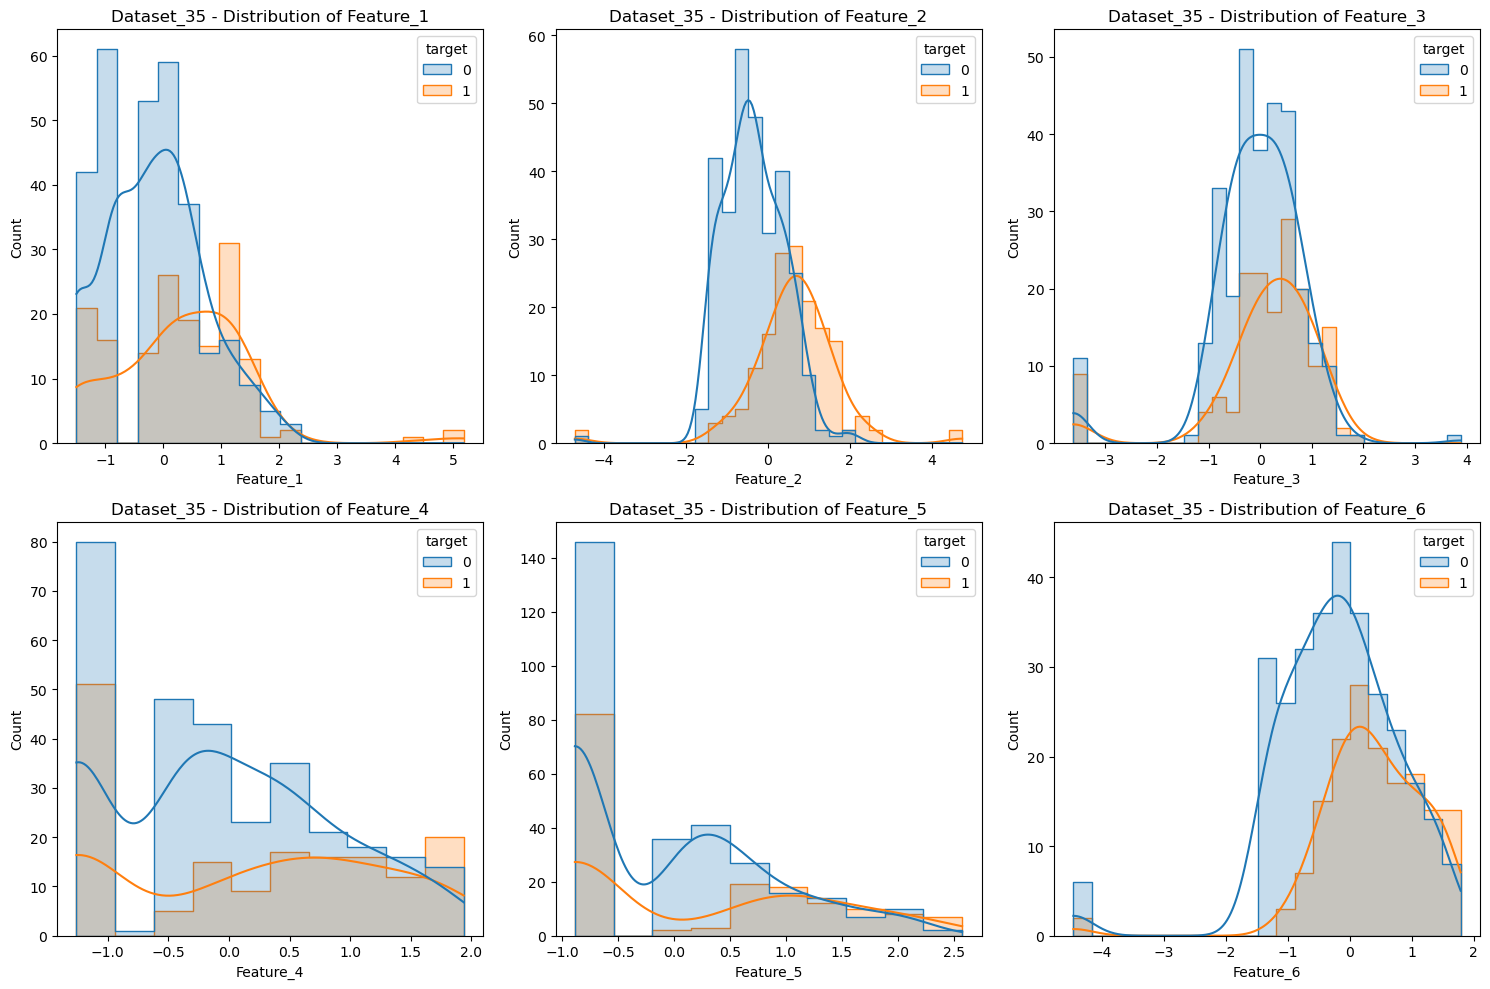

Dataset_35 - Validation Accuracy: 0.76
Dataset_35 - Validation F1 Score: 0.52

Dataset_35 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.18      0.98      0.31        42
           1       0.99      0.32      0.48       266

    accuracy                           0.41       308
   macro avg       0.59      0.65      0.39       308
weighted avg       0.88      0.41      0.46       308

Saved predictions for Dataset_35 to ../Group_DS34/Competition_data/Dataset_35/y_predict.csv.

Processing Dataset_5...
DEBUG INFO: Dataset_5 - y_train.keys(): Index(['target'], dtype='object')


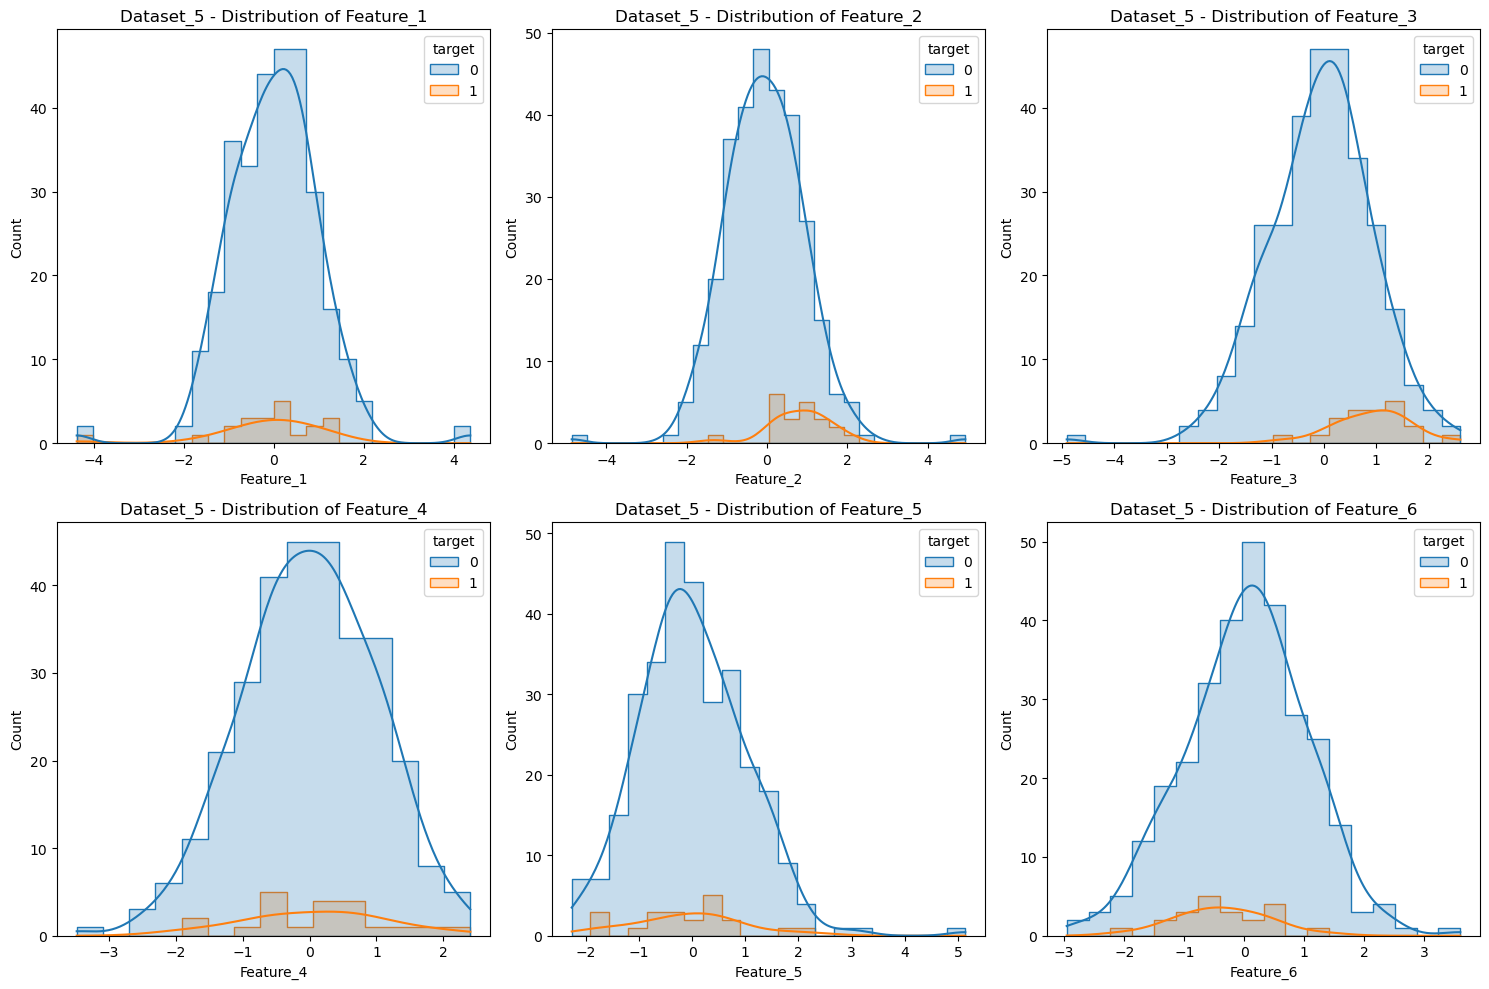

Dataset_5 - Validation Accuracy: 0.92
Dataset_5 - Validation F1 Score: 0.00

Dataset_5 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        72
           1       1.00      0.00      0.00       144

    accuracy                           0.33       216
   macro avg       0.67      0.50      0.25       216
weighted avg       0.78      0.33      0.17       216

Saved predictions for Dataset_5 to ../Group_DS34/Competition_data/Dataset_5/y_predict.csv.

Processing Dataset_32...
DEBUG INFO: Dataset_32 - y_train.keys(): Index(['target'], dtype='object')


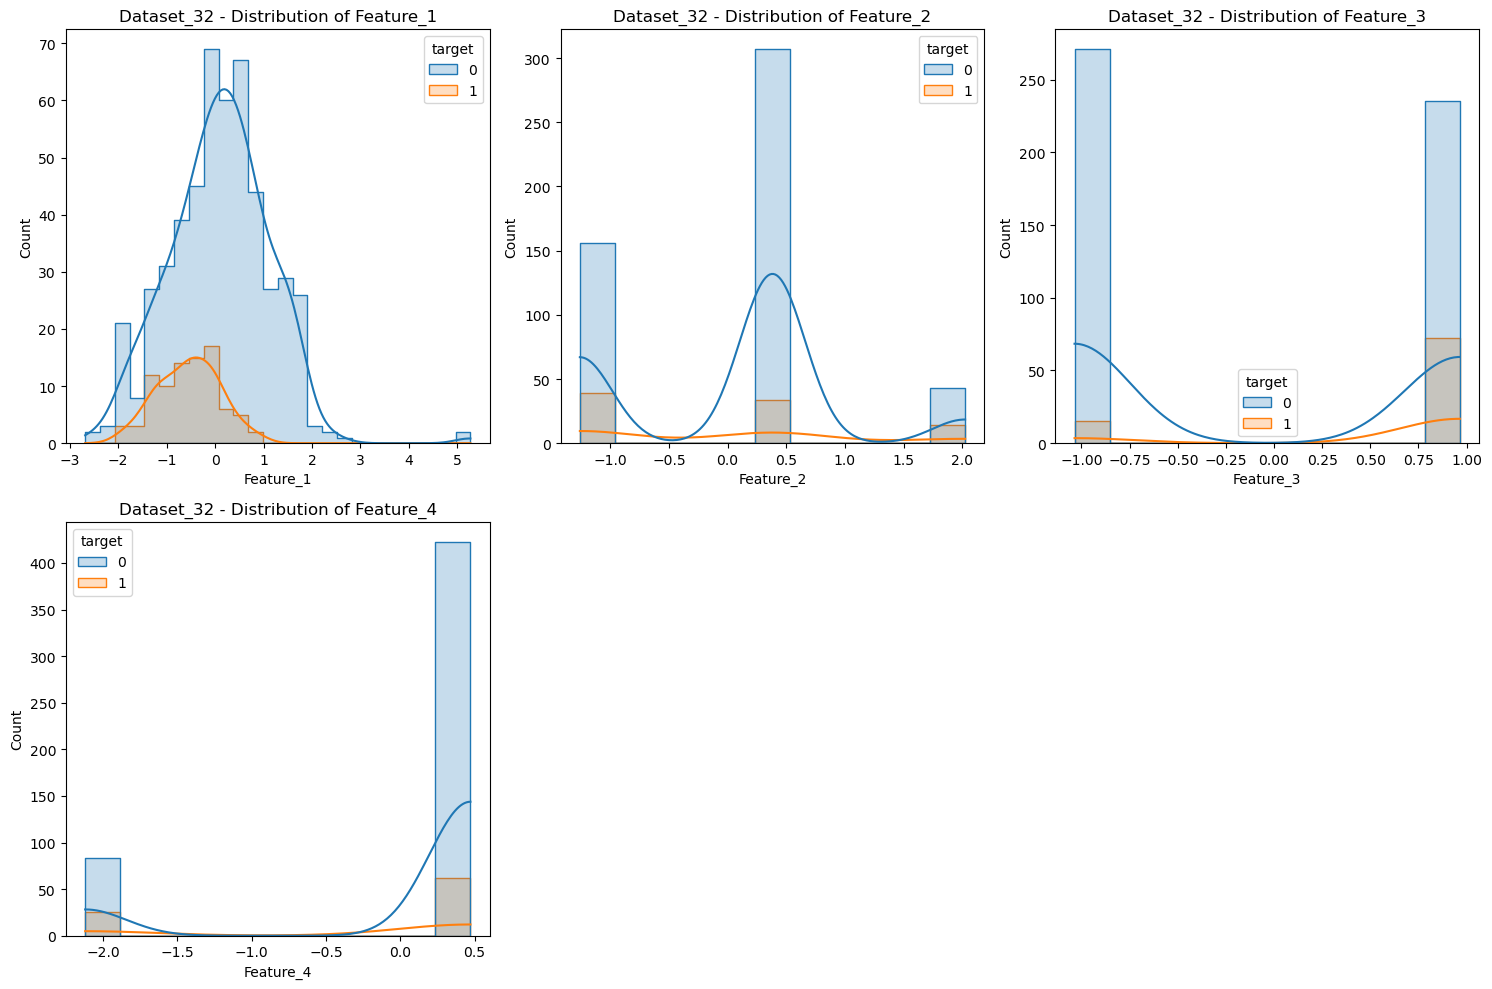

Dataset_32 - Validation Accuracy: 0.81
Dataset_32 - Validation F1 Score: 0.21

Dataset_32 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.19      0.33       396

    accuracy                           0.19       396
   macro avg       0.50      0.60      0.16       396
weighted avg       1.00      0.19      0.33       396

Saved predictions for Dataset_32 to ../Group_DS34/Competition_data/Dataset_32/y_predict.csv.

Processing Dataset_4...
DEBUG INFO: Dataset_4 - y_train.keys(): Index(['target'], dtype='object')


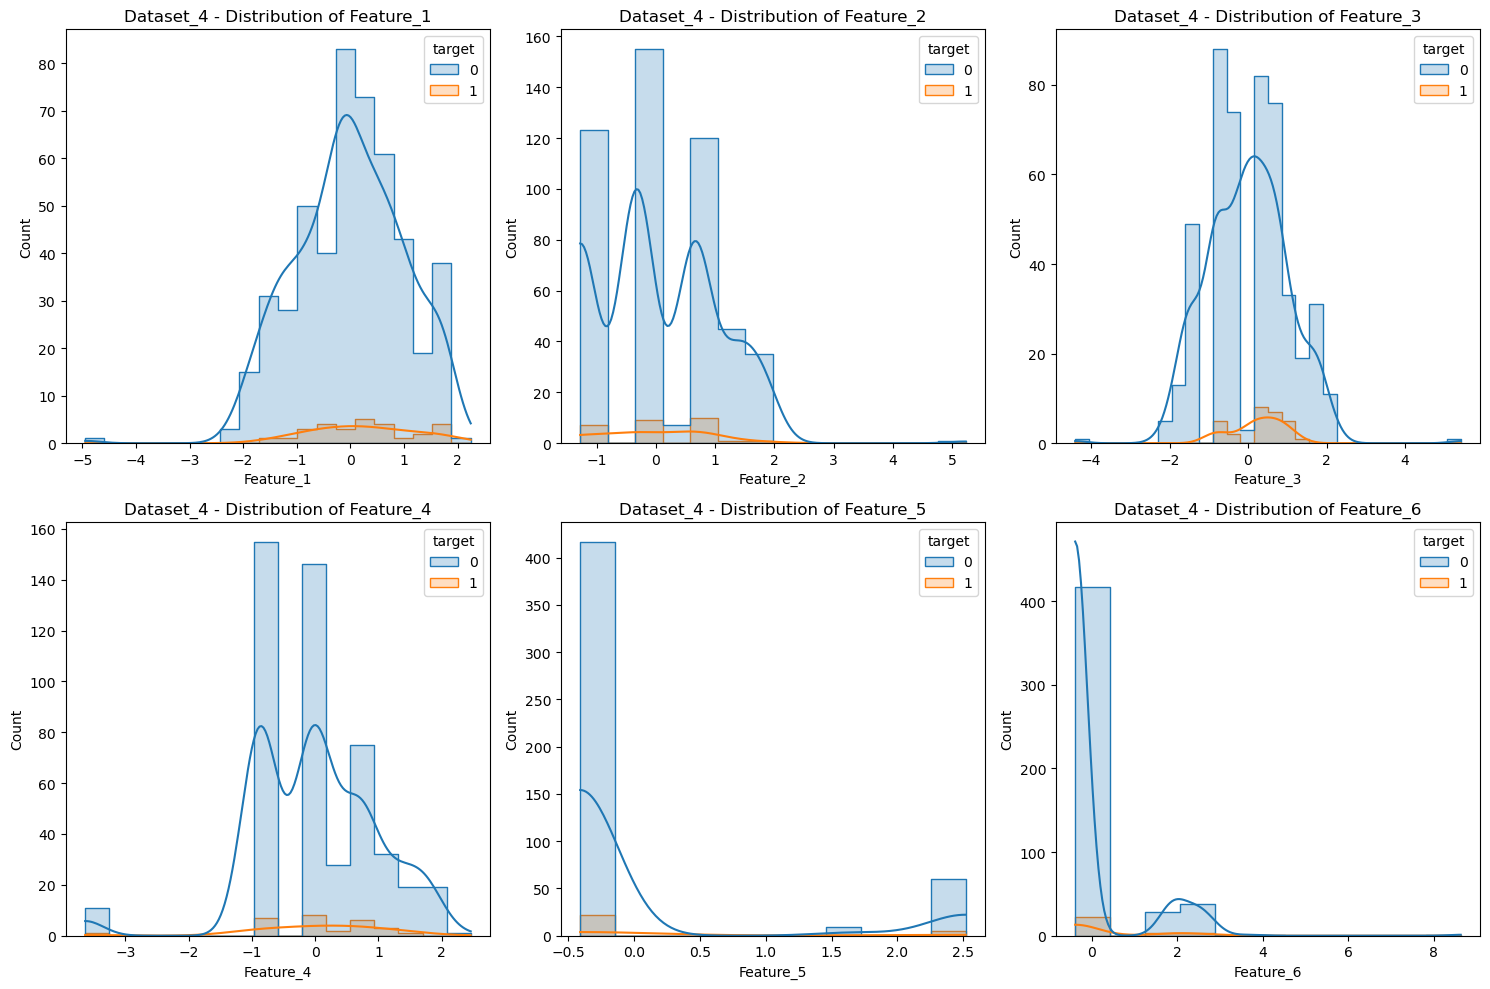

Dataset_4 - Validation Accuracy: 0.95
Dataset_4 - Validation F1 Score: 0.00

Dataset_4 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       176
           1       1.00      0.01      0.01       168

    accuracy                           0.51       344
   macro avg       0.76      0.50      0.35       344
weighted avg       0.75      0.51      0.35       344

Saved predictions for Dataset_4 to ../Group_DS34/Competition_data/Dataset_4/y_predict.csv.

Processing Dataset_33...
DEBUG INFO: Dataset_33 - y_train.keys(): Index(['target'], dtype='object')


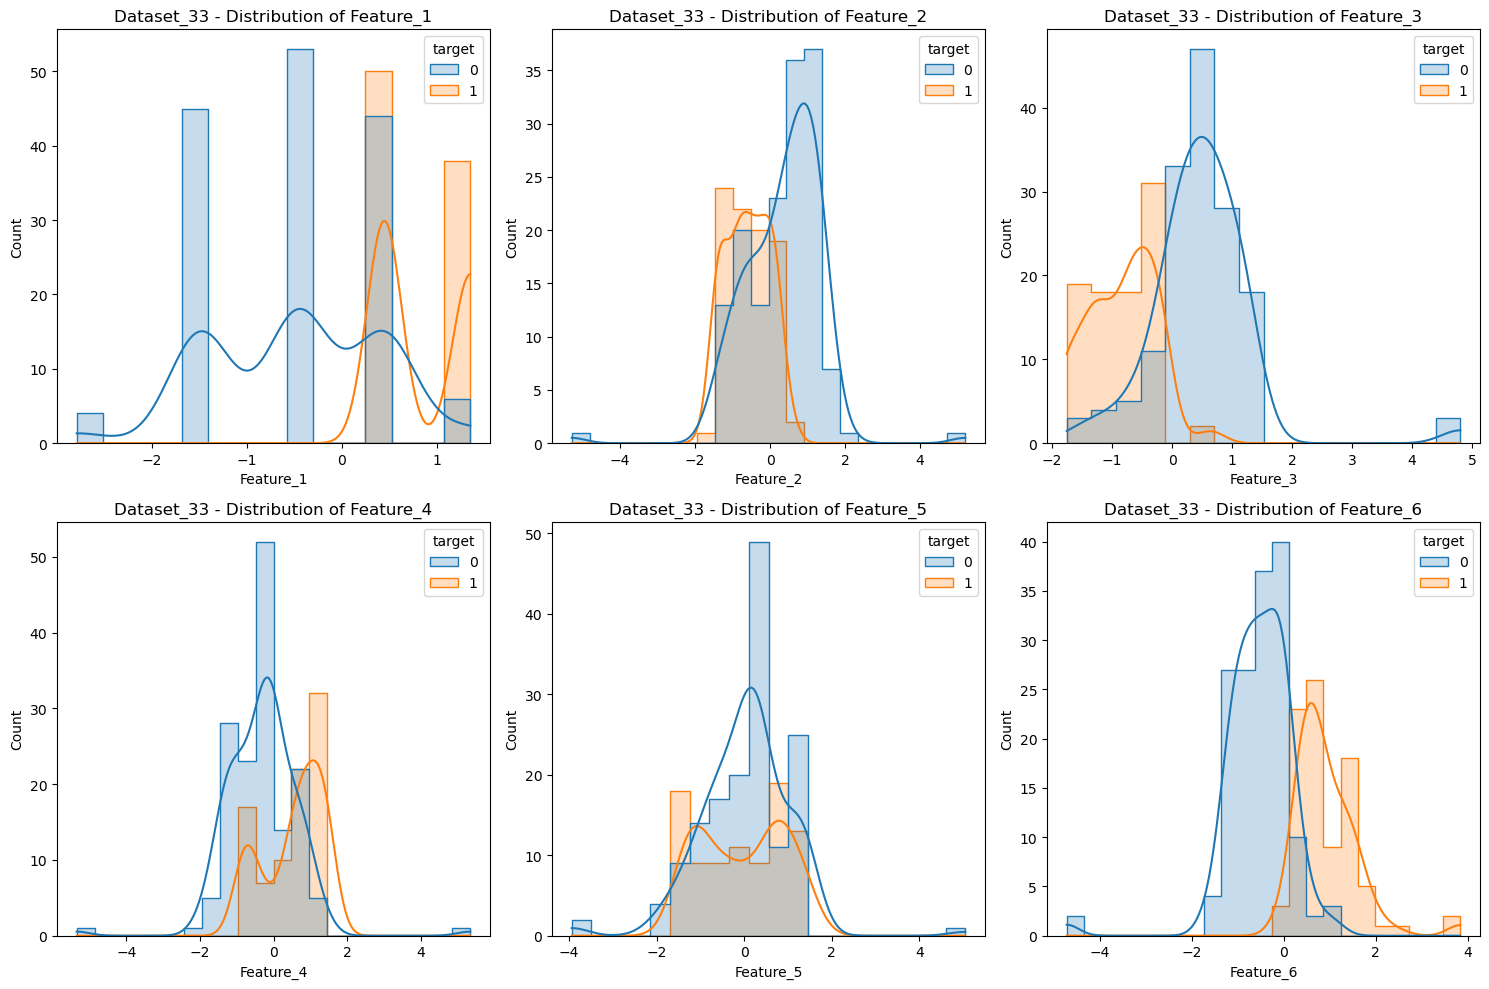

Dataset_33 - Validation Accuracy: 1.00
Dataset_33 - Validation F1 Score: 1.00

Dataset_33 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.35      0.95      0.51        39
           1       0.96      0.42      0.59       121

    accuracy                           0.55       160
   macro avg       0.65      0.69      0.55       160
weighted avg       0.81      0.55      0.57       160

Saved predictions for Dataset_33 to ../Group_DS34/Competition_data/Dataset_33/y_predict.csv.

Processing Dataset_3...
DEBUG INFO: Dataset_3 - y_train.keys(): Index(['target'], dtype='object')


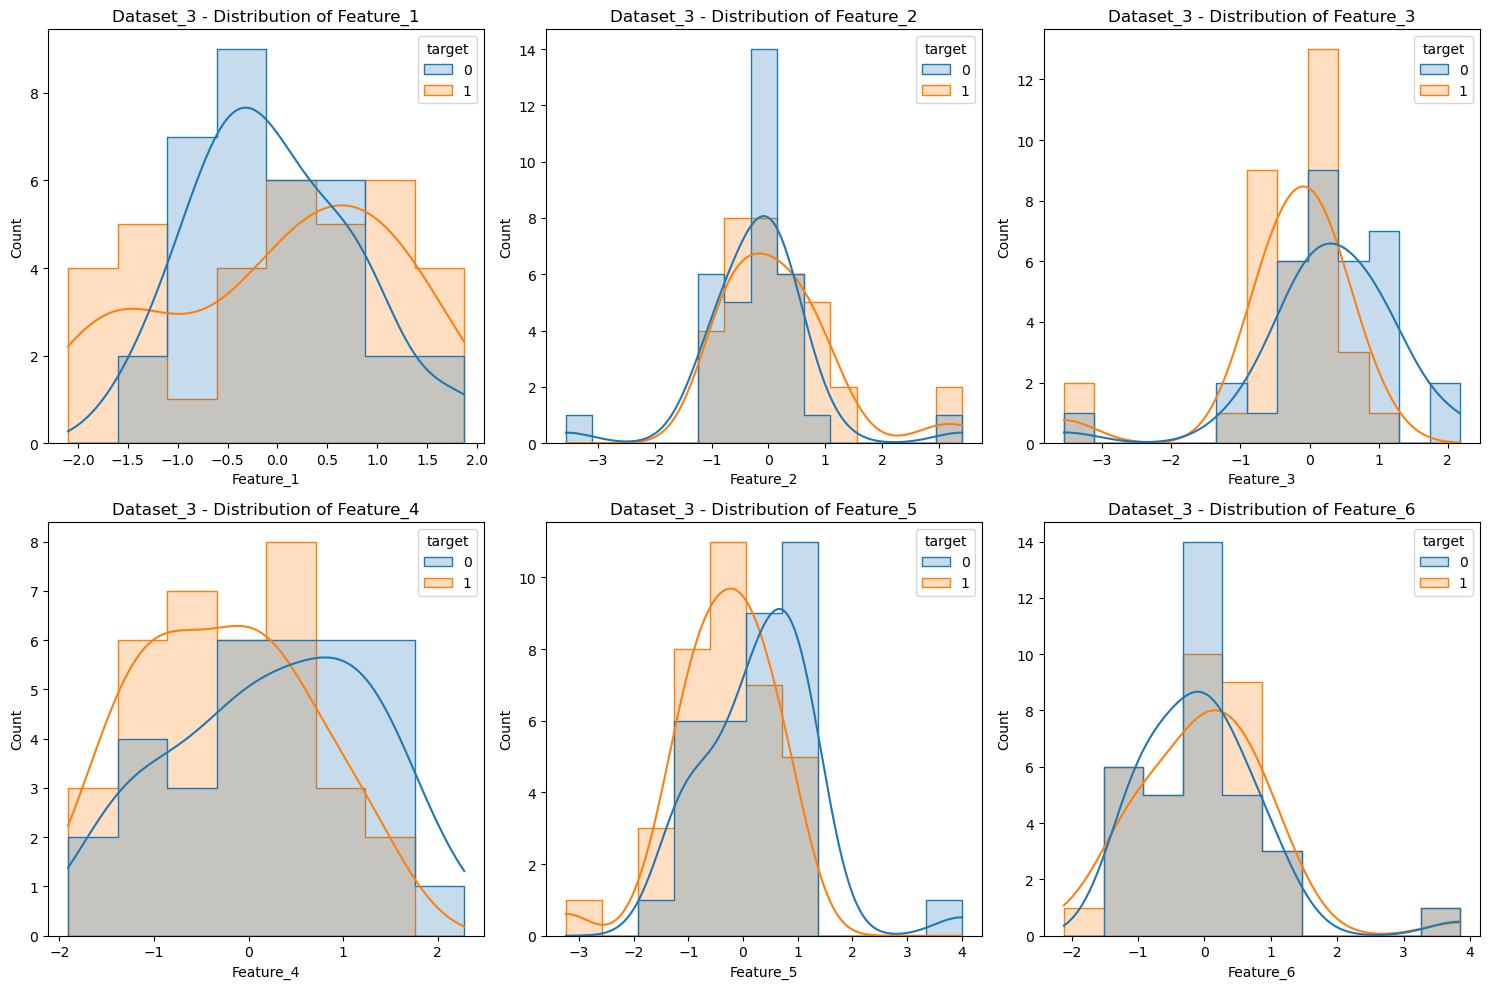

Dataset_3 - Validation Accuracy: 0.86
Dataset_3 - Validation F1 Score: 0.88

Dataset_3 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.19      0.56      0.29         9
           1       0.81      0.45      0.58        38

    accuracy                           0.47        47
   macro avg       0.50      0.50      0.43        47
weighted avg       0.69      0.47      0.52        47

Saved predictions for Dataset_3 to ../Group_DS34/Competition_data/Dataset_3/y_predict.csv.

Processing Dataset_34...
DEBUG INFO: Dataset_34 - y_train.keys(): Index(['target'], dtype='object')


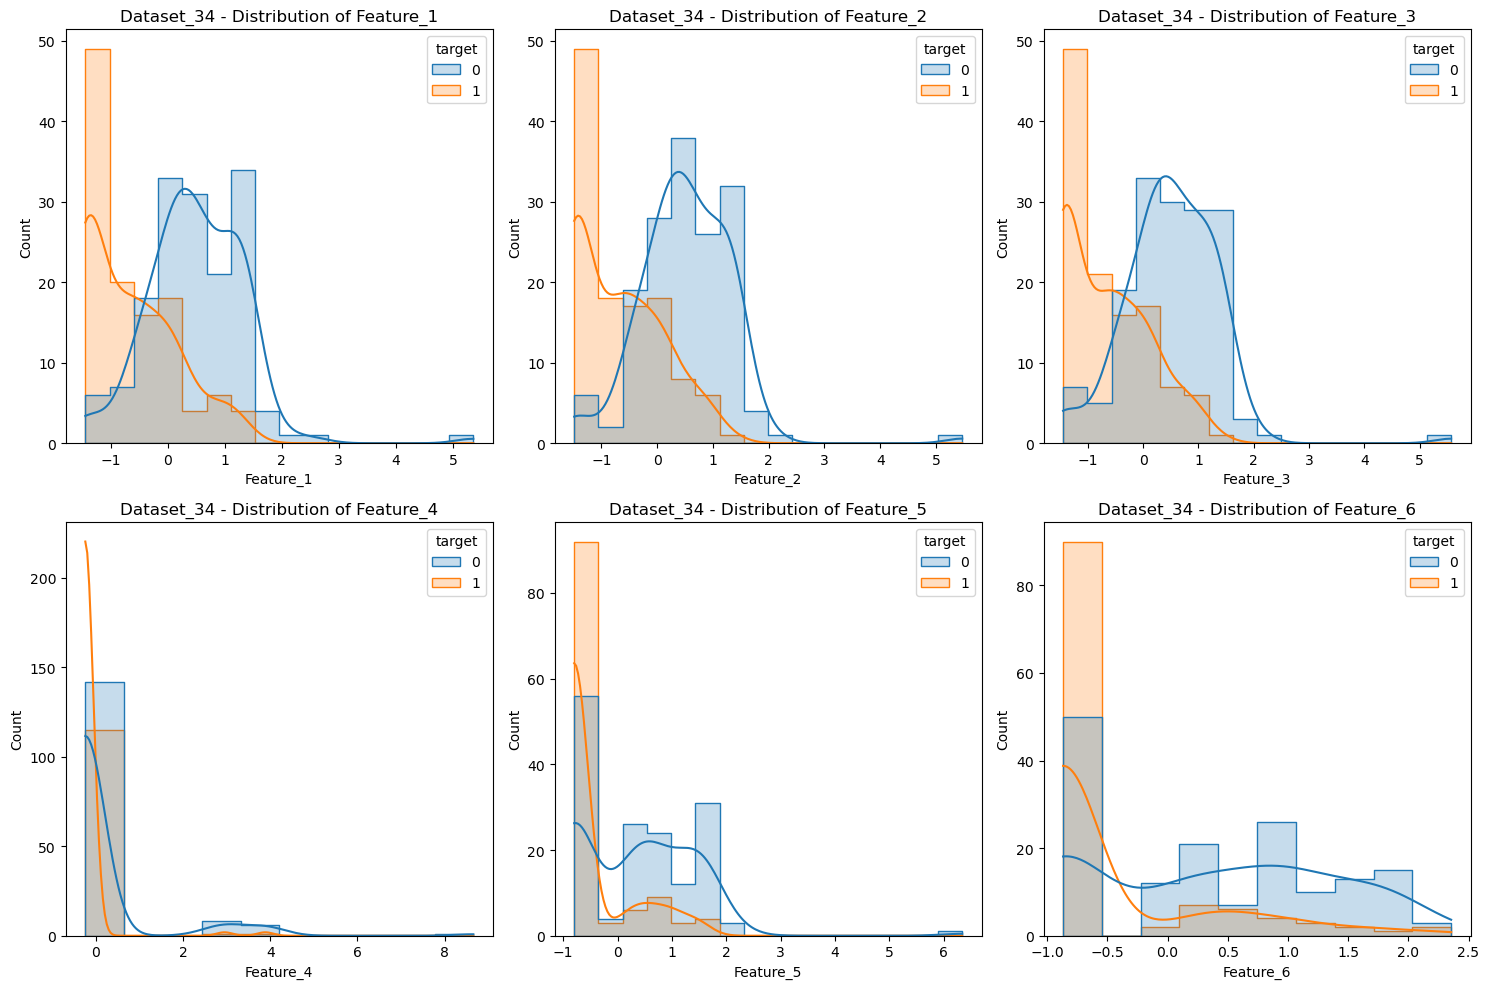

Dataset_34 - Validation Accuracy: 0.78
Dataset_34 - Validation F1 Score: 0.71

Dataset_34 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.13      0.89      0.23        18
           1       0.97      0.36      0.52       165

    accuracy                           0.41       183
   macro avg       0.55      0.62      0.38       183
weighted avg       0.88      0.41      0.49       183

Saved predictions for Dataset_34 to ../Group_DS34/Competition_data/Dataset_34/y_predict.csv.

Processing Dataset_45...
DEBUG INFO: Dataset_45 - y_train.keys(): Index(['target'], dtype='object')


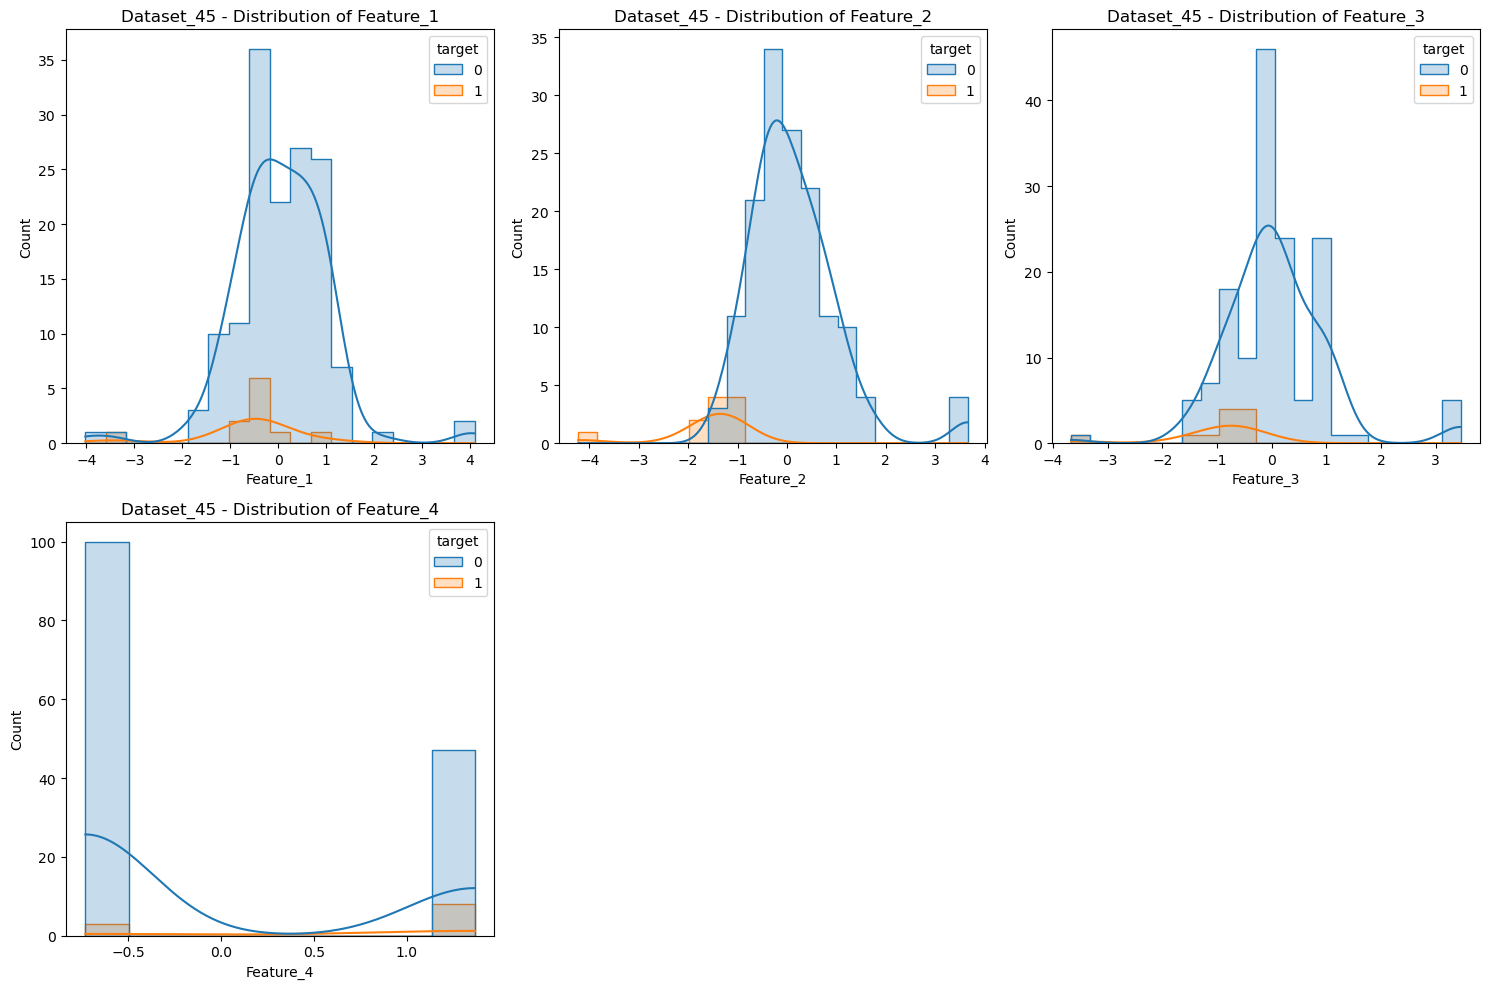

Dataset_45 - Validation Accuracy: 1.00
Dataset_45 - Validation F1 Score: 1.00

Dataset_45 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.29      0.69      0.41        39
           1       0.08      0.01      0.03        67

    accuracy                           0.26       106
   macro avg       0.18      0.35      0.22       106
weighted avg       0.16      0.26      0.17       106

Saved predictions for Dataset_45 to ../Group_DS34/Competition_data/Dataset_45/y_predict.csv.

Processing Dataset_42...
DEBUG INFO: Dataset_42 - y_train.keys(): Index(['target'], dtype='object')


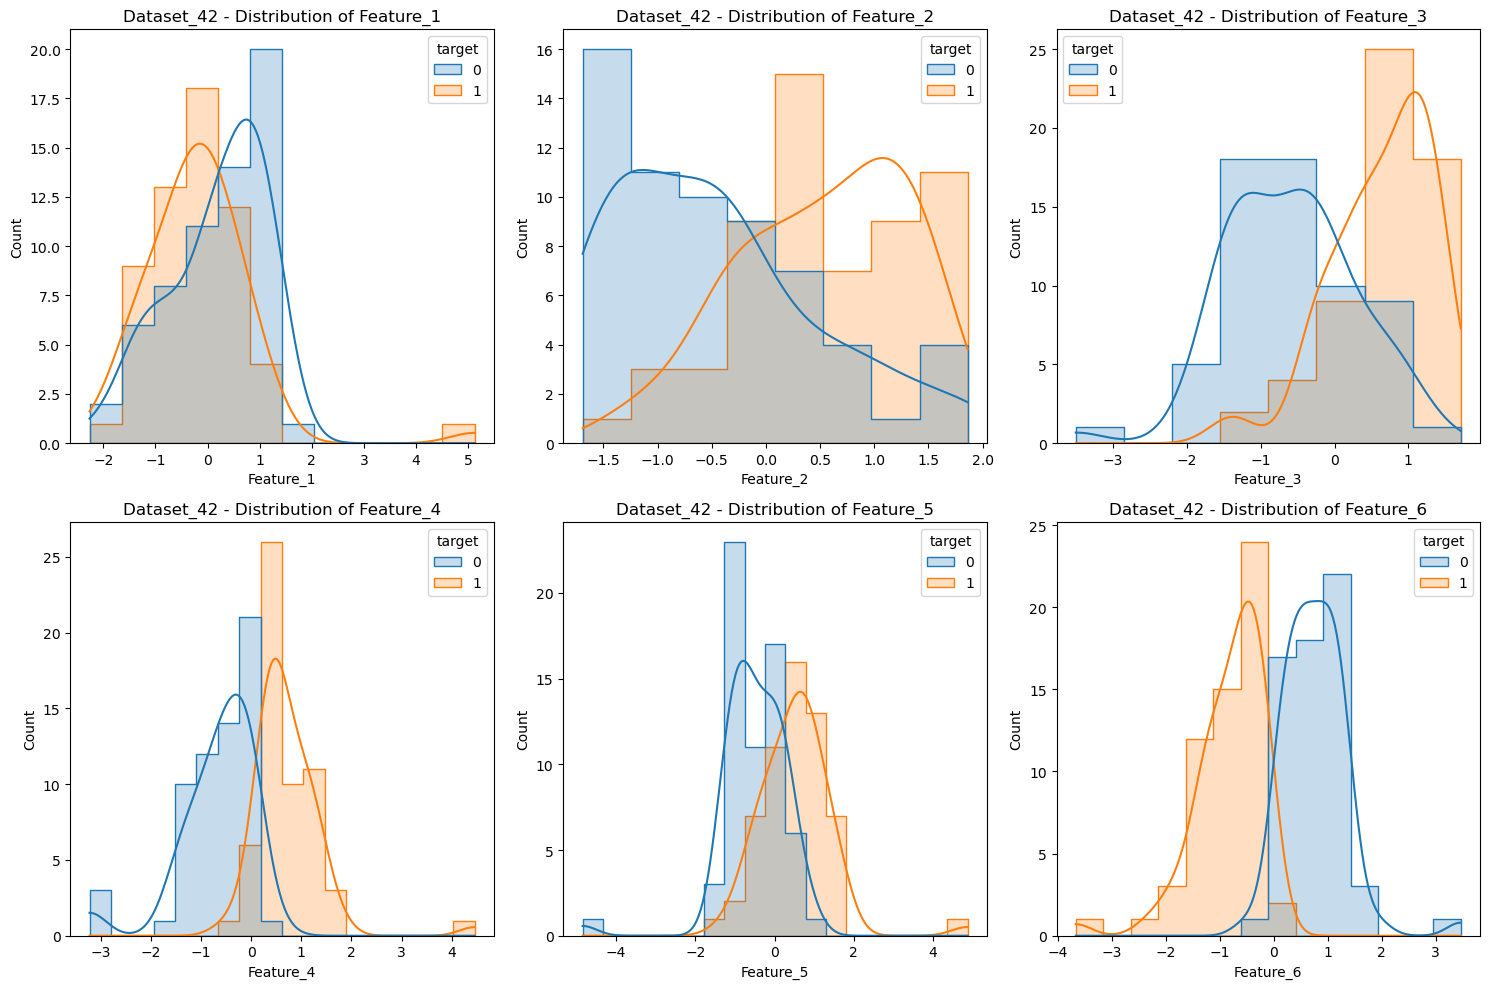

Dataset_42 - Validation Accuracy: 1.00
Dataset_42 - Validation F1 Score: 1.00

Dataset_42 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.40      0.89      0.55        18
           1       0.95      0.61      0.75        62

    accuracy                           0.68        80
   macro avg       0.68      0.75      0.65        80
weighted avg       0.83      0.68      0.70        80

Saved predictions for Dataset_42 to ../Group_DS34/Competition_data/Dataset_42/y_predict.csv.

Processing Dataset_27...
DEBUG INFO: Dataset_27 - y_train.keys(): Index(['target'], dtype='object')


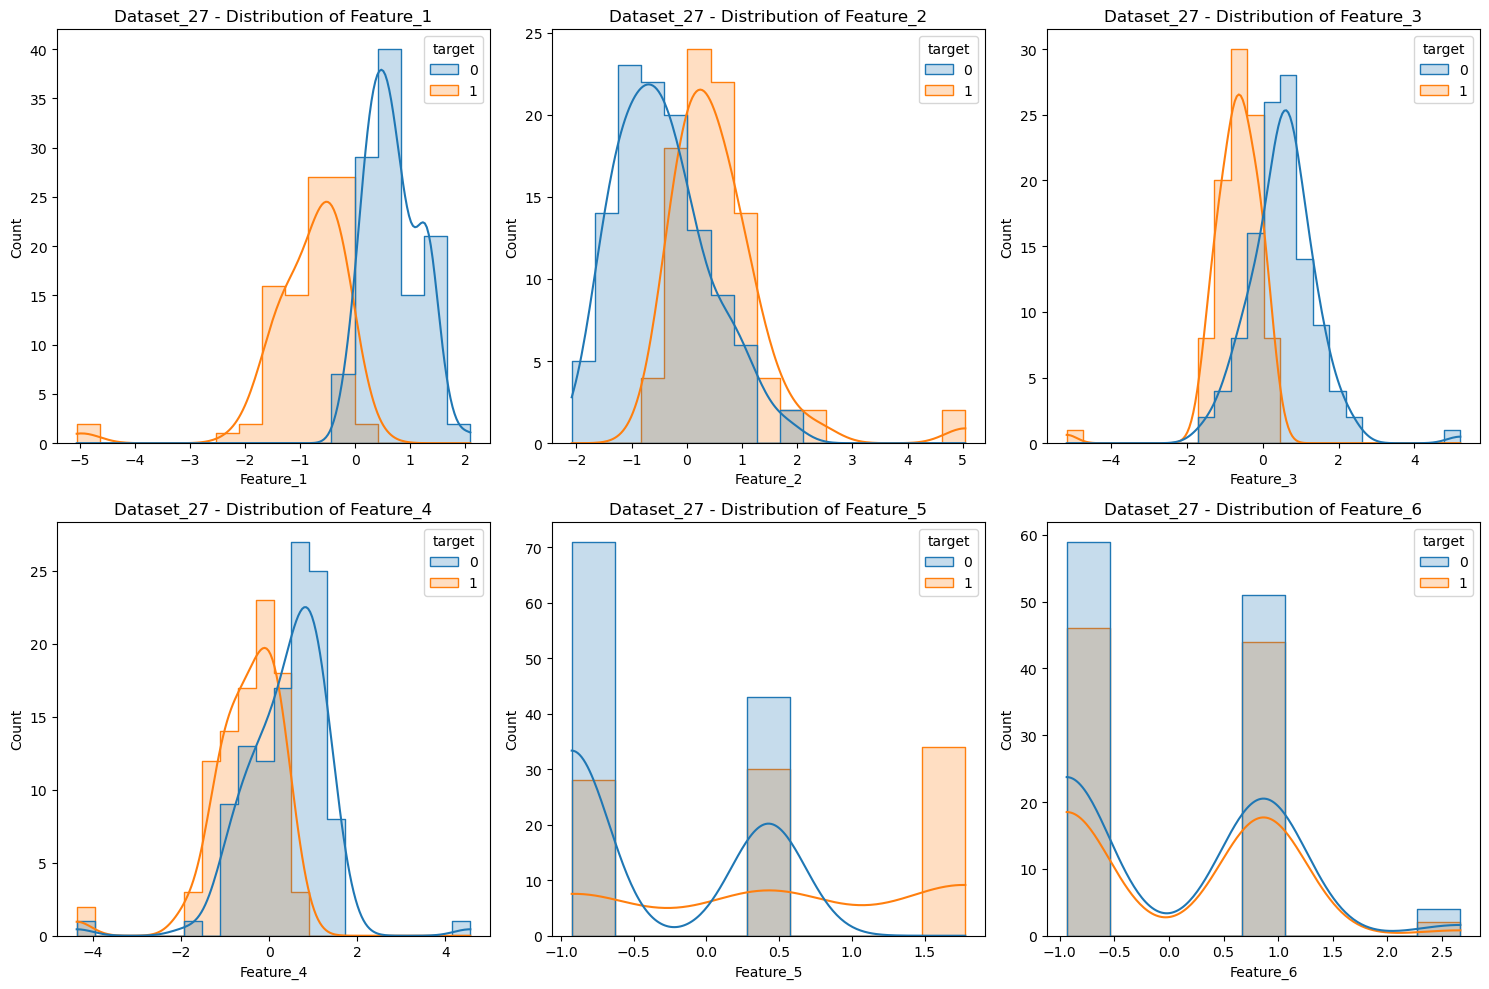

Dataset_27 - Validation Accuracy: 1.00
Dataset_27 - Validation F1 Score: 1.00

Dataset_27 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        46
           1       1.00      0.68      0.81        92

    accuracy                           0.79       138
   macro avg       0.81      0.84      0.79       138
weighted avg       0.87      0.79      0.80       138

Saved predictions for Dataset_27 to ../Group_DS34/Competition_data/Dataset_27/y_predict.csv.

Processing Dataset_18...
DEBUG INFO: Dataset_18 - y_train.keys(): Index(['target'], dtype='object')


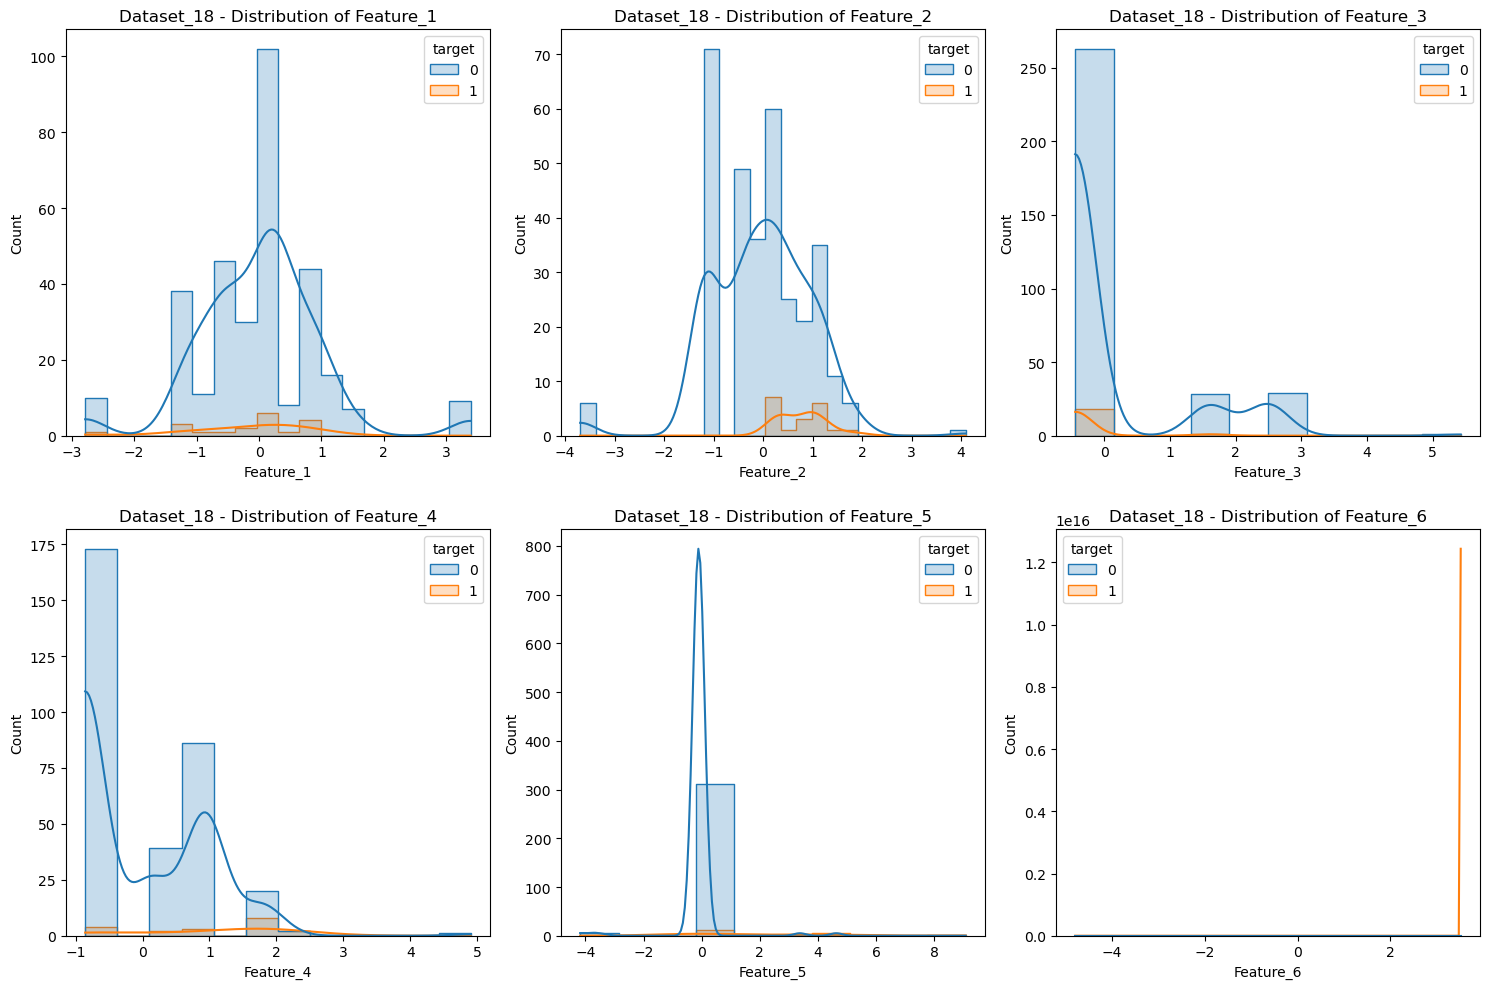

Dataset_18 - Validation Accuracy: 1.00
Dataset_18 - Validation F1 Score: 1.00

Dataset_18 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       109
           1       1.00      0.14      0.25       118

    accuracy                           0.56       227
   macro avg       0.76      0.57      0.47       227
weighted avg       0.77      0.56      0.46       227

Saved predictions for Dataset_18 to ../Group_DS34/Competition_data/Dataset_18/y_predict.csv.

Processing Dataset_20...
DEBUG INFO: Dataset_20 - y_train.keys(): Index(['target'], dtype='object')


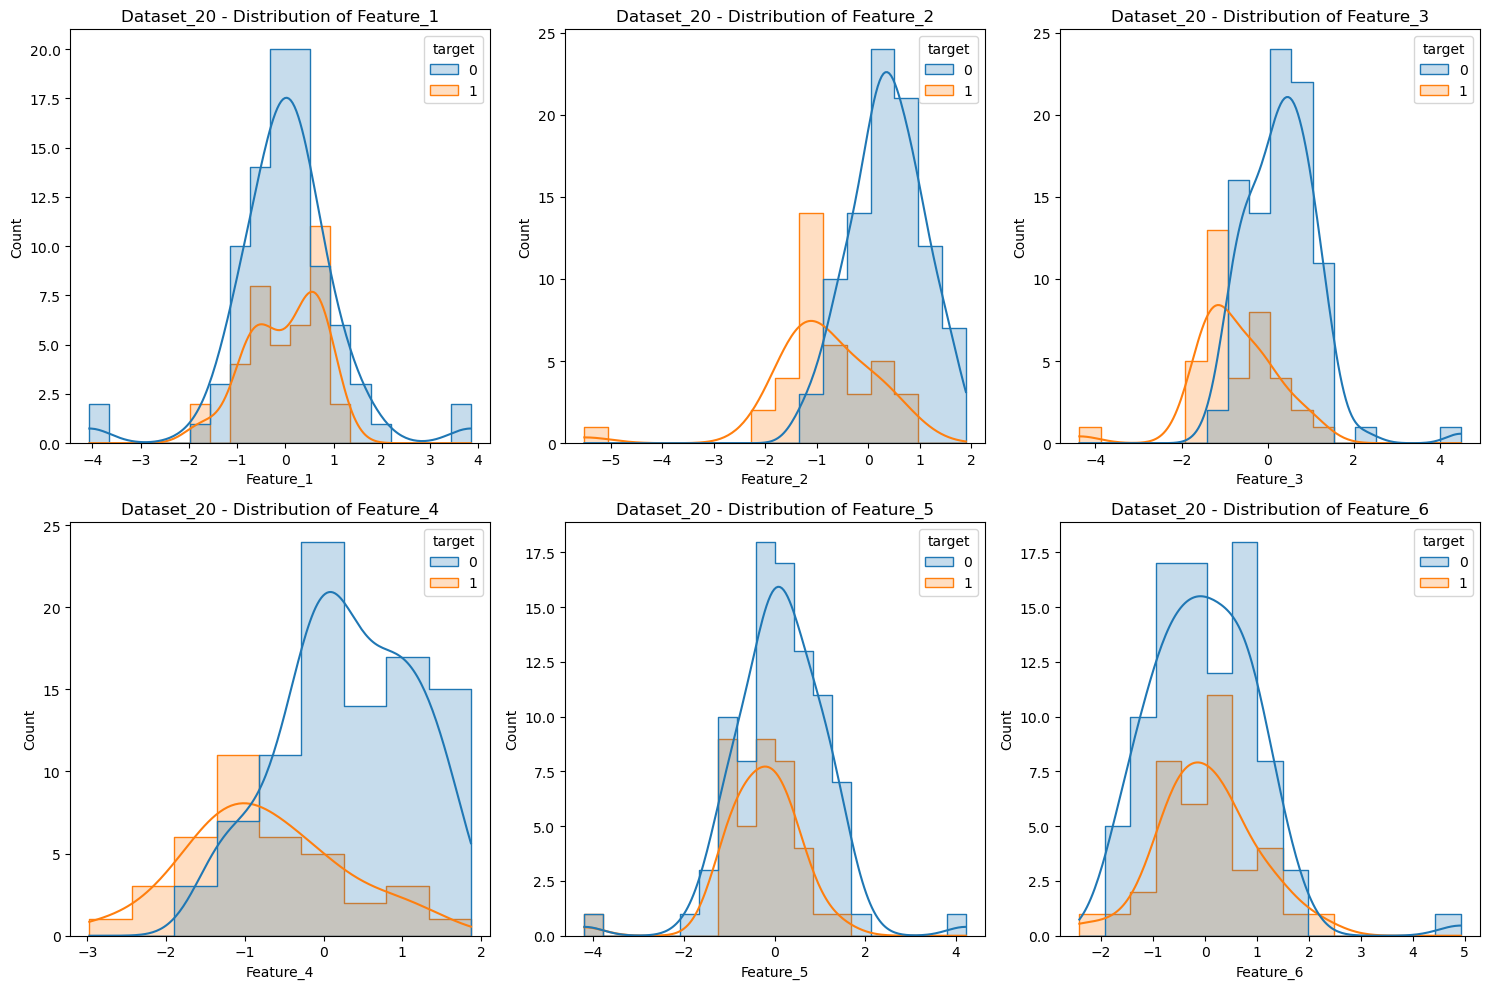

Dataset_20 - Validation Accuracy: 0.88
Dataset_20 - Validation F1 Score: 0.86

Dataset_20 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.23      0.57      0.32        28
           1       0.20      0.05      0.08        58

    accuracy                           0.22        86
   macro avg       0.21      0.31      0.20        86
weighted avg       0.21      0.22      0.16        86

Saved predictions for Dataset_20 to ../Group_DS34/Competition_data/Dataset_20/y_predict.csv.

Processing Dataset_16...
DEBUG INFO: Dataset_16 - y_train.keys(): Index(['target'], dtype='object')


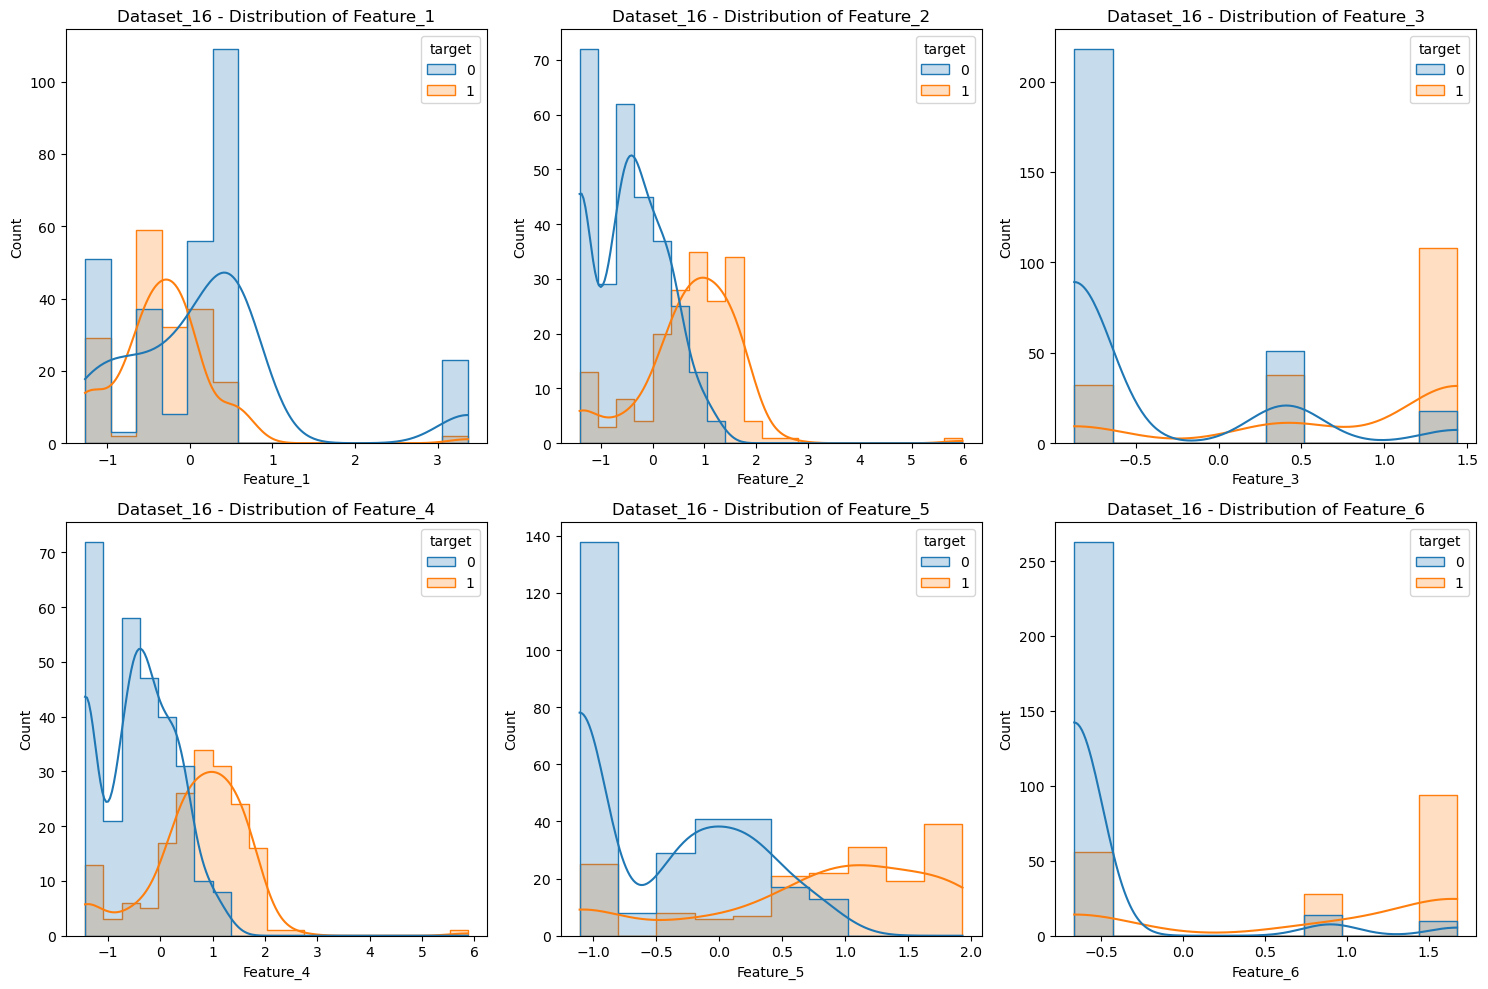

Dataset_16 - Validation Accuracy: 0.98
Dataset_16 - Validation F1 Score: 0.97

Dataset_16 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       168
           1       0.97      0.64      0.77       143

    accuracy                           0.83       311
   macro avg       0.87      0.81      0.82       311
weighted avg       0.86      0.83      0.82       311

Saved predictions for Dataset_16 to ../Group_DS34/Competition_data/Dataset_16/y_predict.csv.

Processing Dataset_29...
DEBUG INFO: Dataset_29 - y_train.keys(): Index(['target'], dtype='object')


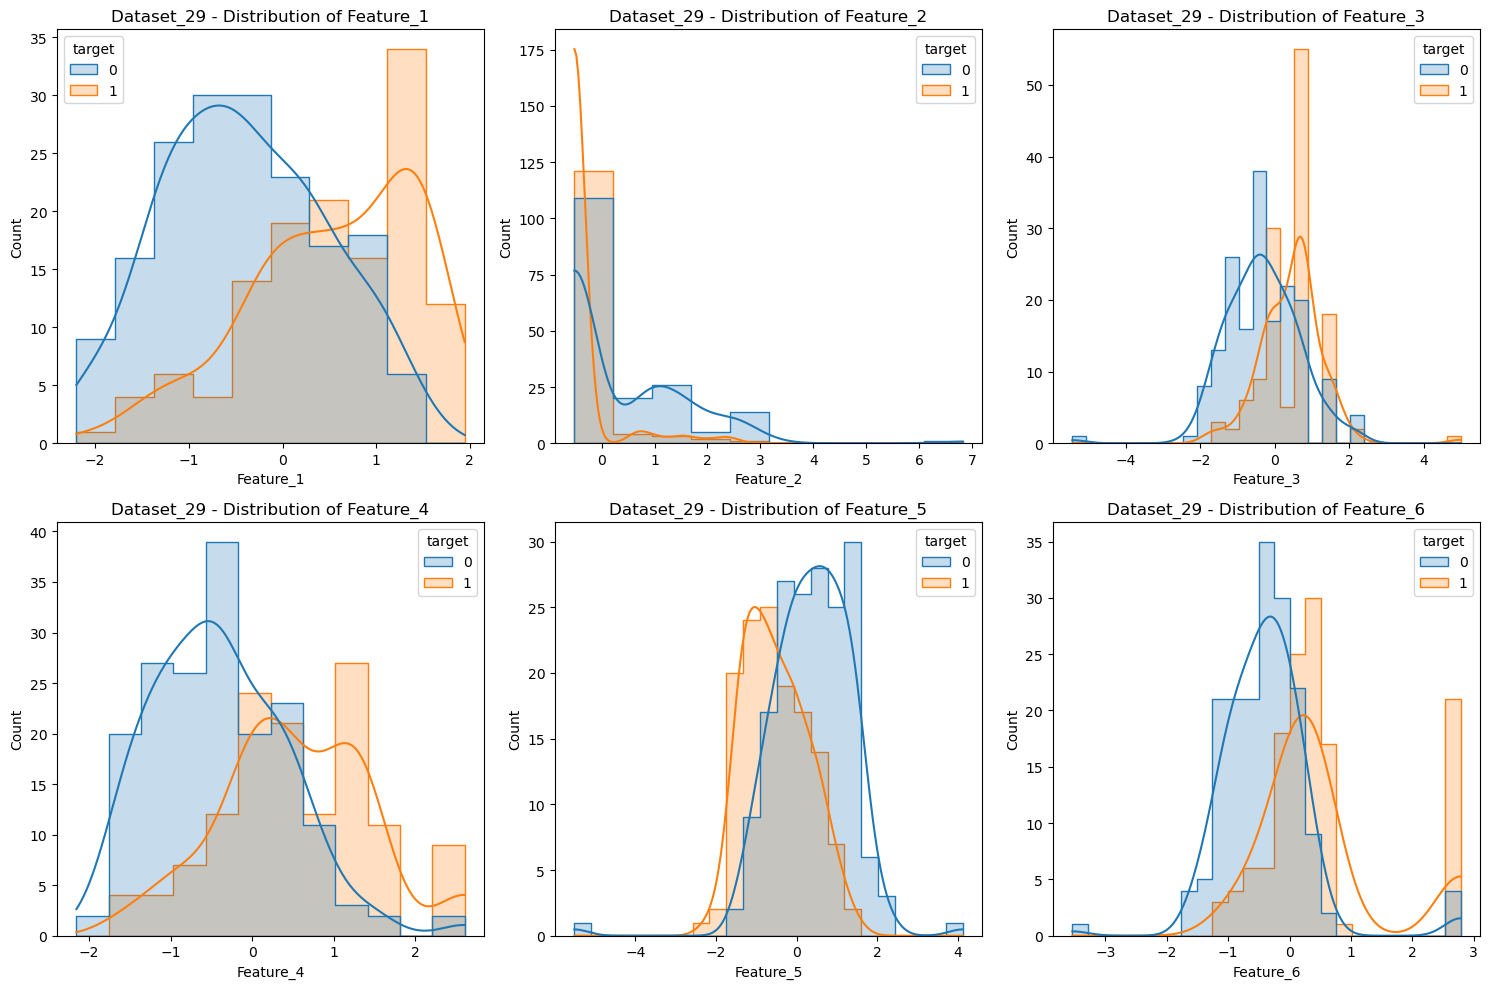

Dataset_29 - Validation Accuracy: 0.85
Dataset_29 - Validation F1 Score: 0.79

Dataset_29 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        11
           1       1.00      0.40      0.57       194

    accuracy                           0.43       205
   macro avg       0.54      0.70      0.37       205
weighted avg       0.95      0.43      0.55       205

Saved predictions for Dataset_29 to ../Group_DS34/Competition_data/Dataset_29/y_predict.csv.

Processing Dataset_11...
DEBUG INFO: Dataset_11 - y_train.keys(): Index(['target'], dtype='object')


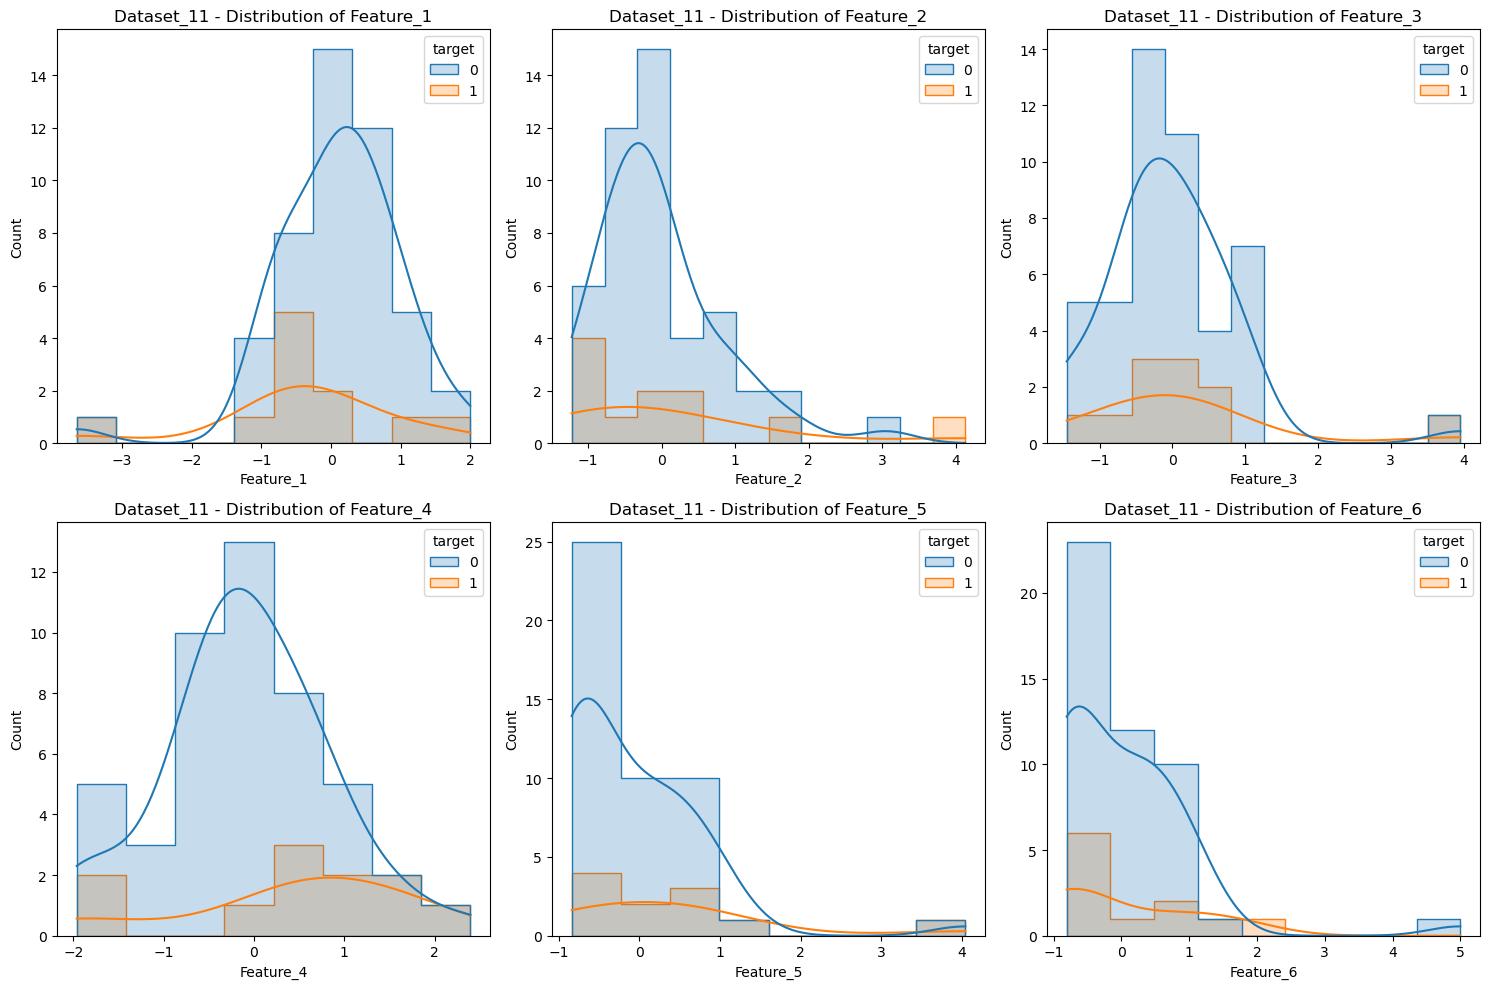

Dataset_11 - Validation Accuracy: 0.58
Dataset_11 - Validation F1 Score: 0.00

Dataset_11 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.50      0.17      0.25         6

    accuracy                           0.85        39
   macro avg       0.68      0.57      0.58        39
weighted avg       0.81      0.85      0.81        39

Saved predictions for Dataset_11 to ../Group_DS34/Competition_data/Dataset_11/y_predict.csv.

Processing Dataset_43...
DEBUG INFO: Dataset_43 - y_train.keys(): Index(['target'], dtype='object')


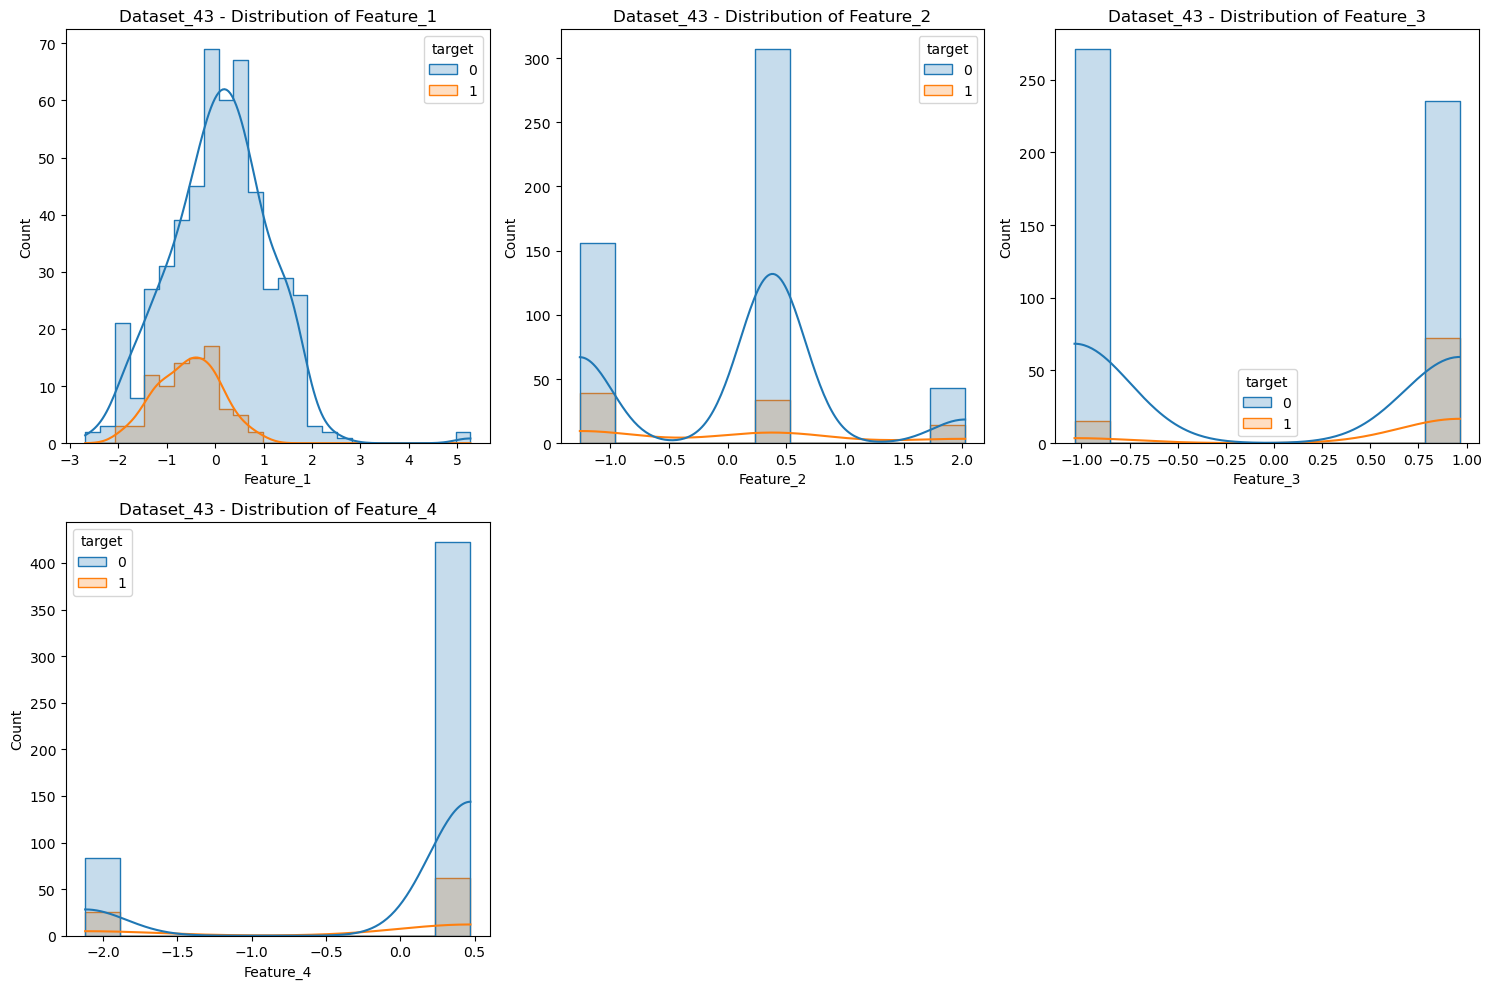

Dataset_43 - Validation Accuracy: 0.81
Dataset_43 - Validation F1 Score: 0.21

Dataset_43 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.19      0.33       396

    accuracy                           0.19       396
   macro avg       0.50      0.60      0.16       396
weighted avg       1.00      0.19      0.33       396

Saved predictions for Dataset_43 to ../Group_DS34/Competition_data/Dataset_43/y_predict.csv.

Processing Dataset_44...
DEBUG INFO: Dataset_44 - y_train.keys(): Index(['target'], dtype='object')


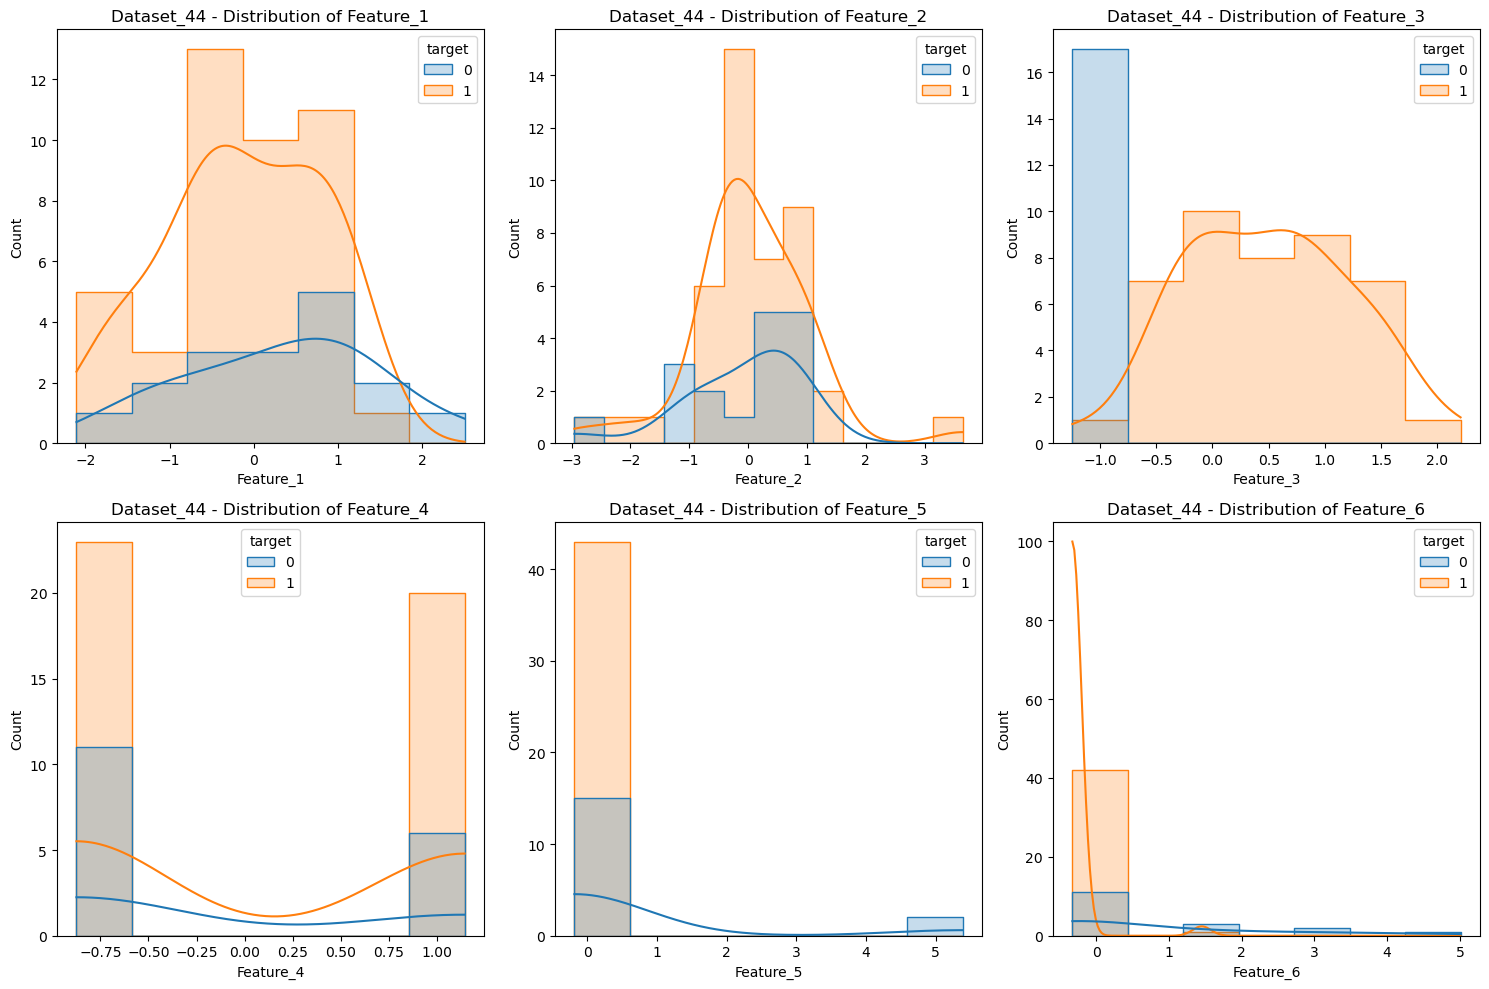

Dataset_44 - Validation Accuracy: 1.00
Dataset_44 - Validation F1 Score: 1.00

Dataset_44 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.87      0.76      0.81        34

    accuracy                           0.70        40
   macro avg       0.53      0.55      0.53        40
weighted avg       0.77      0.70      0.73        40

Saved predictions for Dataset_44 to ../Group_DS34/Competition_data/Dataset_44/y_predict.csv.

Processing Dataset_10...
DEBUG INFO: Dataset_10 - y_train.keys(): Index(['target'], dtype='object')


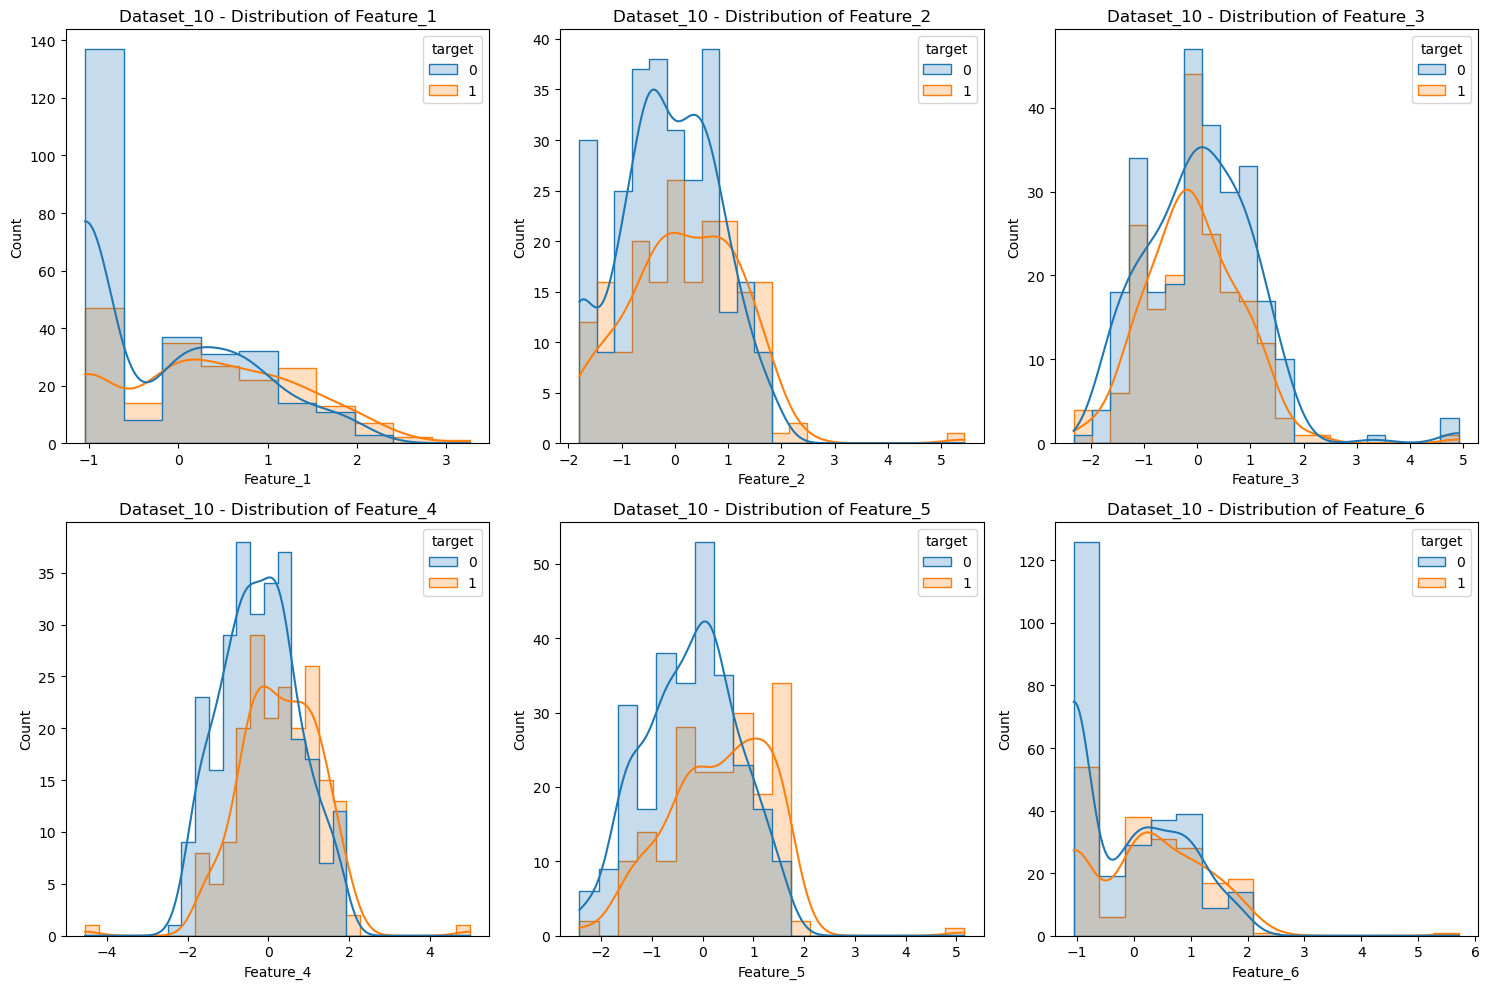

Dataset_10 - Validation Accuracy: 0.76
Dataset_10 - Validation F1 Score: 0.69

Dataset_10 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.27      0.52      0.36        86
           1       0.72      0.47      0.57       226

    accuracy                           0.49       312
   macro avg       0.50      0.50      0.47       312
weighted avg       0.60      0.49      0.51       312

Saved predictions for Dataset_10 to ../Group_DS34/Competition_data/Dataset_10/y_predict.csv.

Processing Dataset_17...
DEBUG INFO: Dataset_17 - y_train.keys(): Index(['target'], dtype='object')


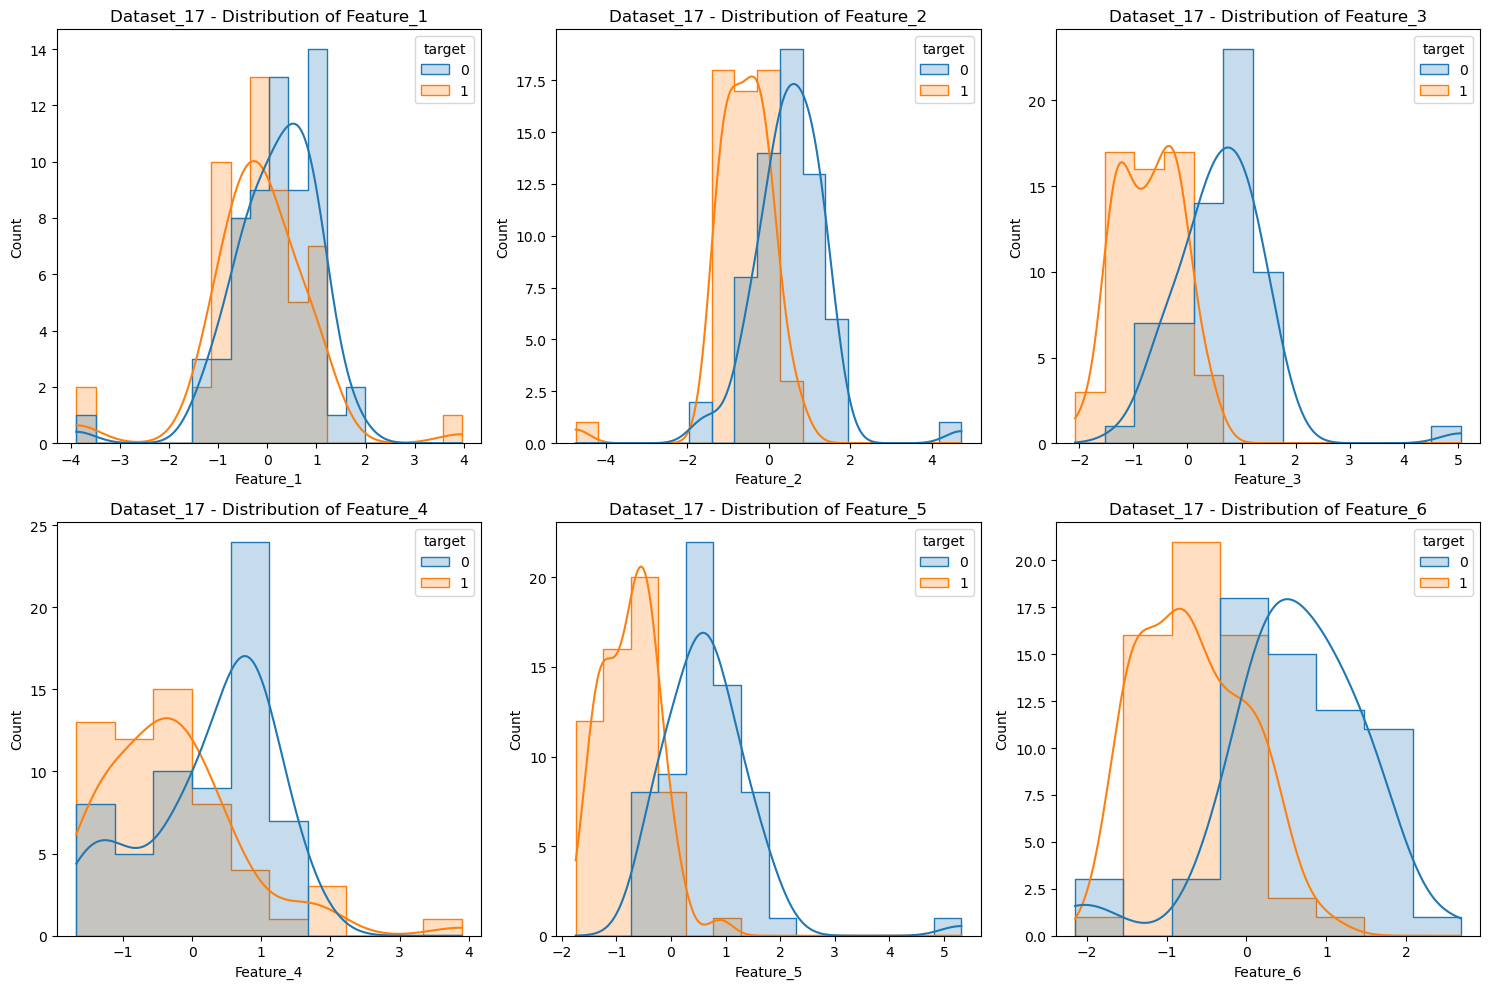

Dataset_17 - Validation Accuracy: 0.75
Dataset_17 - Validation F1 Score: 0.77

Dataset_17 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.97      0.79      0.87        43

    accuracy                           0.88        81
   macro avg       0.89      0.88      0.88        81
weighted avg       0.89      0.88      0.88        81

Saved predictions for Dataset_17 to ../Group_DS34/Competition_data/Dataset_17/y_predict.csv.

Processing Dataset_28...
DEBUG INFO: Dataset_28 - y_train.keys(): Index(['target'], dtype='object')


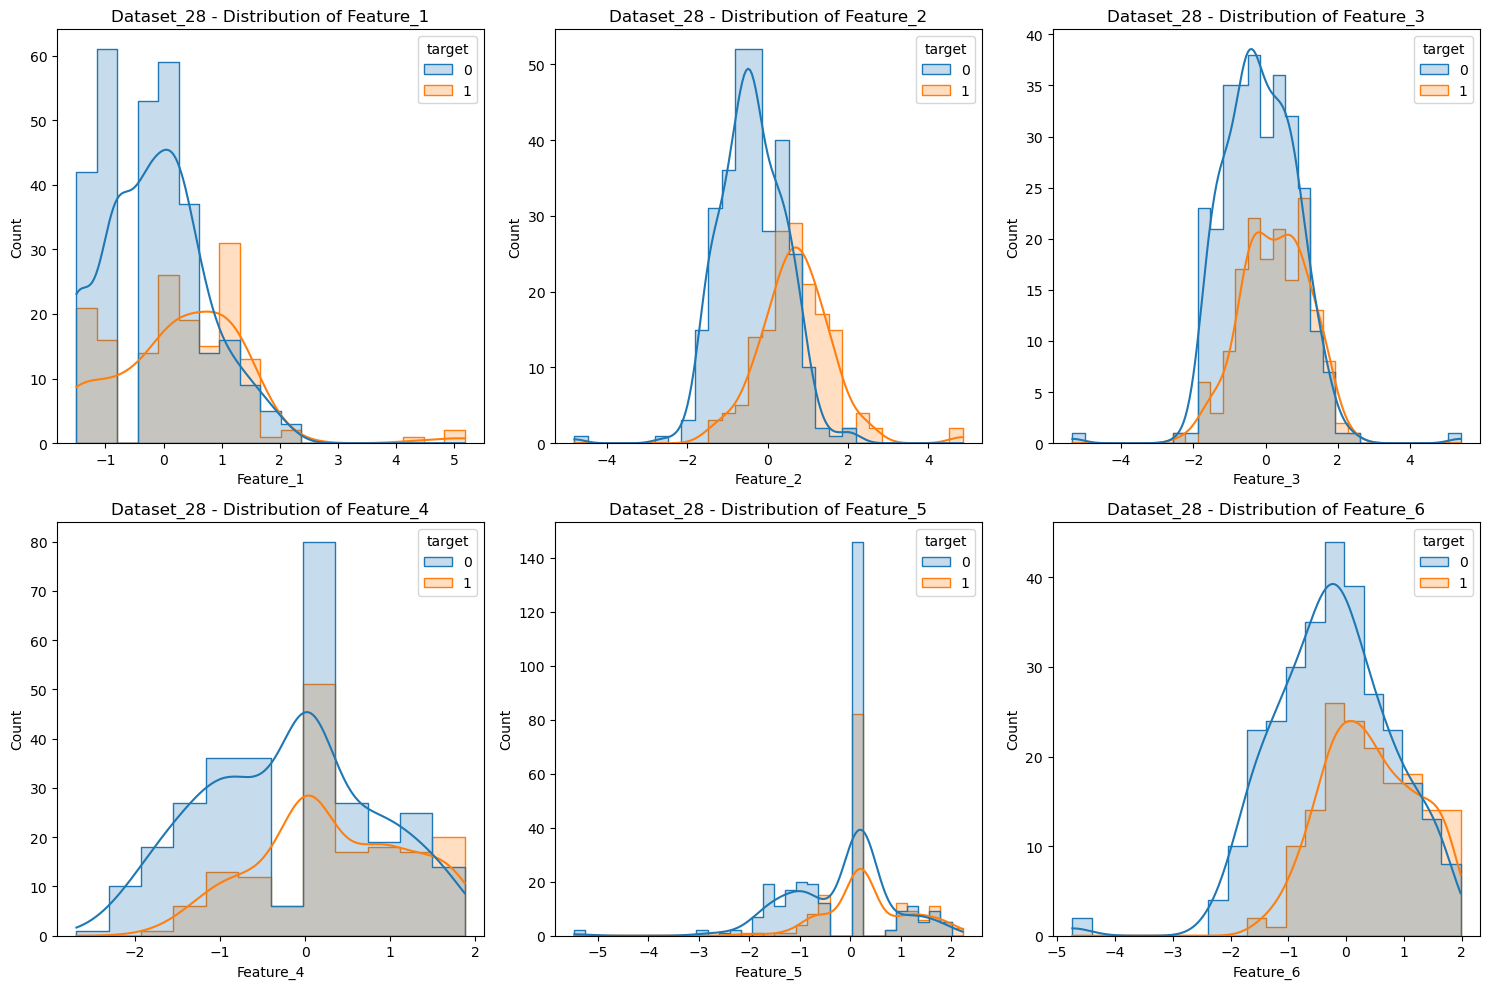

Dataset_28 - Validation Accuracy: 0.74
Dataset_28 - Validation F1 Score: 0.48

Dataset_28 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.23      0.98      0.37        50
           1       0.99      0.36      0.52       258

    accuracy                           0.46       308
   macro avg       0.61      0.67      0.45       308
weighted avg       0.87      0.46      0.50       308

Saved predictions for Dataset_28 to ../Group_DS34/Competition_data/Dataset_28/y_predict.csv.

Processing Dataset_21...
DEBUG INFO: Dataset_21 - y_train.keys(): Index(['target'], dtype='object')


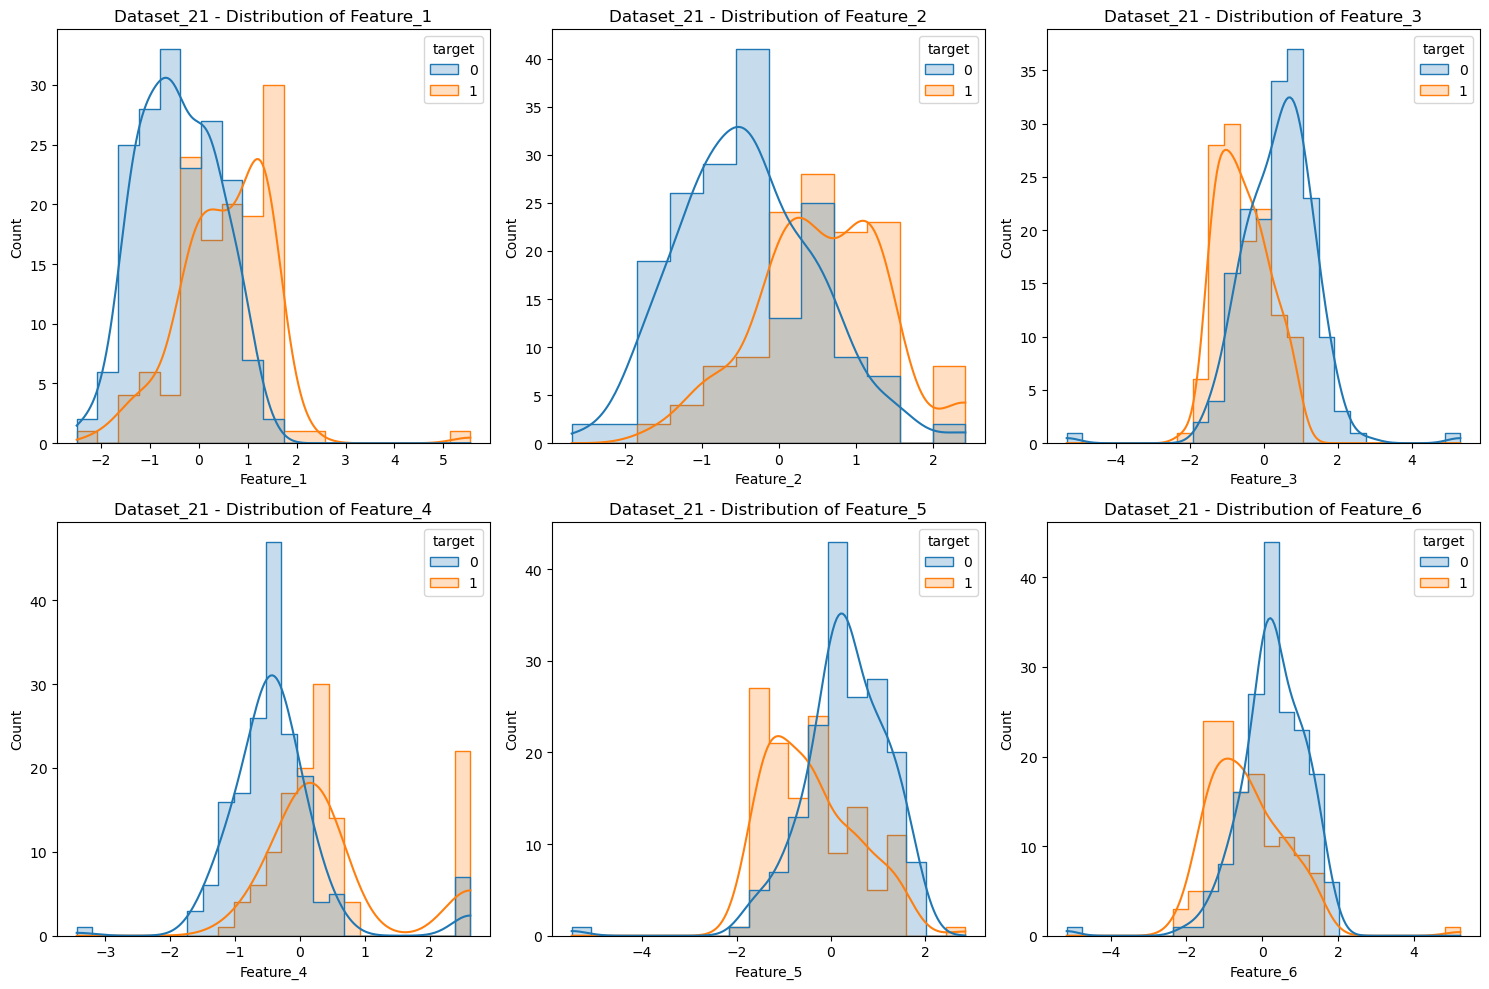

Dataset_21 - Validation Accuracy: 0.93
Dataset_21 - Validation F1 Score: 0.90

Dataset_21 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        94
           1       0.93      0.75      0.83       109

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.85      0.84      0.84       203

Saved predictions for Dataset_21 to ../Group_DS34/Competition_data/Dataset_21/y_predict.csv.

Processing Dataset_26...
DEBUG INFO: Dataset_26 - y_train.keys(): Index(['target'], dtype='object')


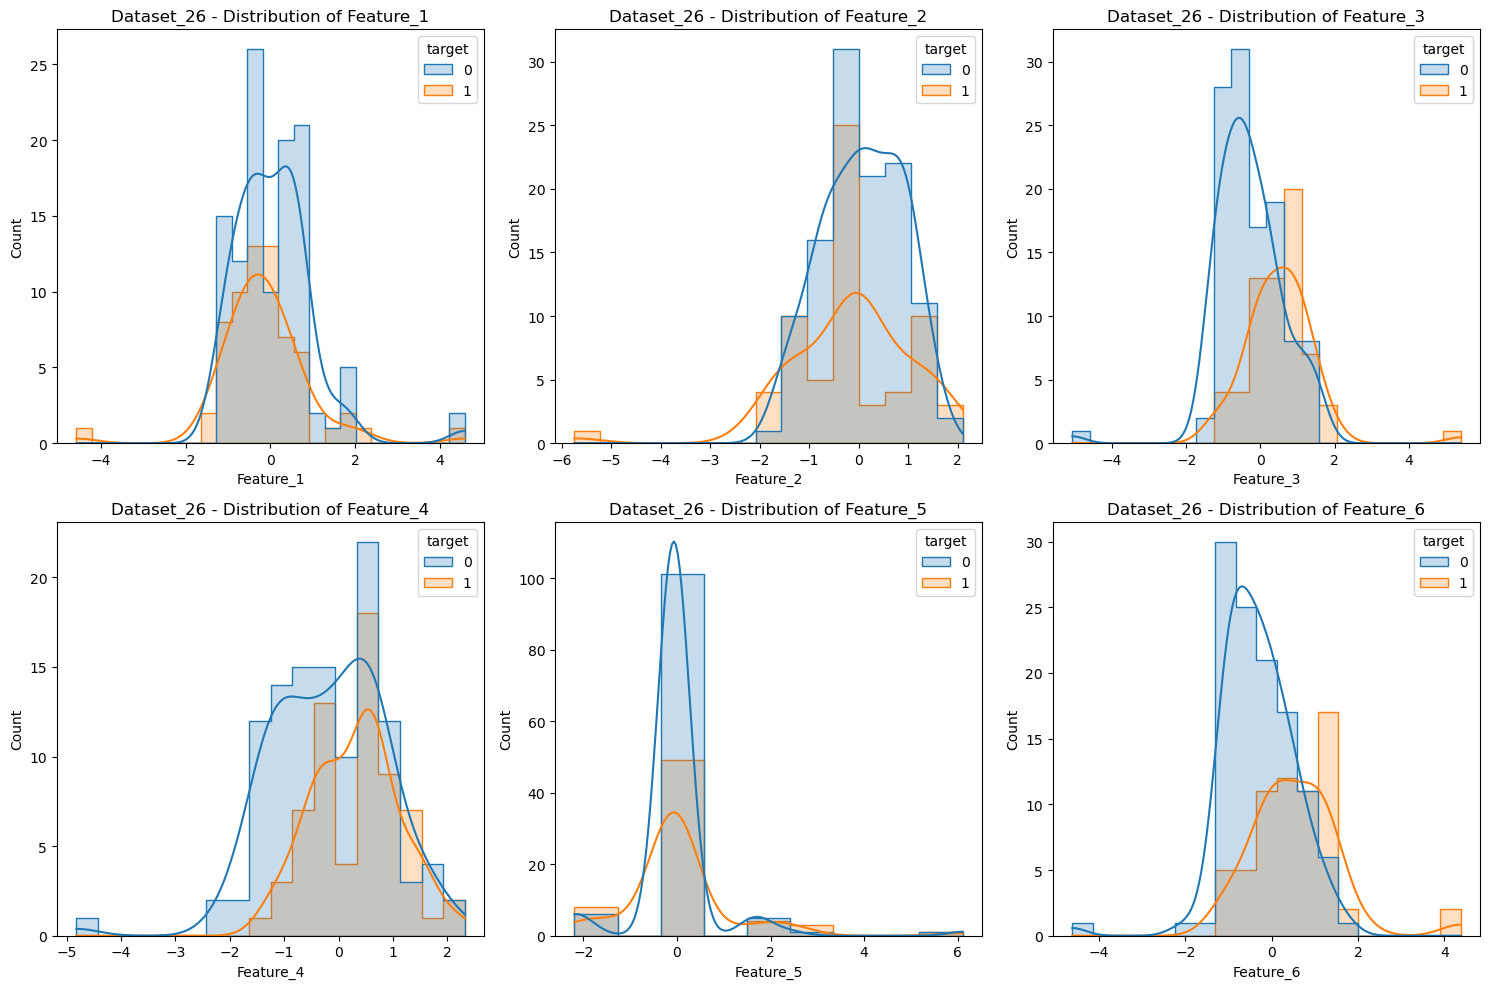

Dataset_26 - Validation Accuracy: 0.78
Dataset_26 - Validation F1 Score: 0.64

Dataset_26 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        51
           1       0.82      0.59      0.69        69

    accuracy                           0.69       120
   macro avg       0.71      0.71      0.69       120
weighted avg       0.73      0.69      0.69       120

Saved predictions for Dataset_26 to ../Group_DS34/Competition_data/Dataset_26/y_predict.csv.

Processing Dataset_19...
DEBUG INFO: Dataset_19 - y_train.keys(): Index(['target'], dtype='object')


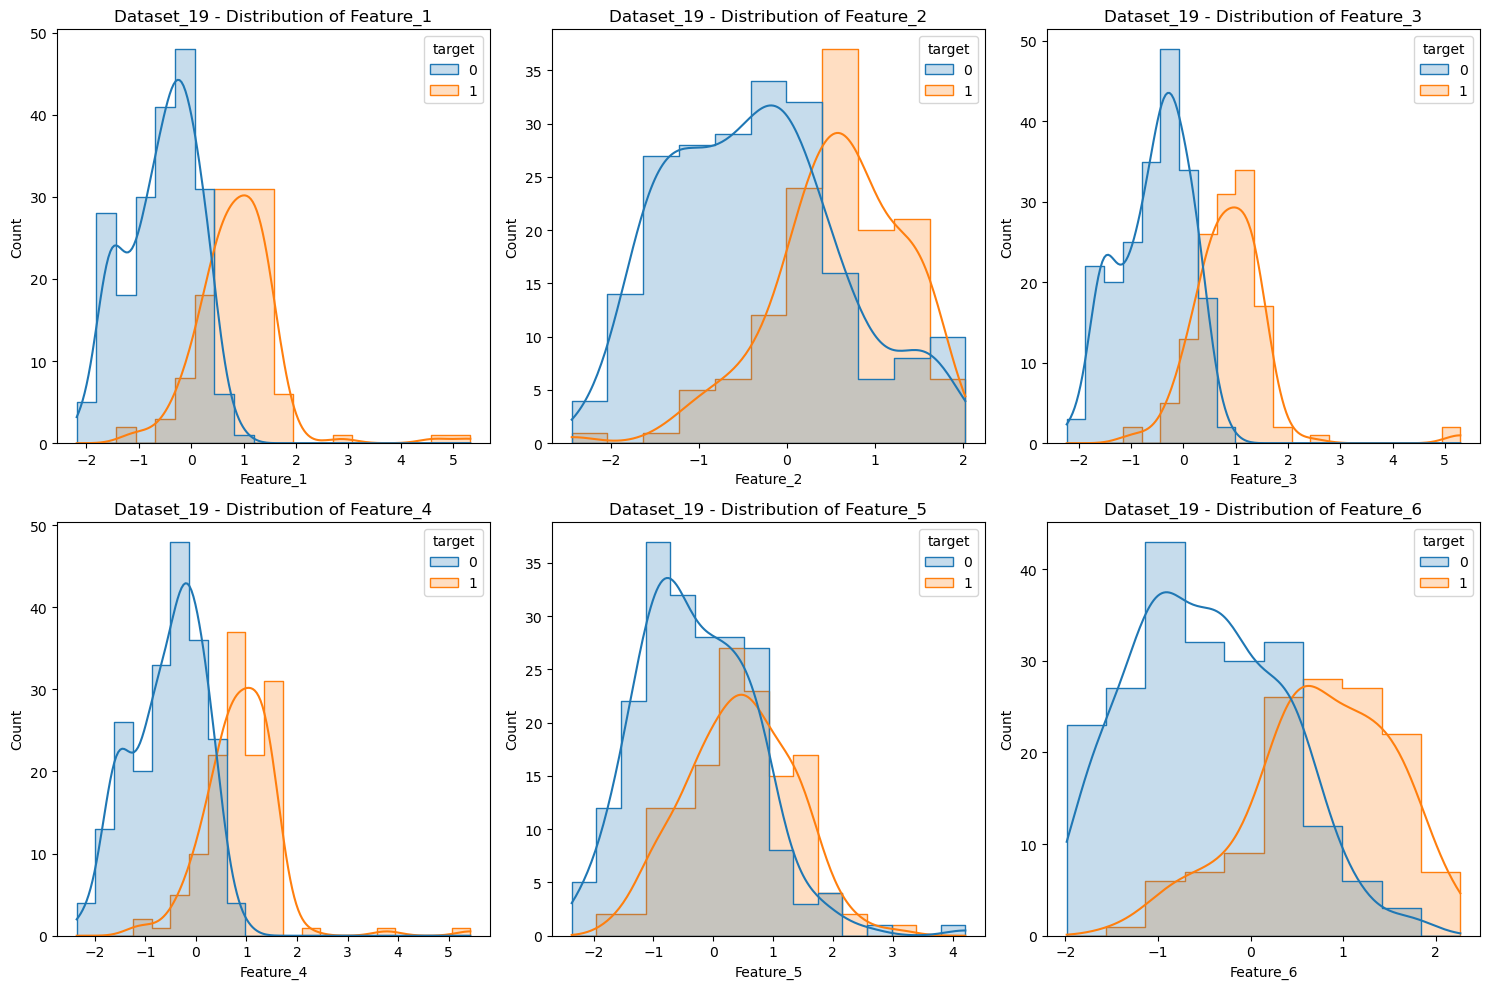

Dataset_19 - Validation Accuracy: 0.97
Dataset_19 - Validation F1 Score: 0.96

Dataset_19 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       128
           1       0.91      0.67      0.77       100

    accuracy                           0.82       228
   macro avg       0.85      0.81      0.81       228
weighted avg       0.84      0.82      0.82       228

Saved predictions for Dataset_19 to ../Group_DS34/Competition_data/Dataset_19/y_predict.csv.

Processing Dataset_8...
DEBUG INFO: Dataset_8 - y_train.keys(): Index(['target'], dtype='object')


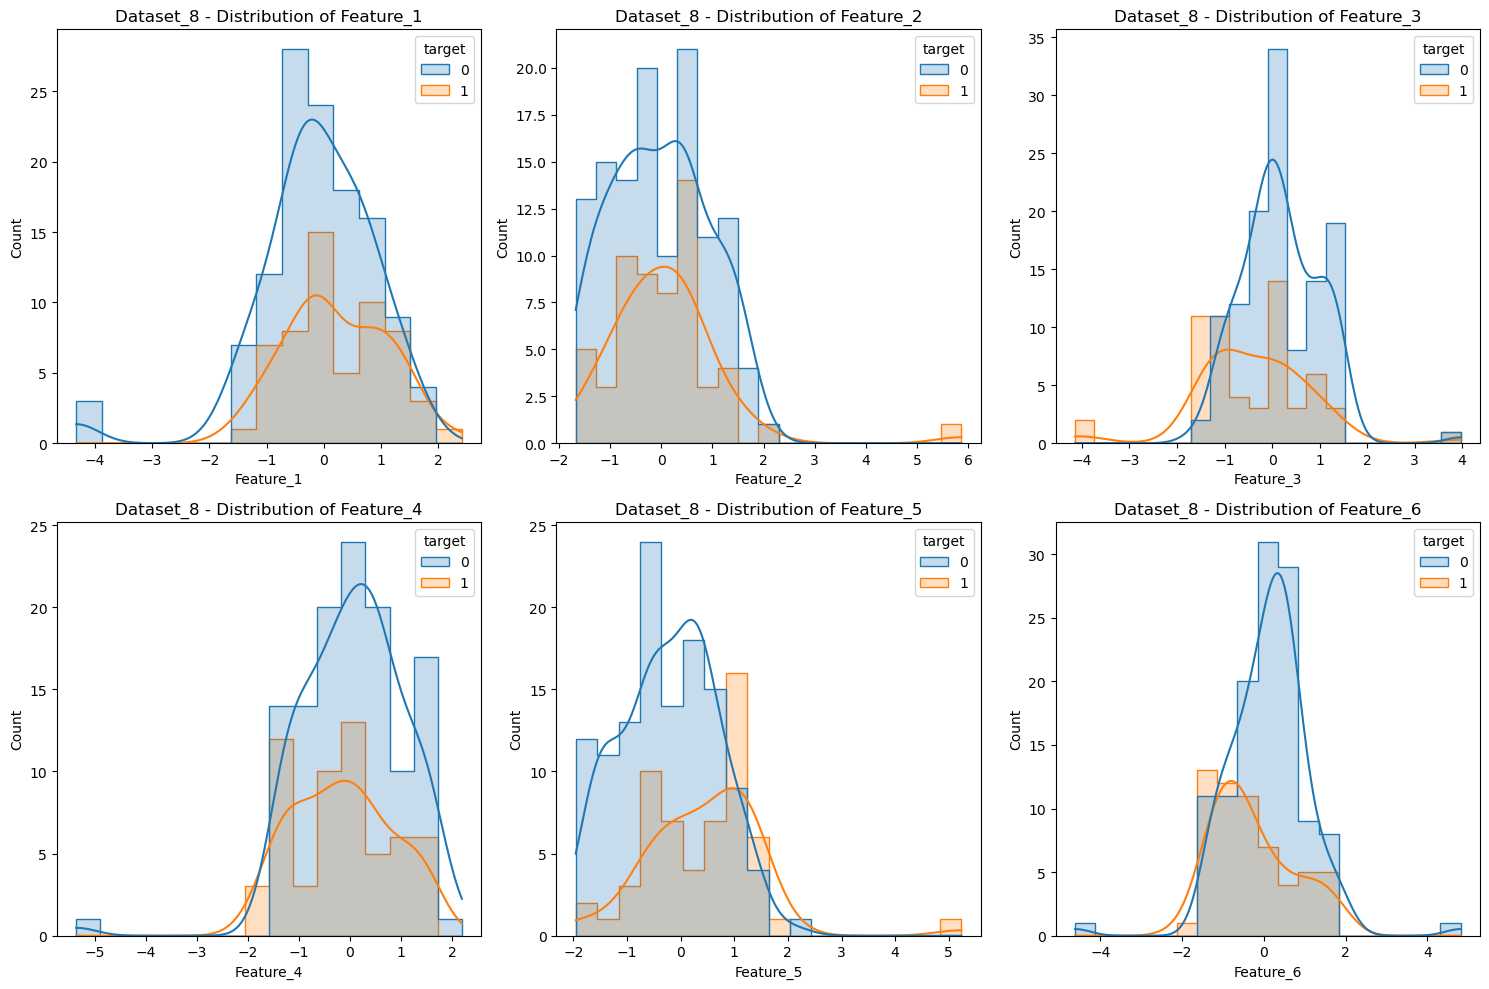

Dataset_8 - Validation Accuracy: 0.83
Dataset_8 - Validation F1 Score: 0.75

Dataset_8 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.29      0.70      0.41        33
           1       0.75      0.34      0.47        87

    accuracy                           0.44       120
   macro avg       0.52      0.52      0.44       120
weighted avg       0.62      0.44      0.45       120

Saved predictions for Dataset_8 to ../Group_DS34/Competition_data/Dataset_8/y_predict.csv.

Processing Dataset_38...
DEBUG INFO: Dataset_38 - y_train.keys(): Index(['target'], dtype='object')


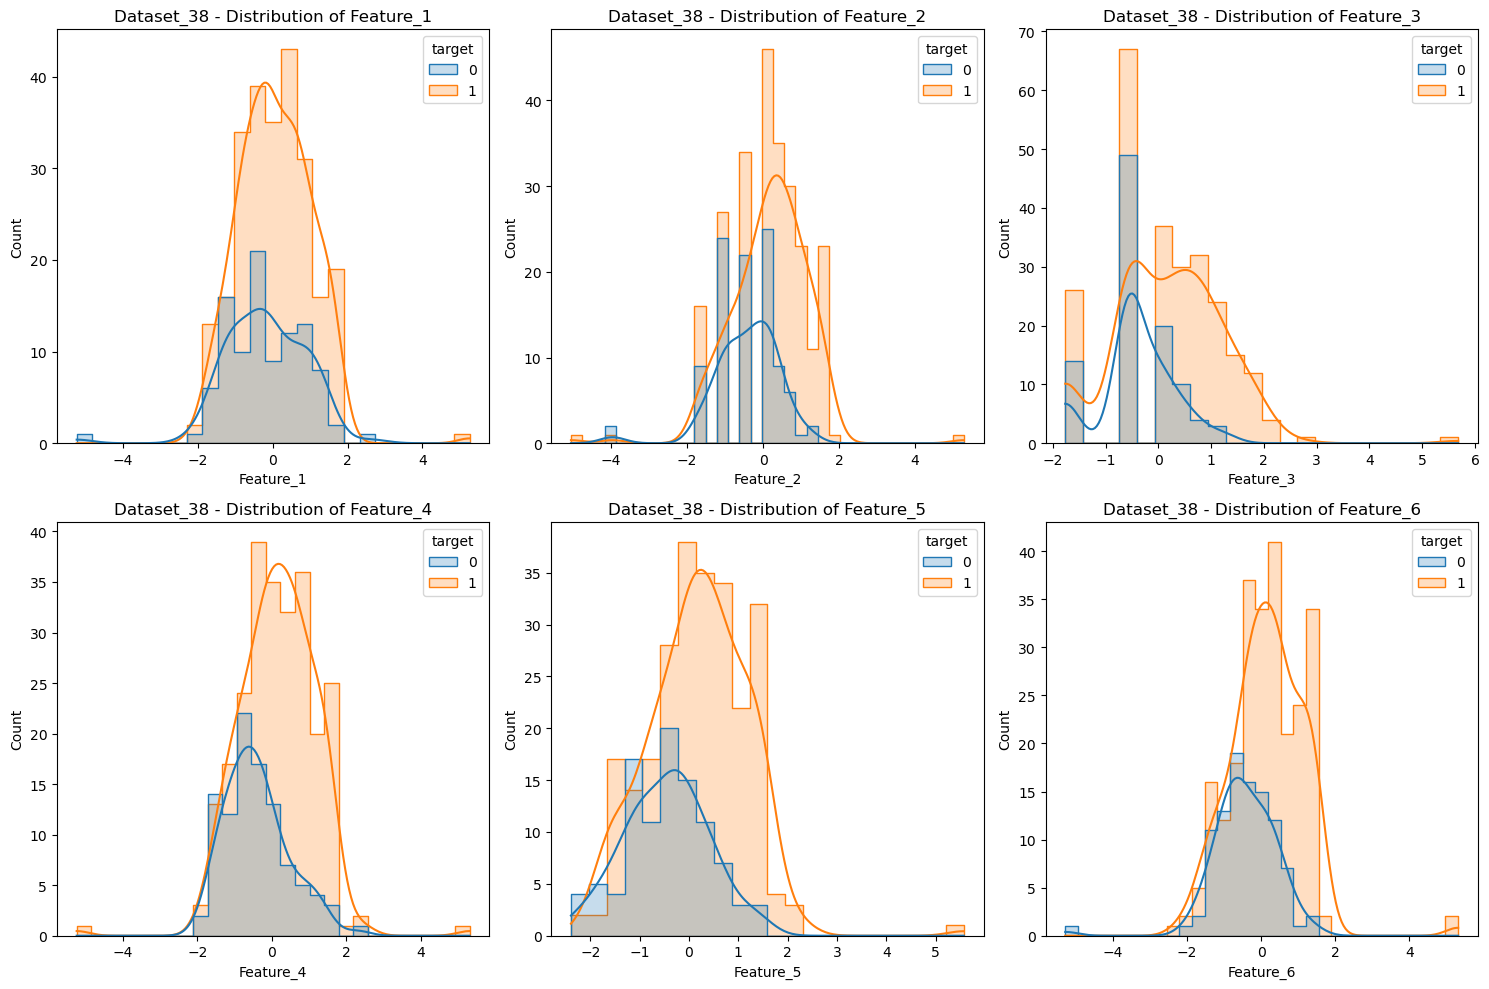

Dataset_38 - Validation Accuracy: 0.74
Dataset_38 - Validation F1 Score: 0.84

Dataset_38 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.47      0.31      0.37        62
           1       0.78      0.88      0.83       172

    accuracy                           0.73       234
   macro avg       0.63      0.59      0.60       234
weighted avg       0.70      0.73      0.71       234

Saved predictions for Dataset_38 to ../Group_DS34/Competition_data/Dataset_38/y_predict.csv.

Processing Dataset_6...
DEBUG INFO: Dataset_6 - y_train.keys(): Index(['target'], dtype='object')


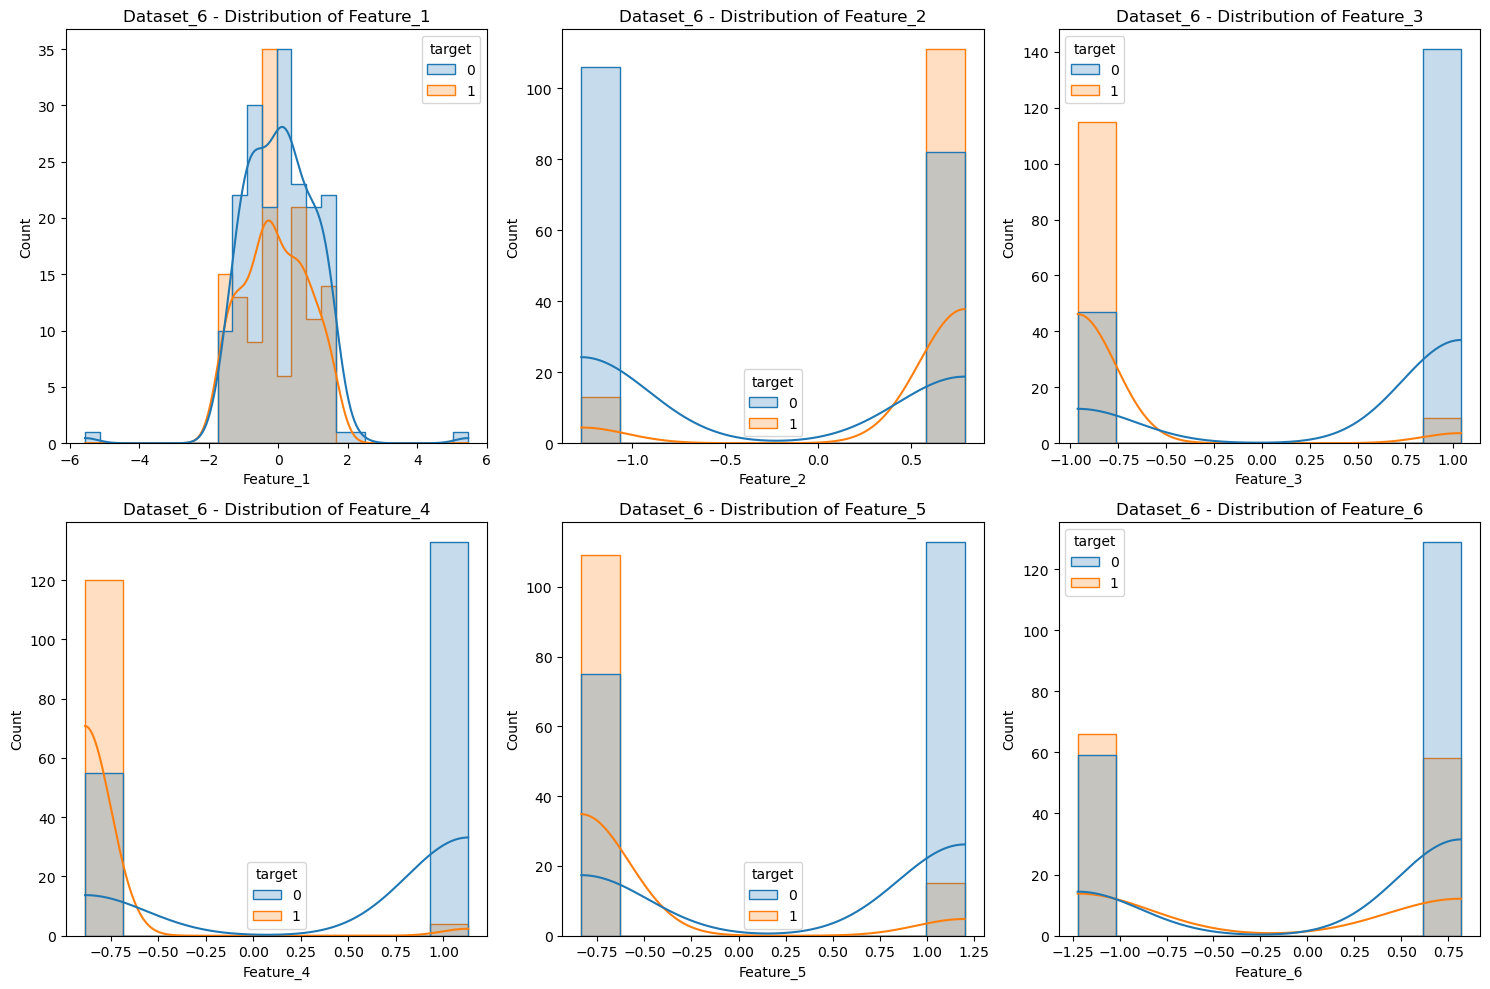

Dataset_6 - Validation Accuracy: 0.94
Dataset_6 - Validation F1 Score: 0.93

Dataset_6 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.03      1.00      0.05         3
           1       1.00      0.45      0.62       205

    accuracy                           0.46       208
   macro avg       0.51      0.73      0.34       208
weighted avg       0.99      0.46      0.62       208

Saved predictions for Dataset_6 to ../Group_DS34/Competition_data/Dataset_6/y_predict.csv.

Processing Dataset_31...
DEBUG INFO: Dataset_31 - y_train.keys(): Index(['target'], dtype='object')


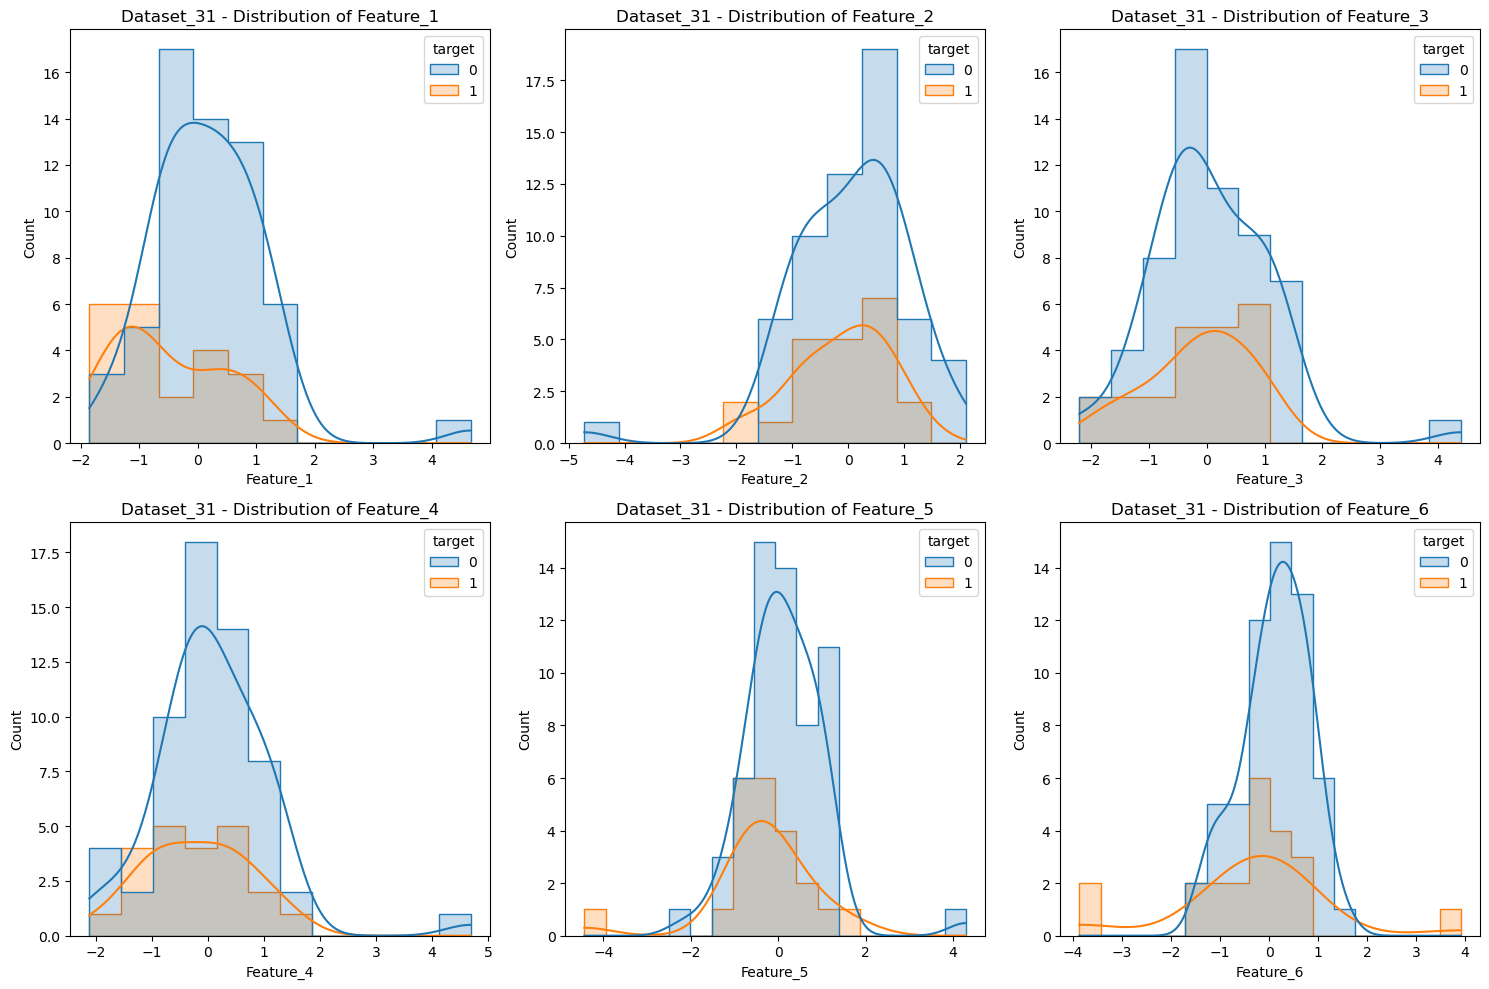

Dataset_31 - Validation Accuracy: 0.71
Dataset_31 - Validation F1 Score: 0.29

Dataset_31 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        18
           1       1.00      0.03      0.05        36

    accuracy                           0.35        54
   macro avg       0.67      0.51      0.28        54
weighted avg       0.78      0.35      0.21        54

Saved predictions for Dataset_31 to ../Group_DS34/Competition_data/Dataset_31/y_predict.csv.

Processing Dataset_1...
DEBUG INFO: Dataset_1 - y_train.keys(): Index(['target'], dtype='object')


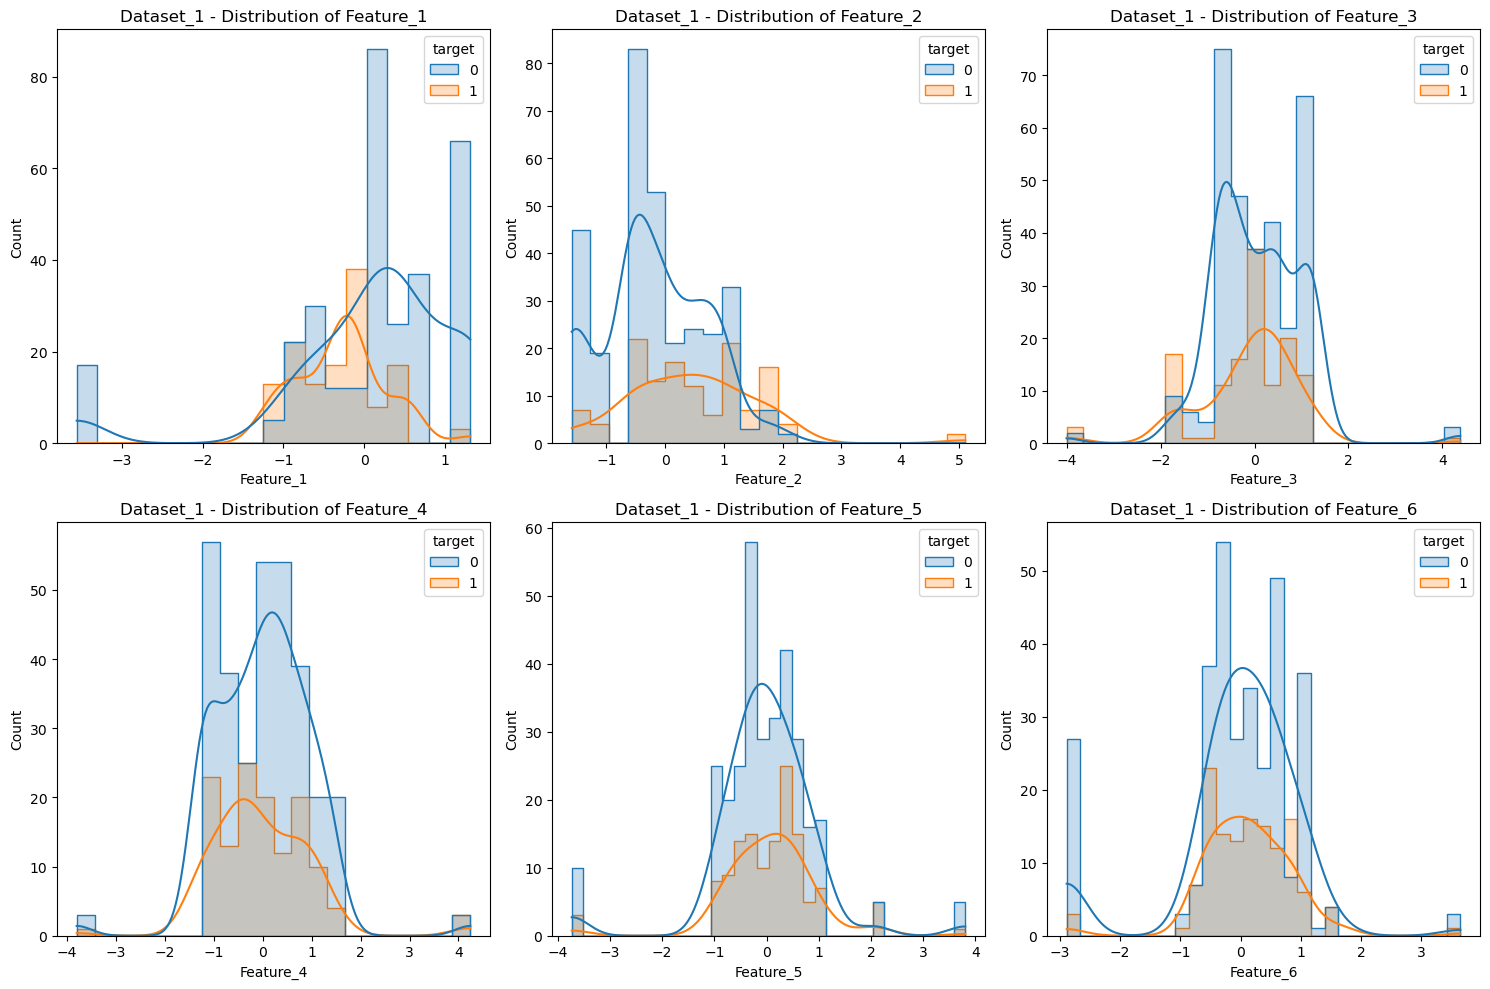

Dataset_1 - Validation Accuracy: 0.79
Dataset_1 - Validation F1 Score: 0.49

Dataset_1 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       145
           1       0.95      0.37      0.53       151

    accuracy                           0.67       296
   macro avg       0.77      0.68      0.64       296
weighted avg       0.78      0.67      0.64       296

Saved predictions for Dataset_1 to ../Group_DS34/Competition_data/Dataset_1/y_predict.csv.

Processing Dataset_36...
DEBUG INFO: Dataset_36 - y_train.keys(): Index(['target'], dtype='object')


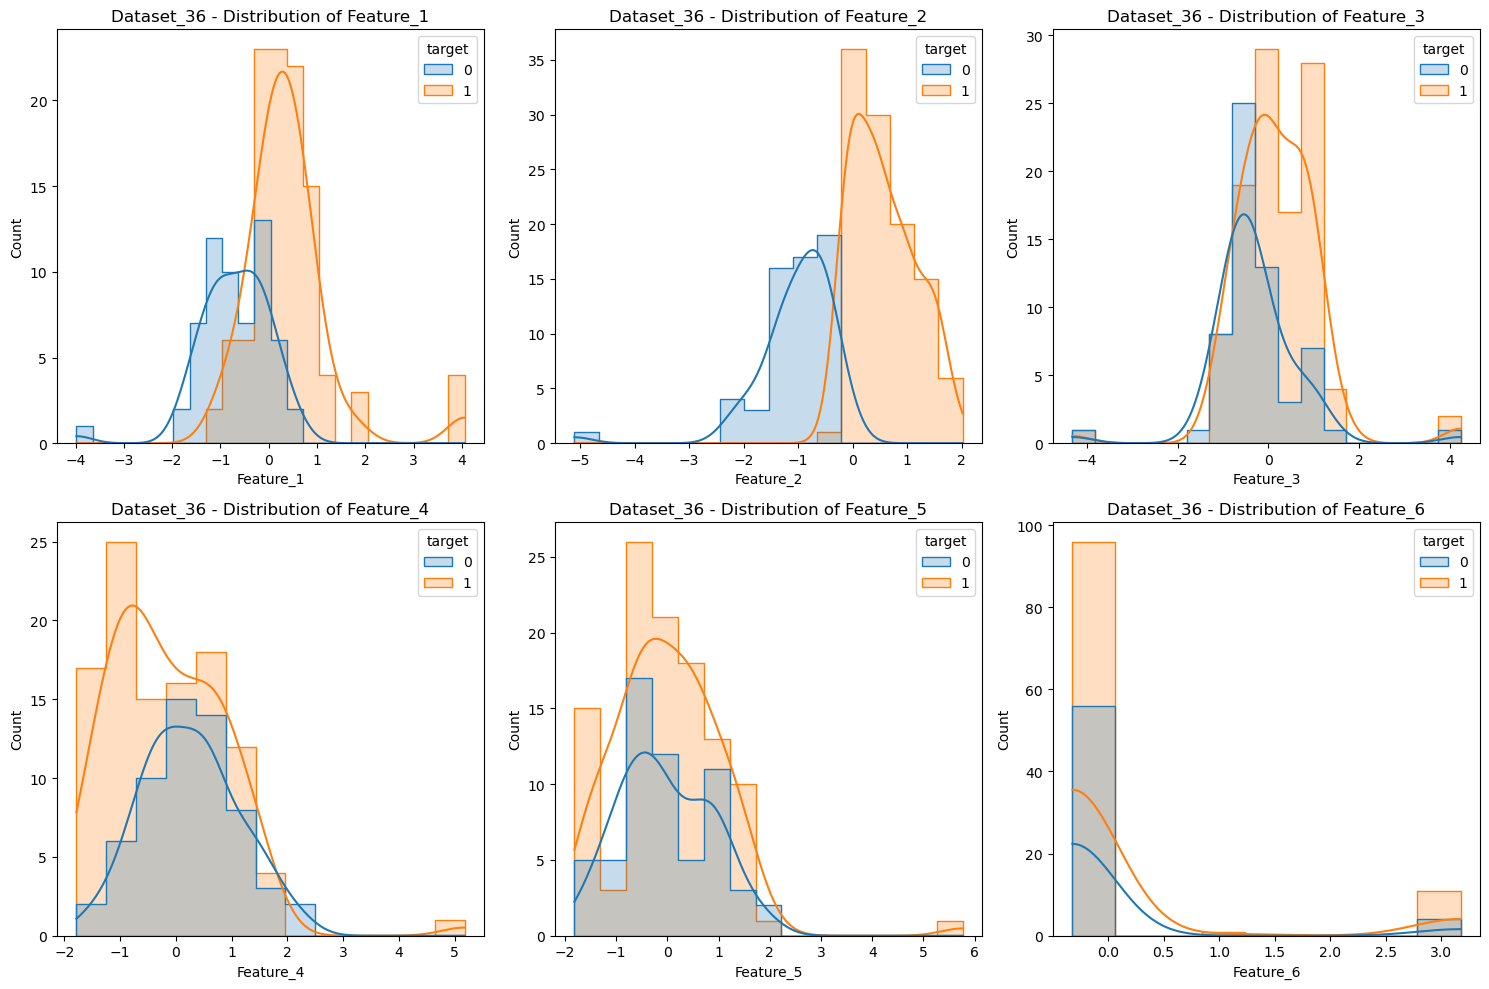

Dataset_36 - Validation Accuracy: 0.91
Dataset_36 - Validation F1 Score: 0.93

Dataset_36 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.95      0.95      0.95        75

    accuracy                           0.93       113
   macro avg       0.92      0.92      0.92       113
weighted avg       0.93      0.93      0.93       113

Saved predictions for Dataset_36 to ../Group_DS34/Competition_data/Dataset_36/y_predict.csv.

Processing Dataset_37...
DEBUG INFO: Dataset_37 - y_train.keys(): Index(['target'], dtype='object')


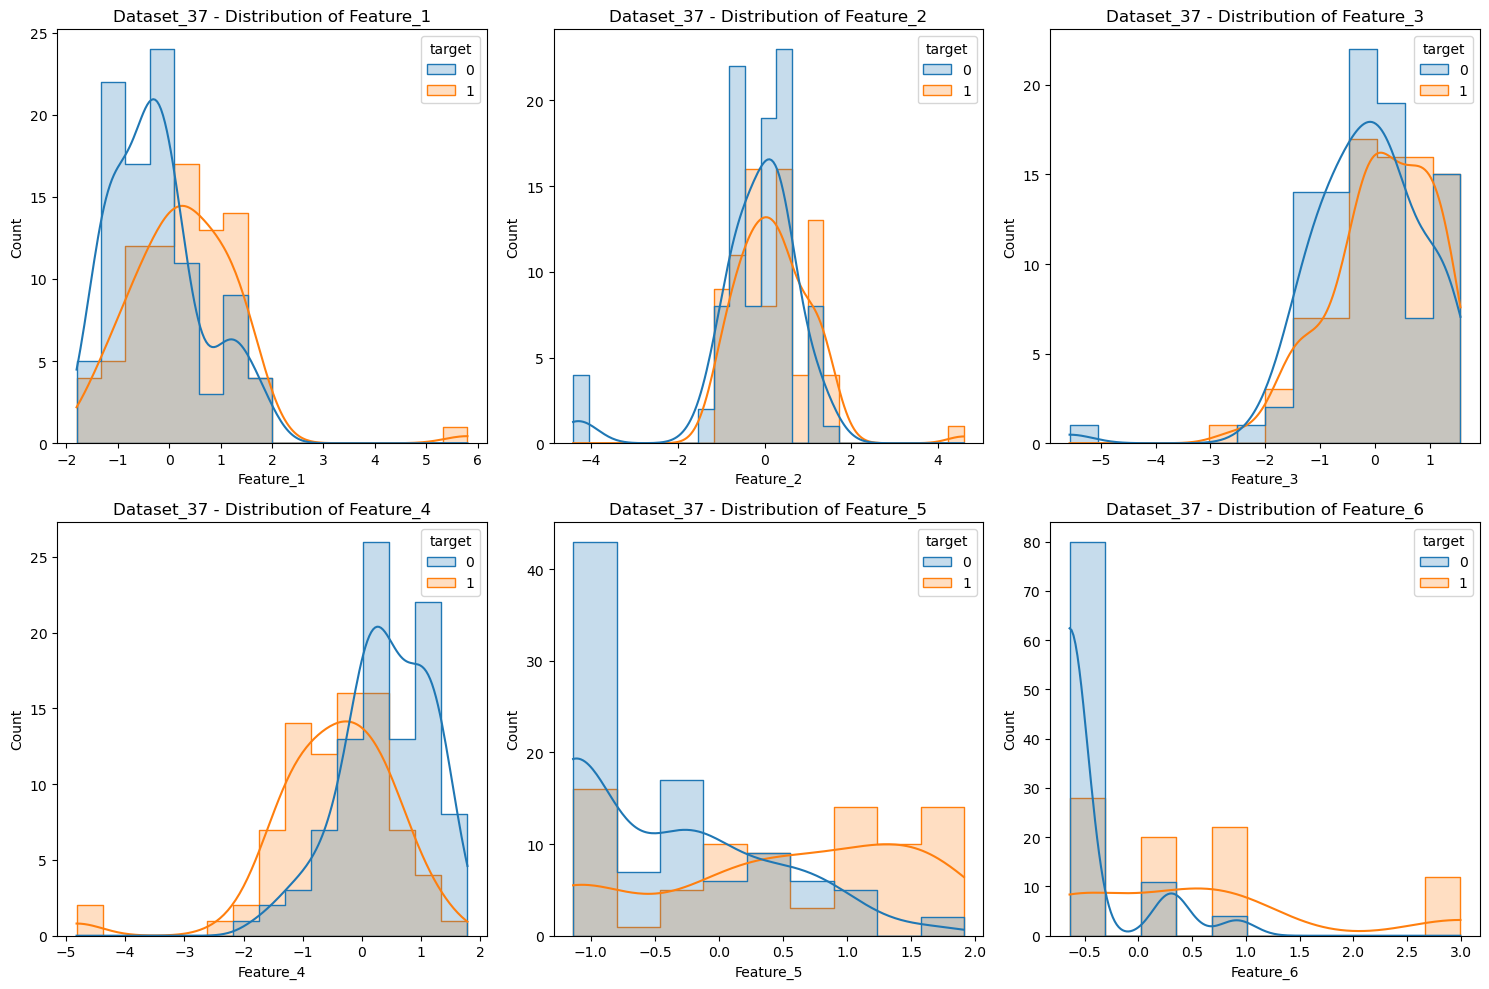

Dataset_37 - Validation Accuracy: 0.83
Dataset_37 - Validation F1 Score: 0.82

Dataset_37 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.23      0.48      0.31        23
           1       0.83      0.62      0.71        96

    accuracy                           0.60       119
   macro avg       0.53      0.55      0.51       119
weighted avg       0.72      0.60      0.64       119

Saved predictions for Dataset_37 to ../Group_DS34/Competition_data/Dataset_37/y_predict.csv.

Processing Dataset_7...
DEBUG INFO: Dataset_7 - y_train.keys(): Index(['target'], dtype='object')


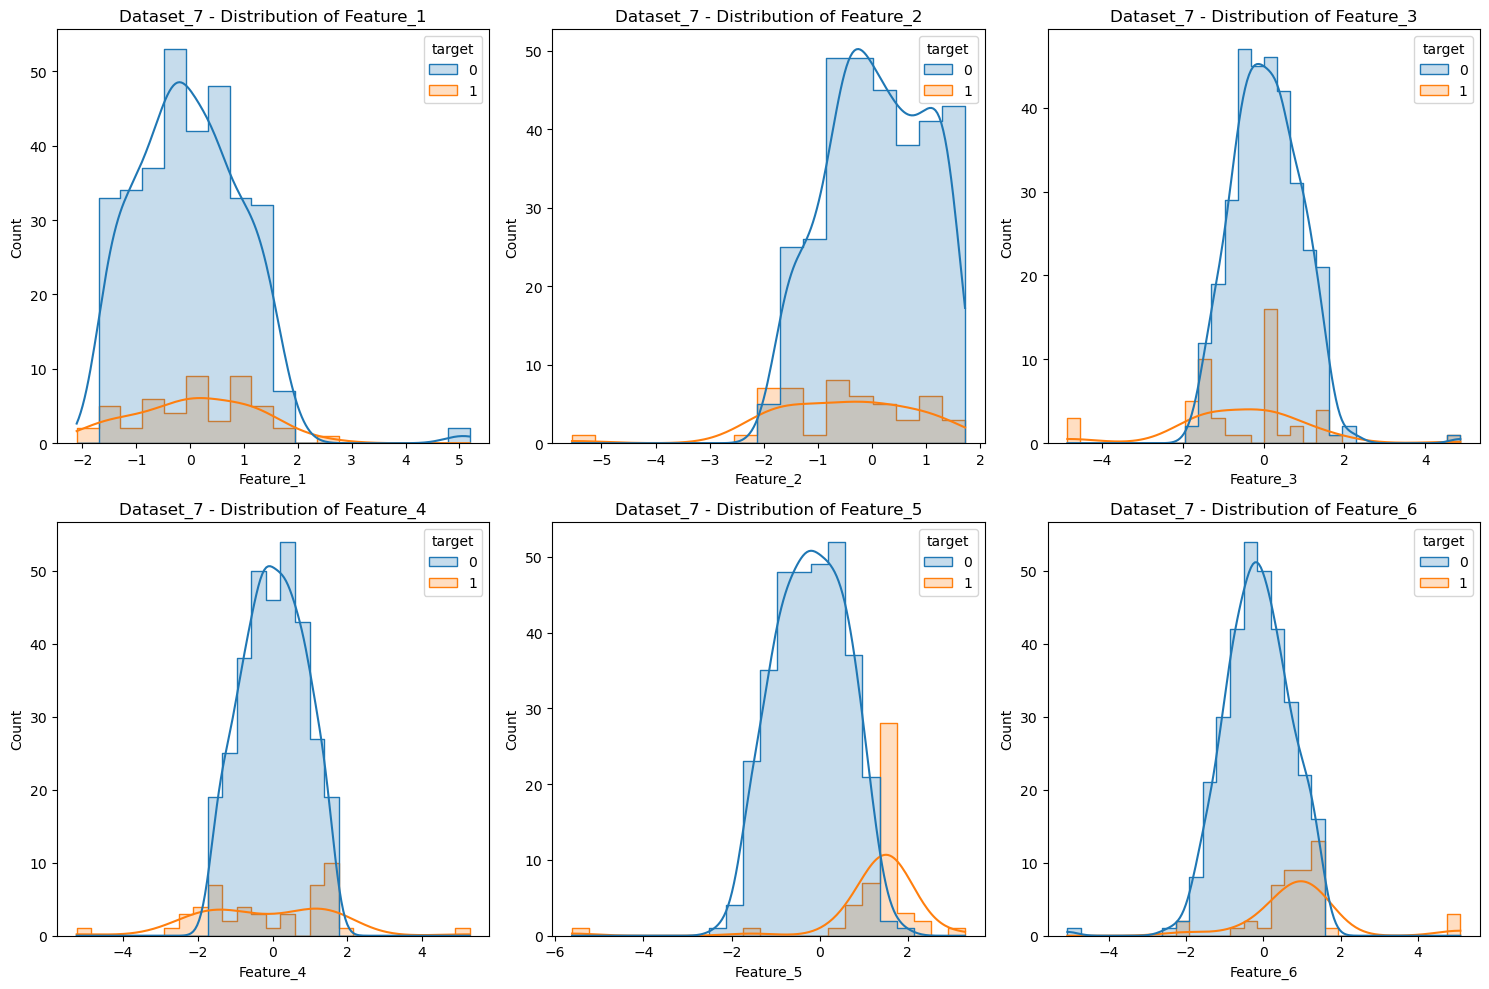

Dataset_7 - Validation Accuracy: 0.95
Dataset_7 - Validation F1 Score: 0.67

Dataset_7 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.20      0.83      0.33        53
           1       0.69      0.10      0.18       193

    accuracy                           0.26       246
   macro avg       0.45      0.47      0.25       246
weighted avg       0.58      0.26      0.21       246

Saved predictions for Dataset_7 to ../Group_DS34/Competition_data/Dataset_7/y_predict.csv.

Processing Dataset_30...
DEBUG INFO: Dataset_30 - y_train.keys(): Index(['target'], dtype='object')


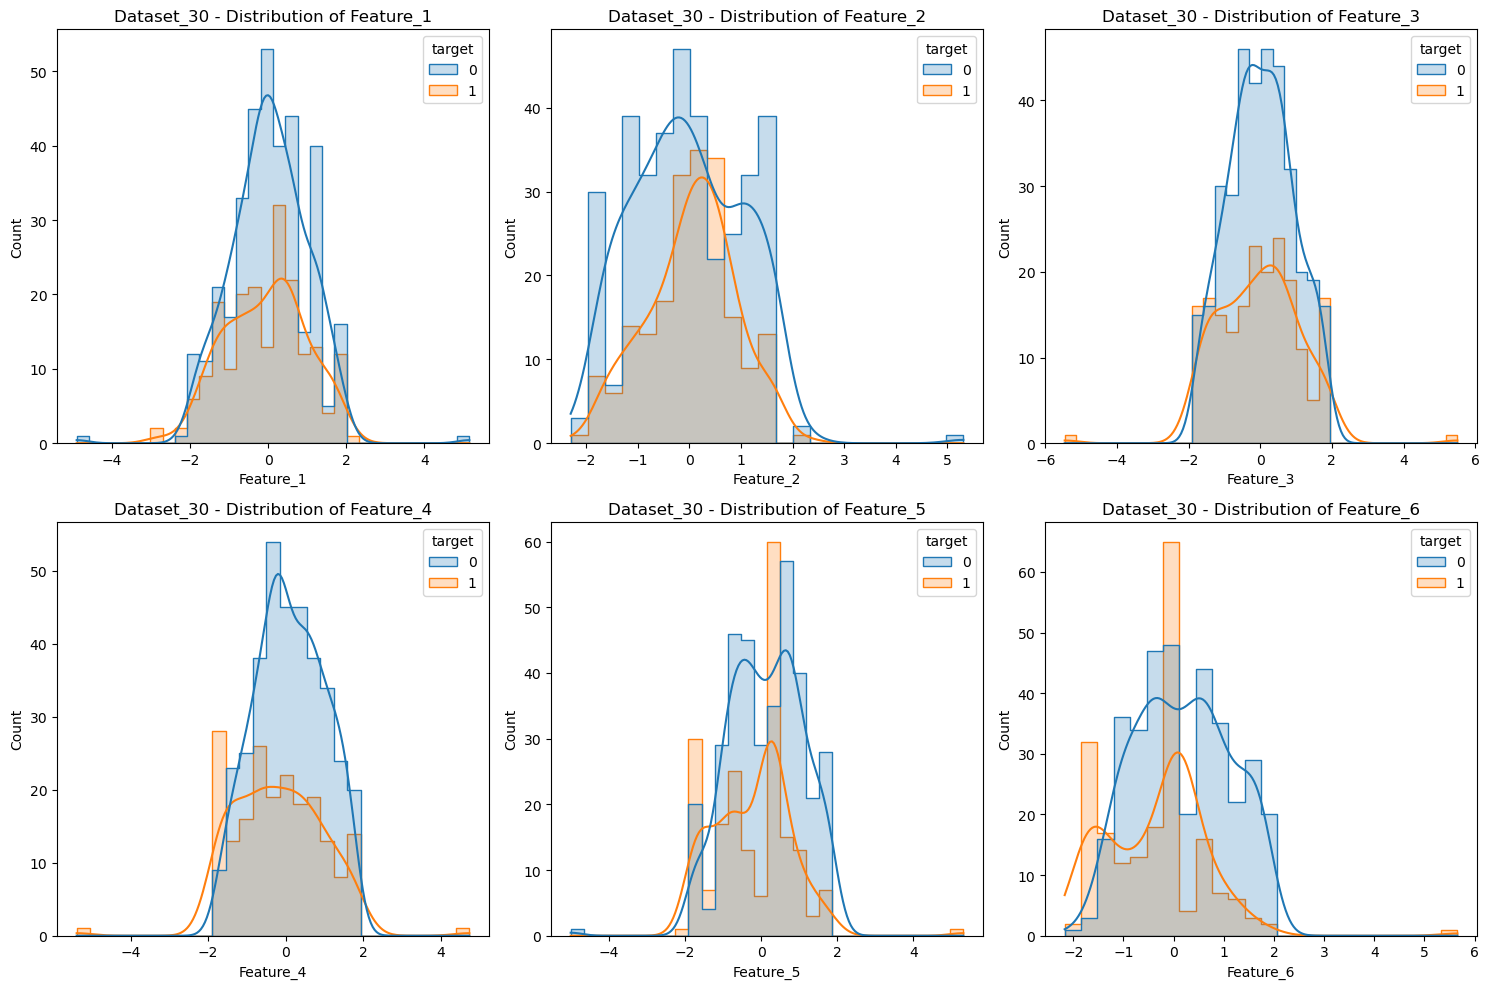

Dataset_30 - Validation Accuracy: 0.79
Dataset_30 - Validation F1 Score: 0.68

Dataset_30 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72       179
           1       0.87      0.37      0.52       191

    accuracy                           0.65       370
   macro avg       0.72      0.66      0.62       370
weighted avg       0.73      0.65      0.62       370

Saved predictions for Dataset_30 to ../Group_DS34/Competition_data/Dataset_30/y_predict.csv.

Processing Dataset_39...
DEBUG INFO: Dataset_39 - y_train.keys(): Index(['target'], dtype='object')


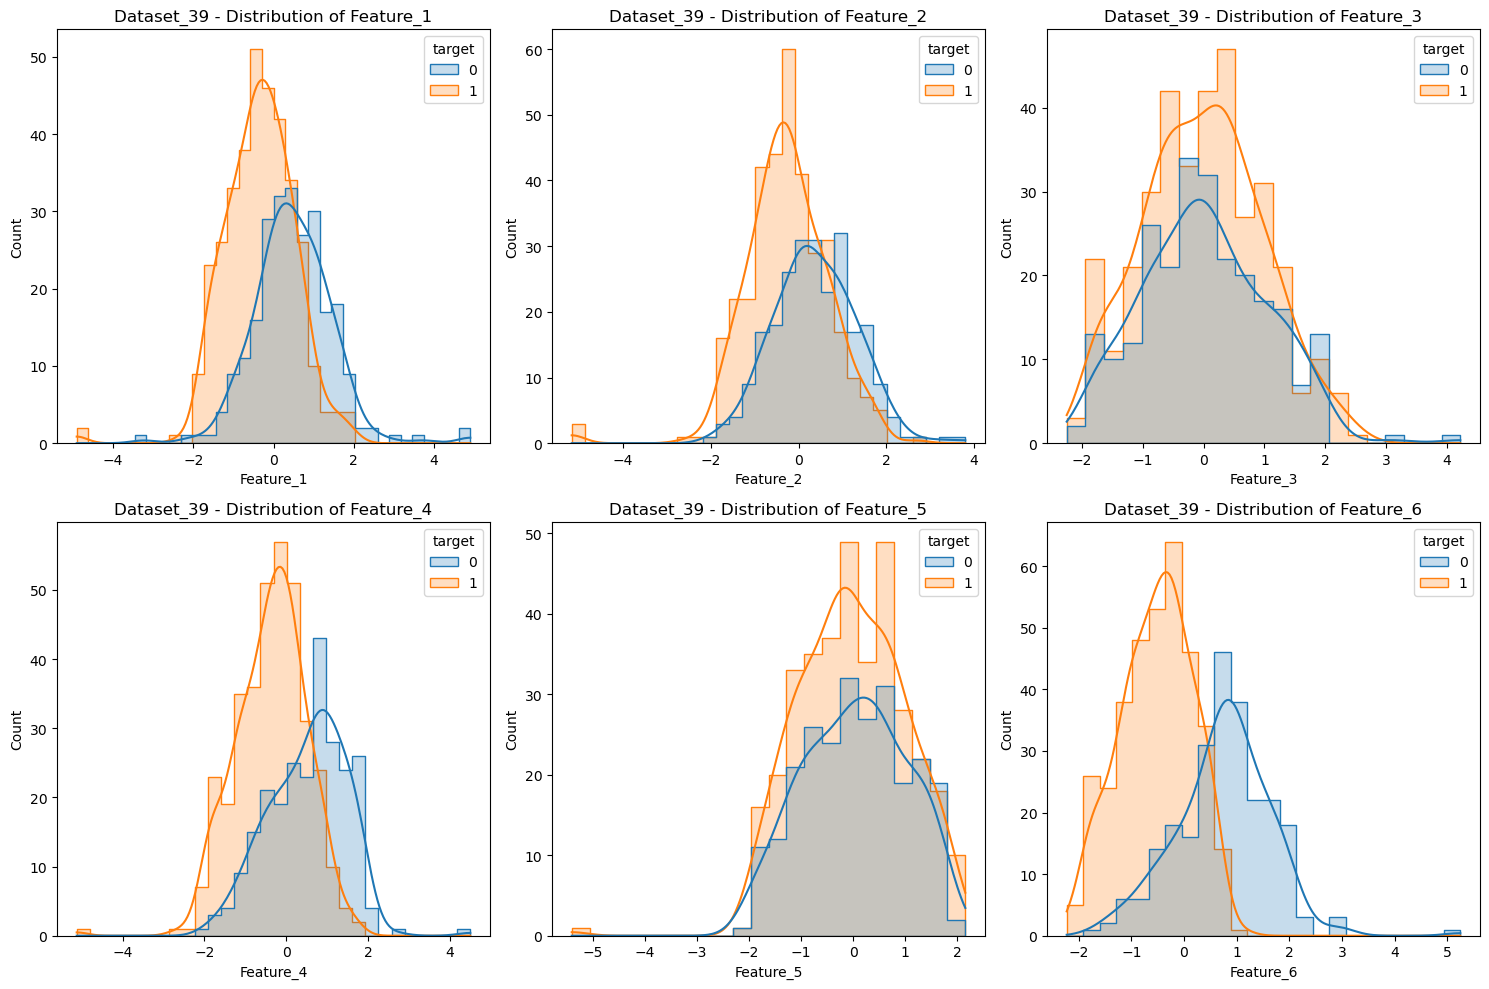

Dataset_39 - Validation Accuracy: 0.98
Dataset_39 - Validation F1 Score: 0.99

Dataset_39 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.35      0.50      0.41       118
           1       0.75      0.62      0.68       282

    accuracy                           0.58       400
   macro avg       0.55      0.56      0.54       400
weighted avg       0.63      0.58      0.60       400

Saved predictions for Dataset_39 to ../Group_DS34/Competition_data/Dataset_39/y_predict.csv.

Processing Dataset_9...
DEBUG INFO: Dataset_9 - y_train.keys(): Index(['target'], dtype='object')


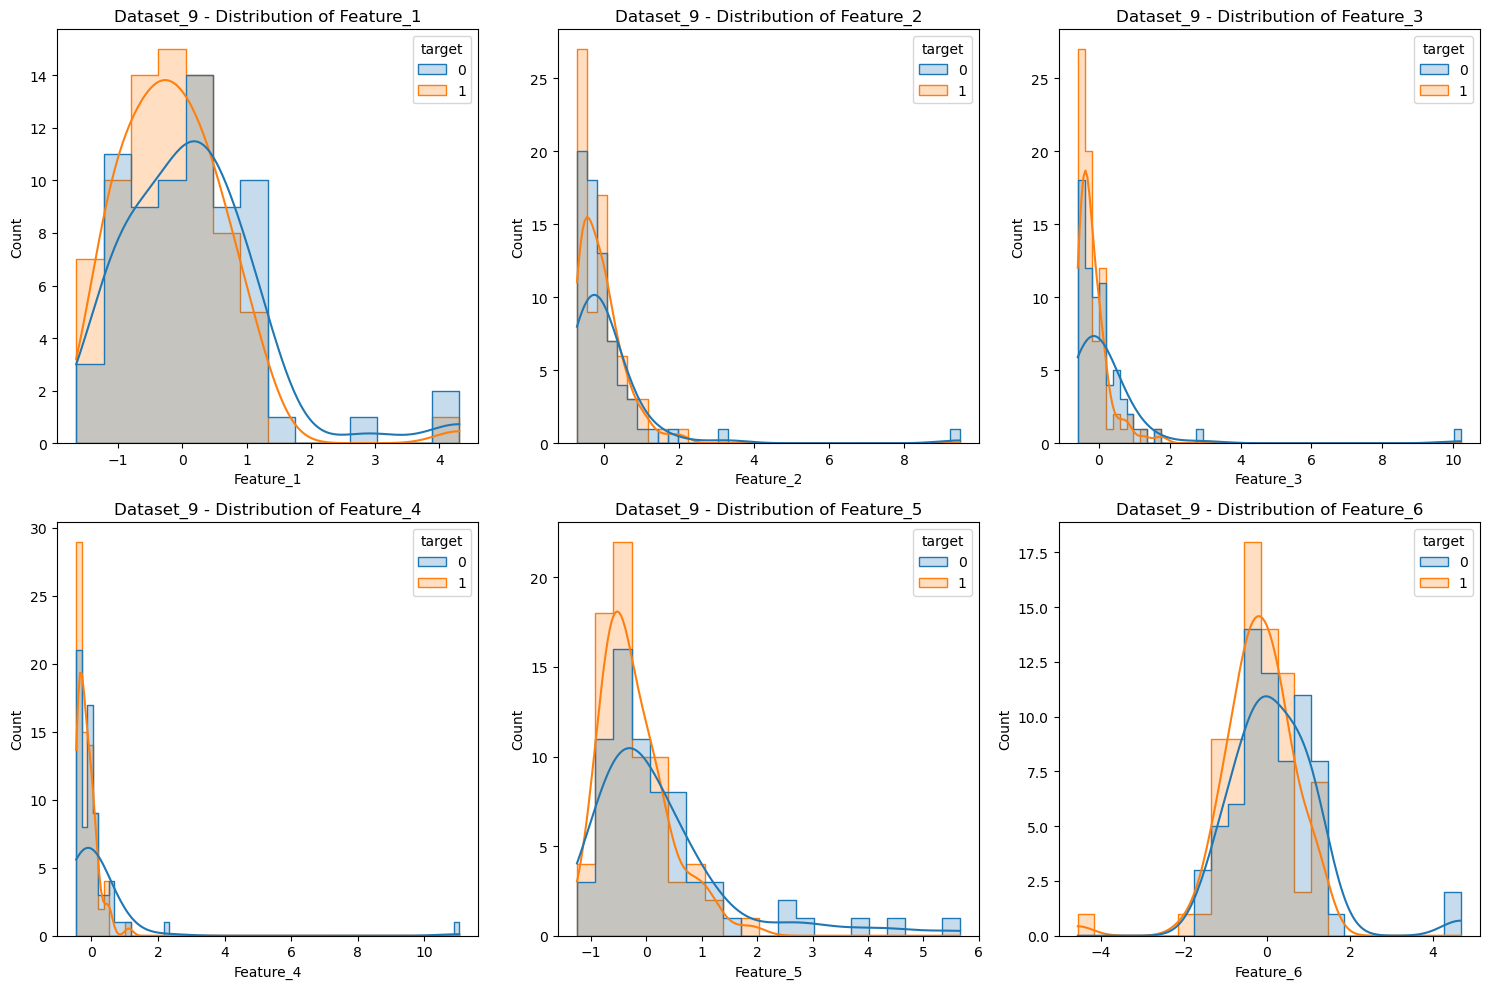

Dataset_9 - Validation Accuracy: 0.86
Dataset_9 - Validation F1 Score: 0.86

Dataset_9 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.95      0.88      0.91        64

    accuracy                           0.89        96
   macro avg       0.87      0.89      0.88        96
weighted avg       0.89      0.89      0.89        96

Saved predictions for Dataset_9 to ../Group_DS34/Competition_data/Dataset_9/y_predict.csv.

Processing Dataset_23...
DEBUG INFO: Dataset_23 - y_train.keys(): Index(['target'], dtype='object')


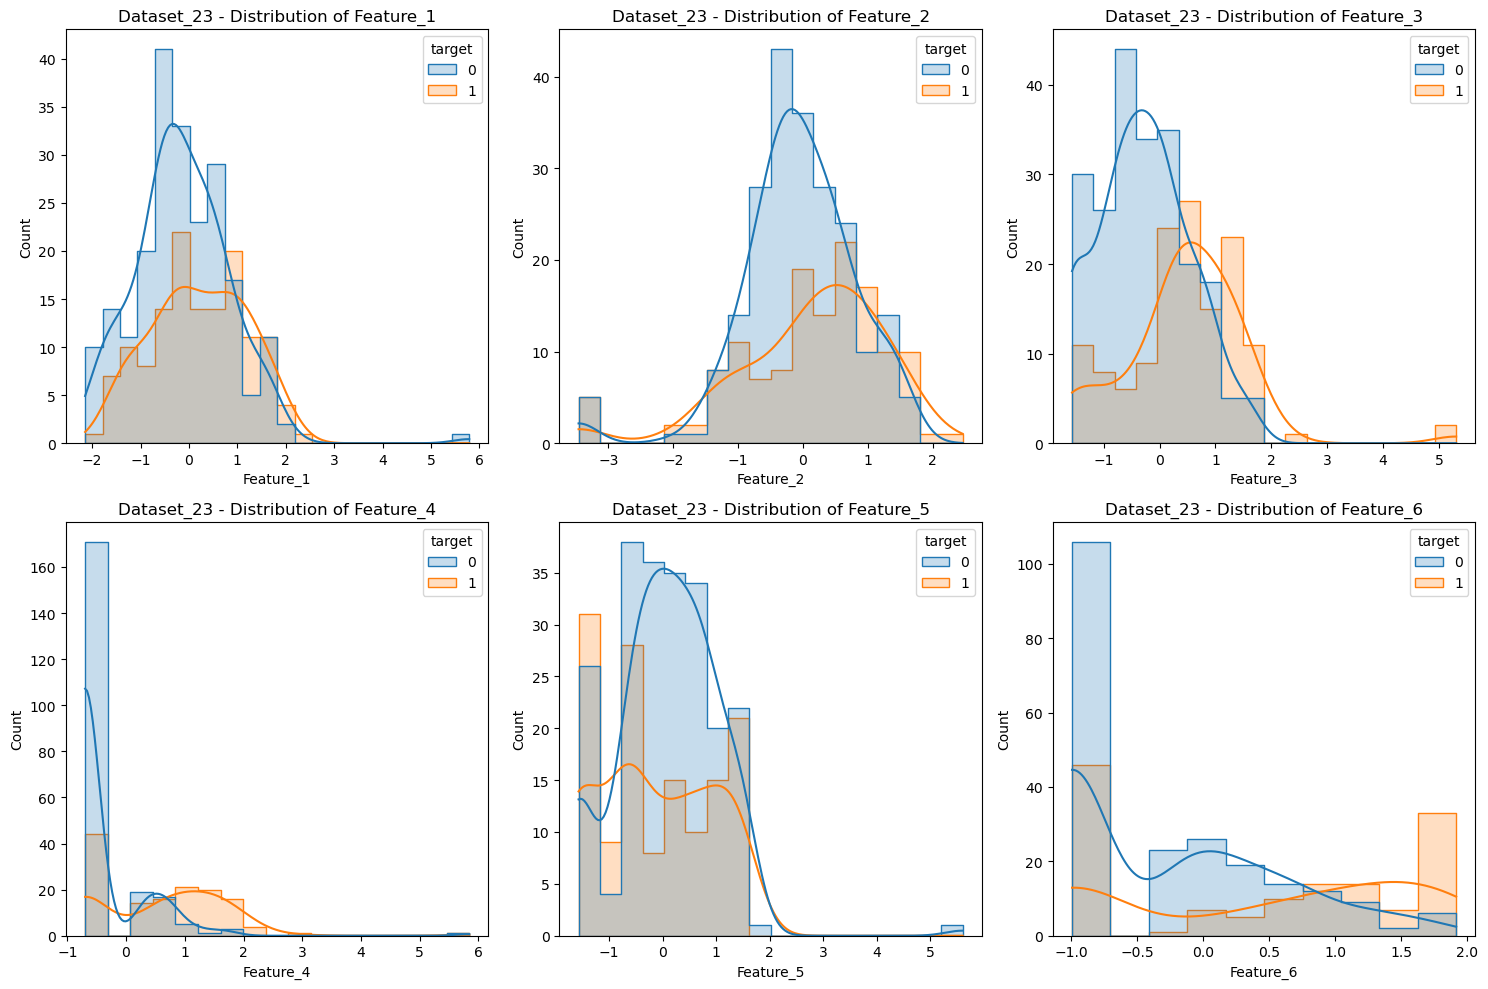

Dataset_23 - Validation Accuracy: 0.92
Dataset_23 - Validation F1 Score: 0.87

Dataset_23 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.52      0.84      0.64        91
           1       0.83      0.52      0.64       145

    accuracy                           0.64       236
   macro avg       0.68      0.68      0.64       236
weighted avg       0.71      0.64      0.64       236

Saved predictions for Dataset_23 to ../Group_DS34/Competition_data/Dataset_23/y_predict.csv.

Processing Dataset_24...
DEBUG INFO: Dataset_24 - y_train.keys(): Index(['target'], dtype='object')


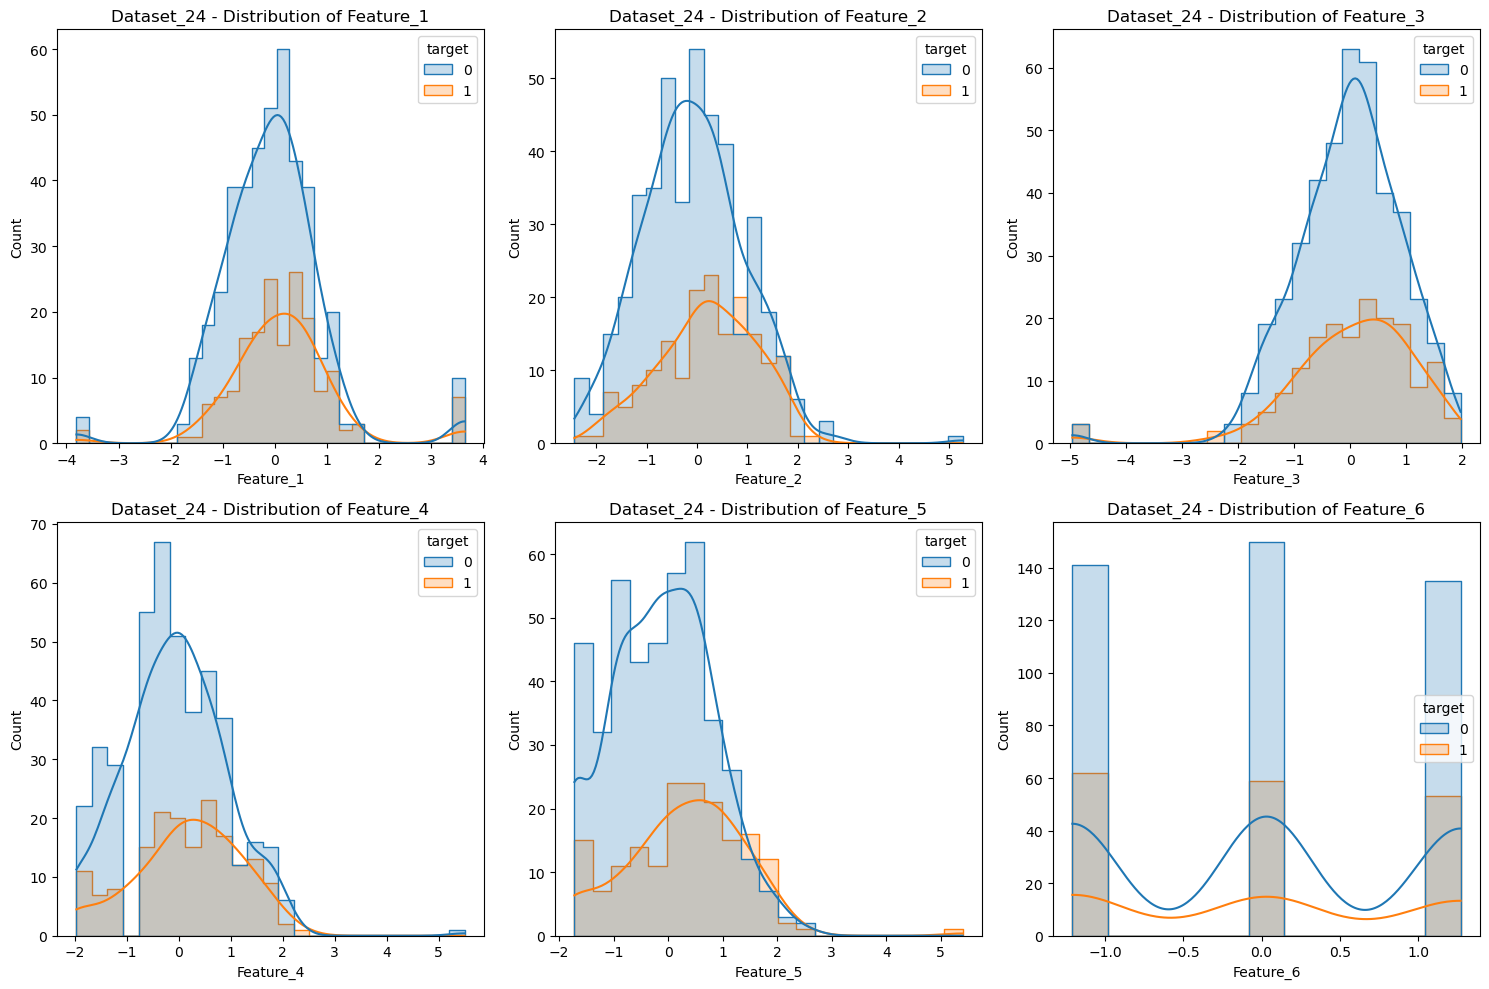

Dataset_24 - Validation Accuracy: 0.68
Dataset_24 - Validation F1 Score: 0.32

Dataset_24 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       147
           1       1.00      0.01      0.02       253

    accuracy                           0.37       400
   macro avg       0.68      0.50      0.28       400
weighted avg       0.77      0.37      0.21       400

Saved predictions for Dataset_24 to ../Group_DS34/Competition_data/Dataset_24/y_predict.csv.

Processing Dataset_12...
DEBUG INFO: Dataset_12 - y_train.keys(): Index(['target'], dtype='object')


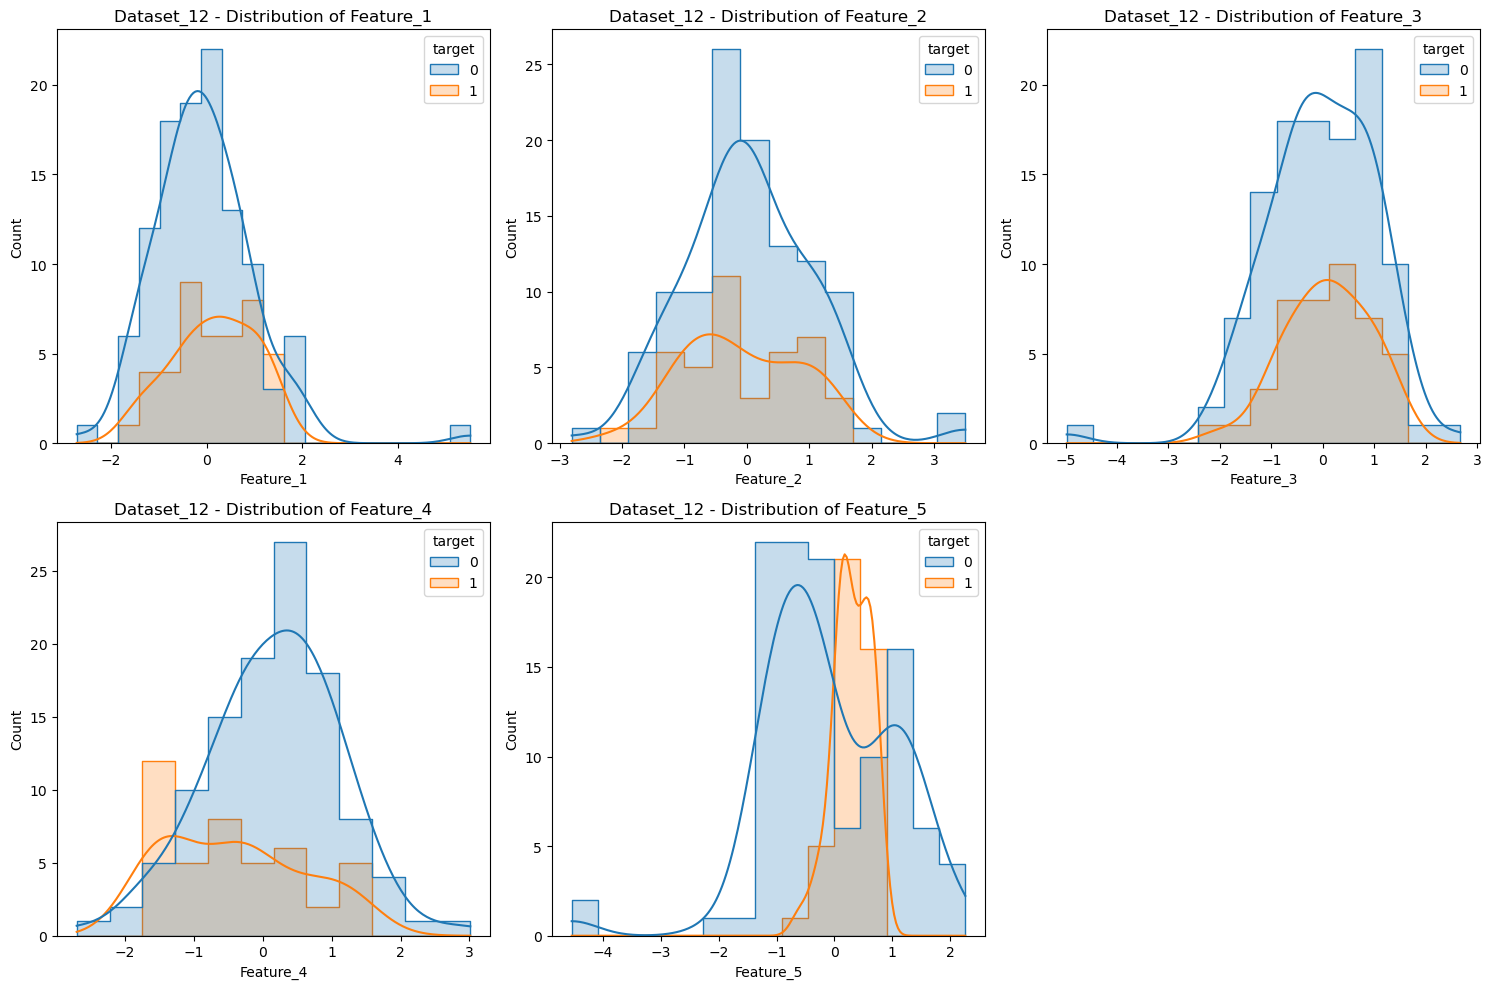

Dataset_12 - Validation Accuracy: 0.97
Dataset_12 - Validation F1 Score: 0.95

Dataset_12 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.31      0.66      0.42        32
           1       0.69      0.35      0.46        72

    accuracy                           0.44       104
   macro avg       0.50      0.50      0.44       104
weighted avg       0.58      0.44      0.45       104

Saved predictions for Dataset_12 to ../Group_DS34/Competition_data/Dataset_12/y_predict.csv.

Processing Dataset_15...
DEBUG INFO: Dataset_15 - y_train.keys(): Index(['target'], dtype='object')


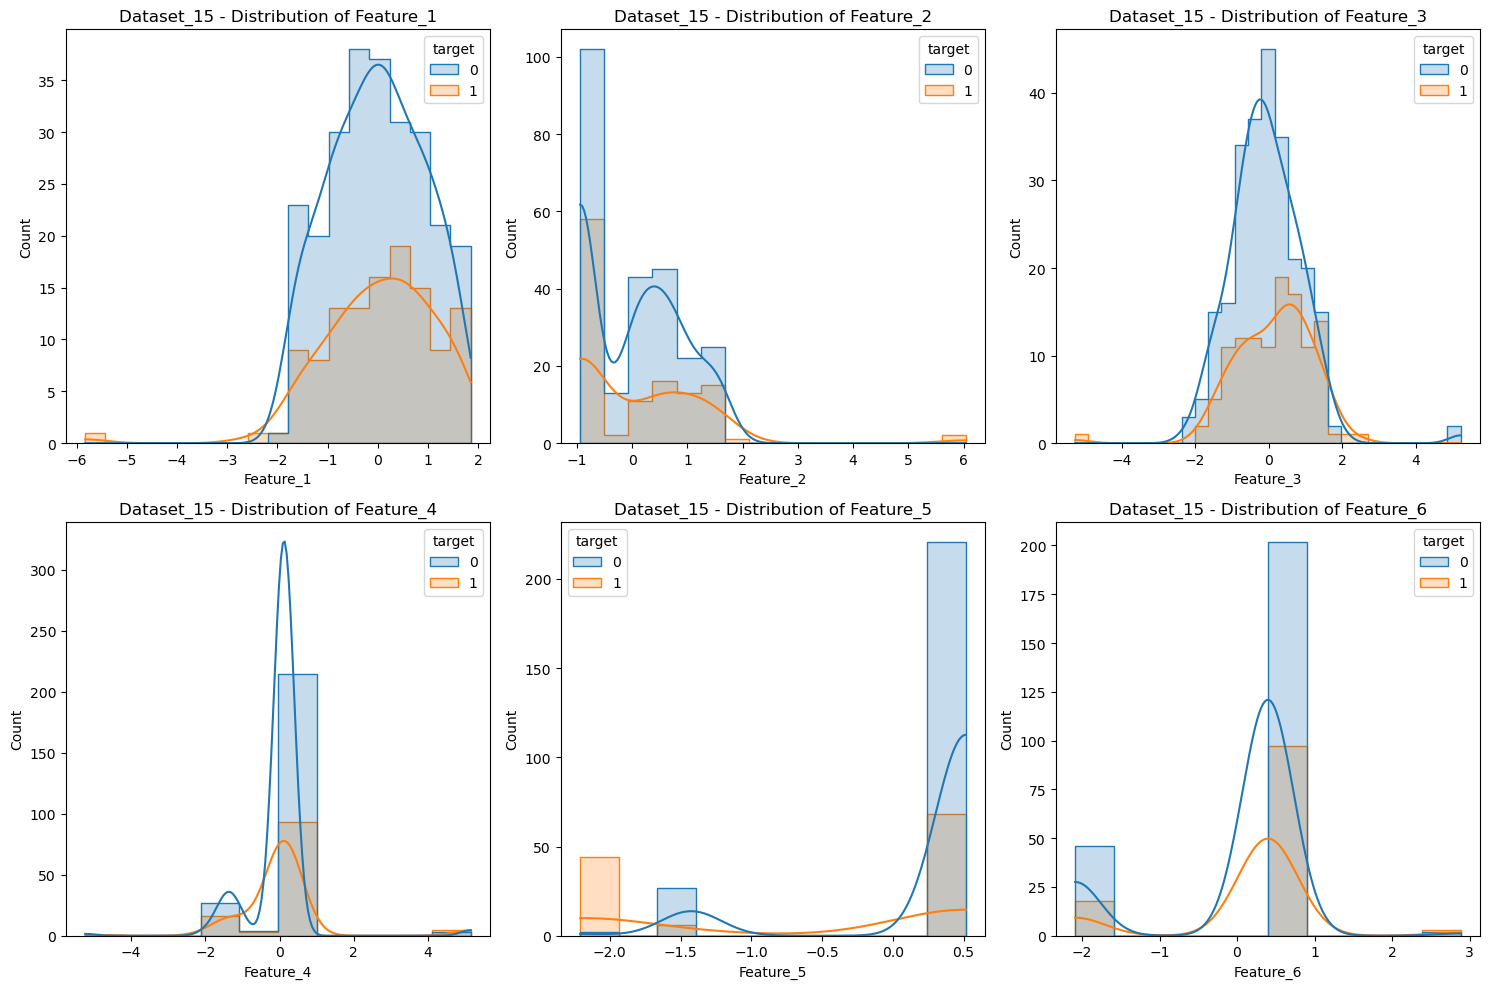

Dataset_15 - Validation Accuracy: 0.74
Dataset_15 - Validation F1 Score: 0.46

Dataset_15 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.36      0.97      0.53        90
           1       0.50      0.02      0.04       156

    accuracy                           0.37       246
   macro avg       0.43      0.49      0.28       246
weighted avg       0.45      0.37      0.22       246

Saved predictions for Dataset_15 to ../Group_DS34/Competition_data/Dataset_15/y_predict.csv.

Processing Dataset_41...
DEBUG INFO: Dataset_41 - y_train.keys(): Index(['target'], dtype='object')


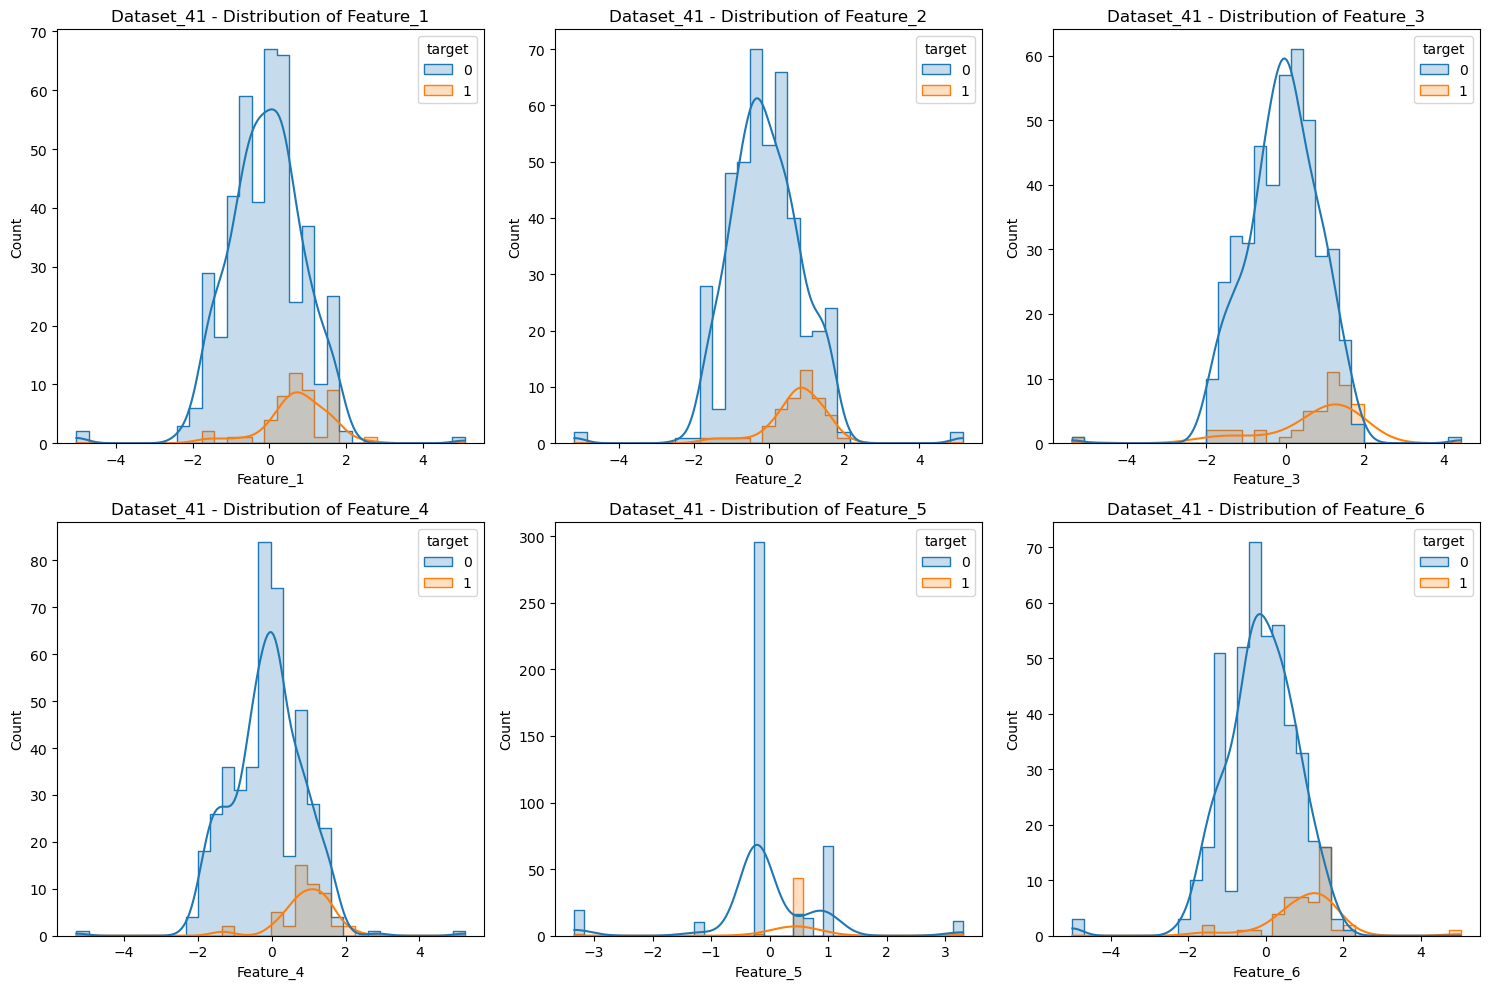

Dataset_41 - Validation Accuracy: 0.96
Dataset_41 - Validation F1 Score: 0.82

Dataset_41 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.17      0.95      0.29        56
           1       0.70      0.03      0.05       265

    accuracy                           0.19       321
   macro avg       0.44      0.49      0.17       321
weighted avg       0.61      0.19      0.09       321

Saved predictions for Dataset_41 to ../Group_DS34/Competition_data/Dataset_41/y_predict.csv.

Processing Dataset_46...
DEBUG INFO: Dataset_46 - y_train.keys(): Index(['target'], dtype='object')


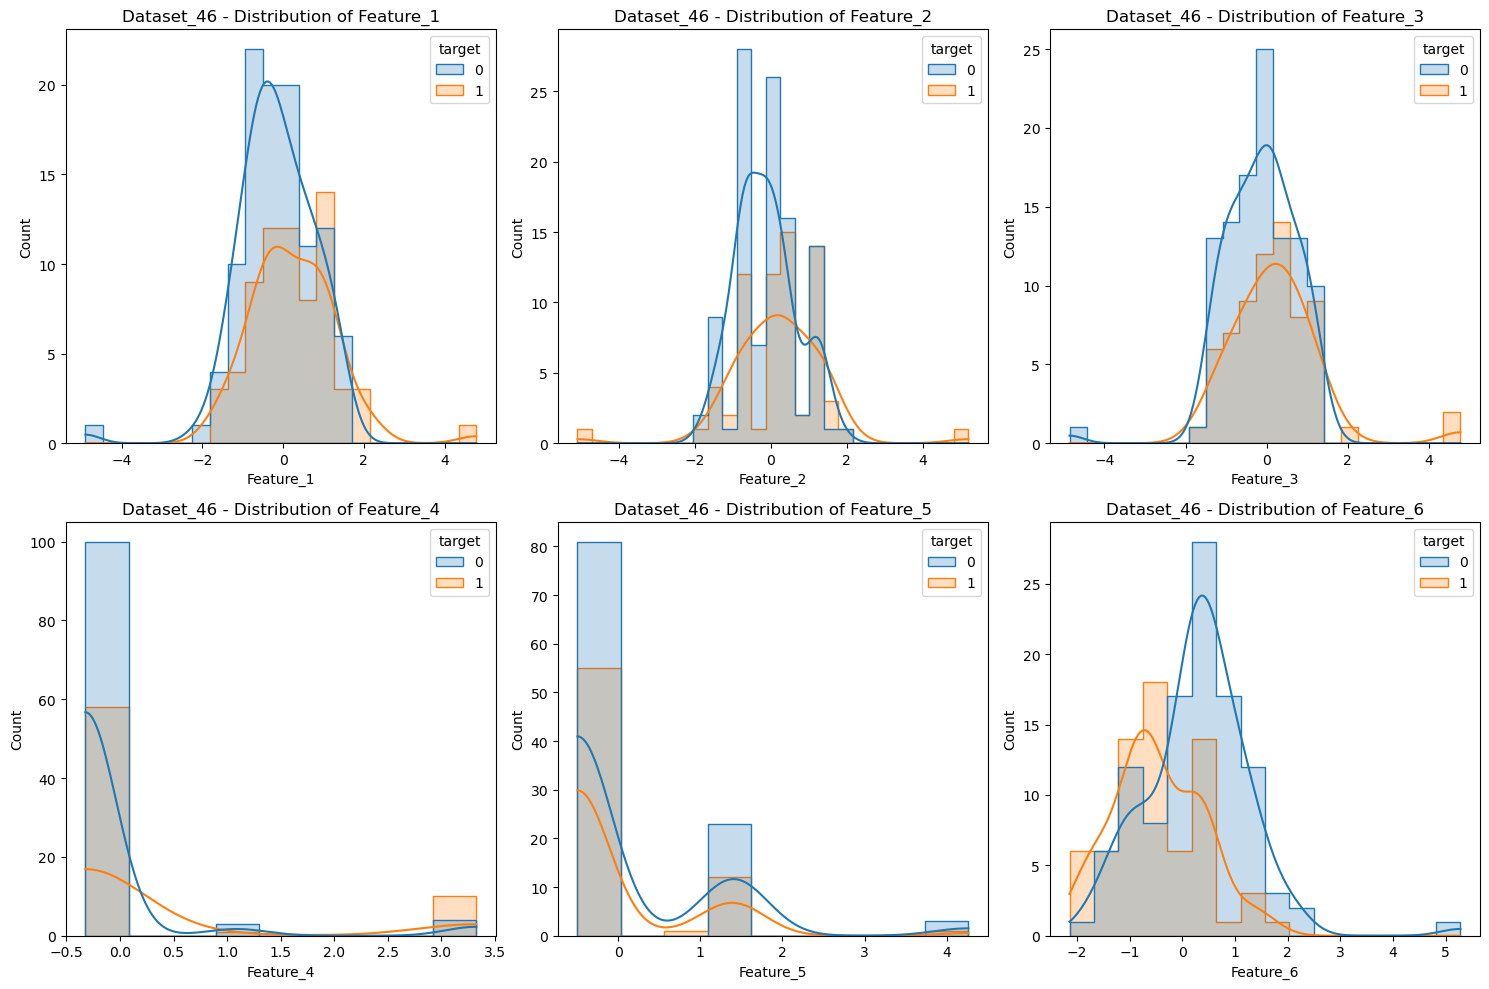

Dataset_46 - Validation Accuracy: 0.83
Dataset_46 - Validation F1 Score: 0.77

Dataset_46 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.38      0.74      0.50        35
           1       0.82      0.48      0.61        83

    accuracy                           0.56       118
   macro avg       0.60      0.61      0.55       118
weighted avg       0.69      0.56      0.57       118

Saved predictions for Dataset_46 to ../Group_DS34/Competition_data/Dataset_46/y_predict.csv.

Processing Dataset_48...
DEBUG INFO: Dataset_48 - y_train.keys(): Index(['target'], dtype='object')


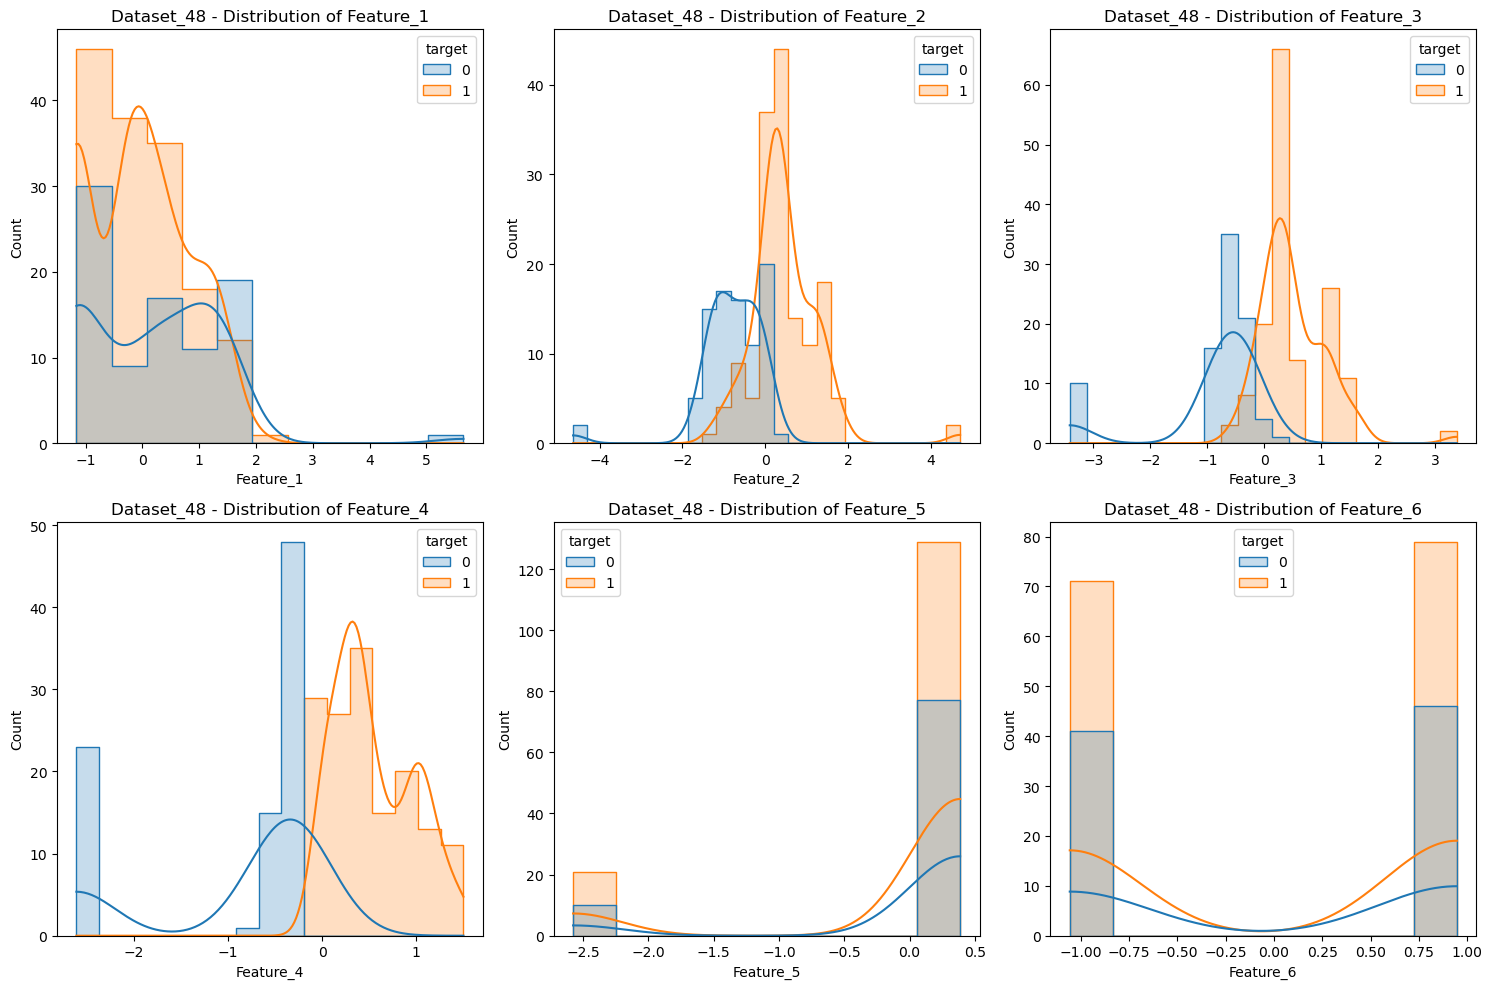

Dataset_48 - Validation Accuracy: 1.00
Dataset_48 - Validation F1 Score: 1.00

Dataset_48 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        52
           1       0.98      0.81      0.89       106

    accuracy                           0.86       158
   macro avg       0.85      0.89      0.85       158
weighted avg       0.89      0.86      0.86       158

Saved predictions for Dataset_48 to ../Group_DS34/Competition_data/Dataset_48/y_predict.csv.

Processing Dataset_14...
DEBUG INFO: Dataset_14 - y_train.keys(): Index(['target'], dtype='object')


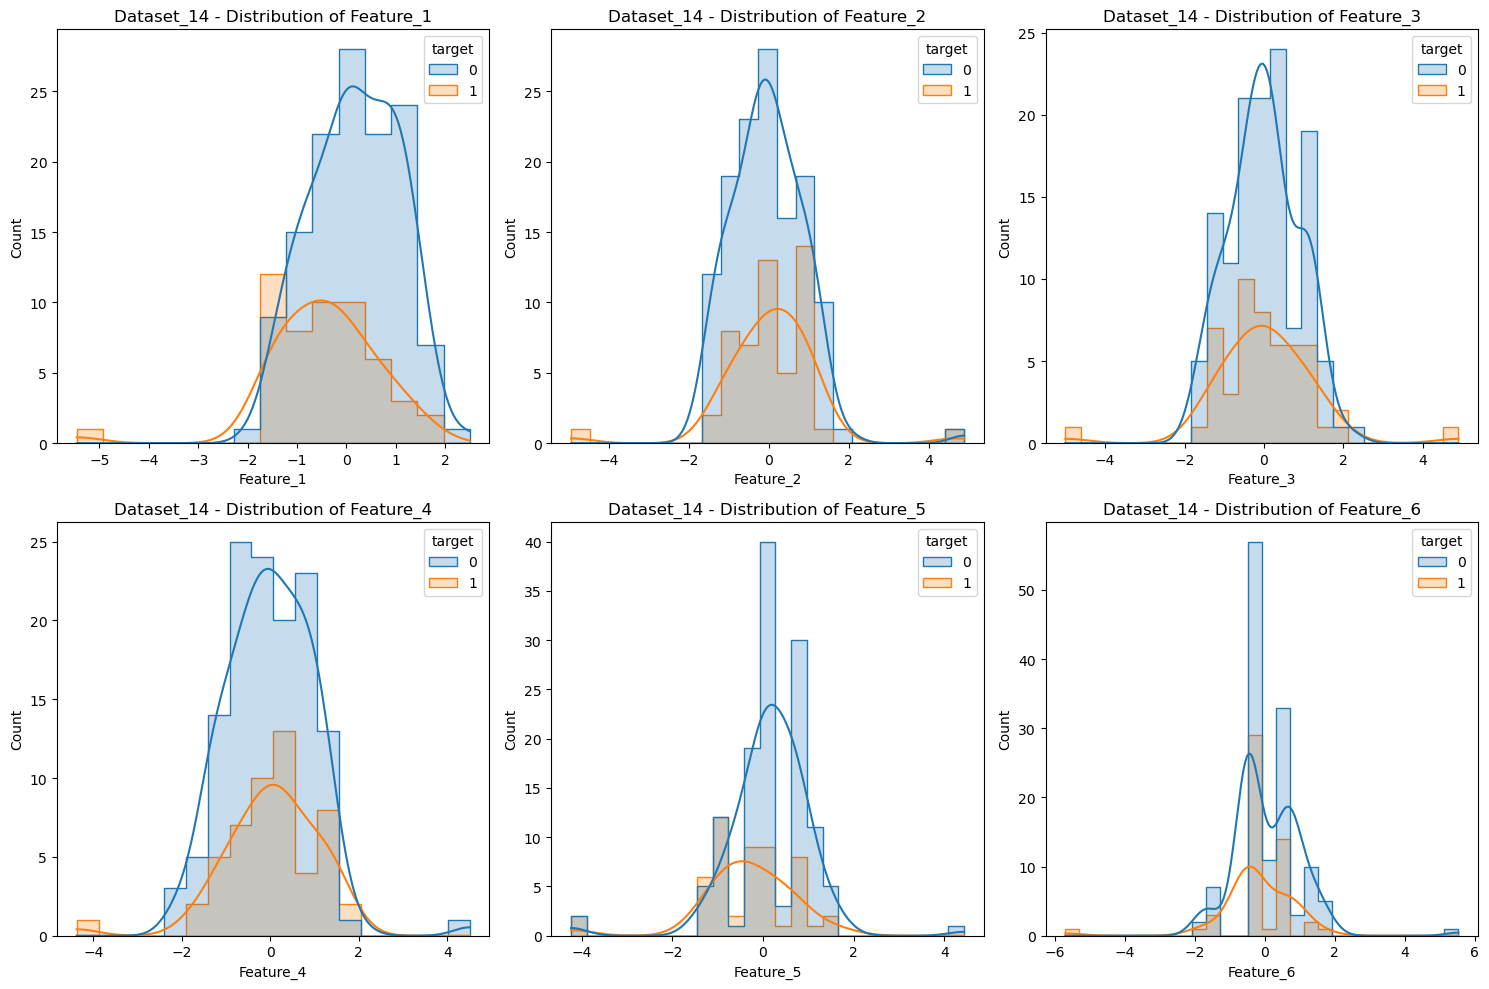

Dataset_14 - Validation Accuracy: 0.95
Dataset_14 - Validation F1 Score: 0.91

Dataset_14 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        98
           1       1.00      0.00      0.00        24

    accuracy                           0.80       122
   macro avg       0.90      0.50      0.45       122
weighted avg       0.84      0.80      0.72       122

Saved predictions for Dataset_14 to ../Group_DS34/Competition_data/Dataset_14/y_predict.csv.

Processing Dataset_13...
DEBUG INFO: Dataset_13 - y_train.keys(): Index(['target'], dtype='object')


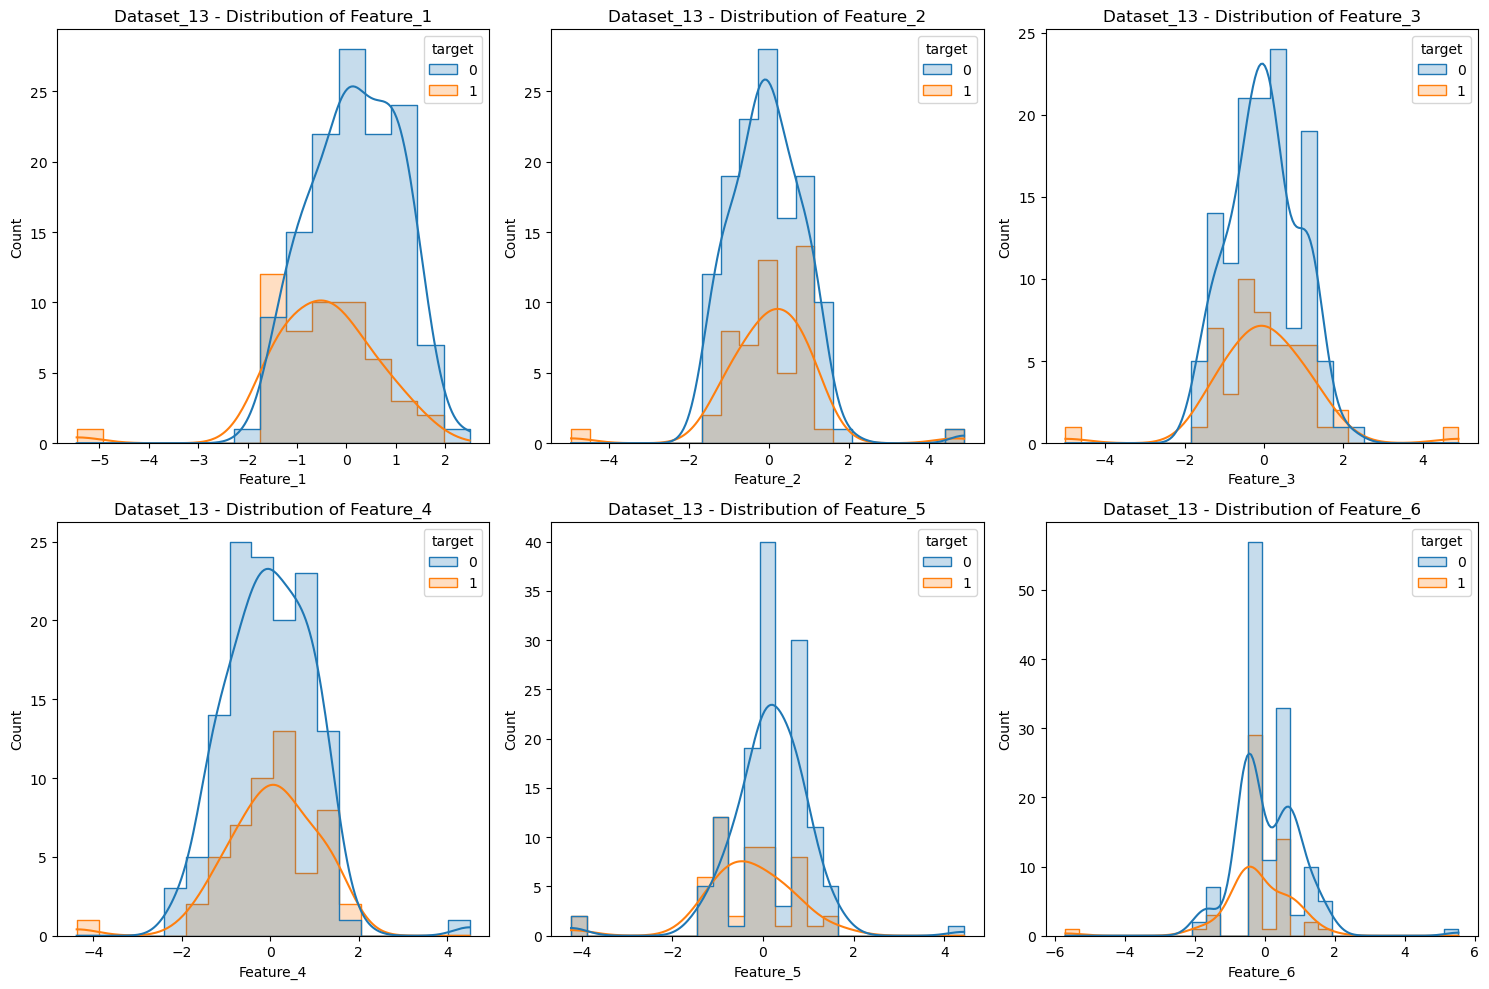

Dataset_13 - Validation Accuracy: 0.84
Dataset_13 - Validation F1 Score: 0.70

Dataset_13 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        90
           1       1.00      0.00      0.00        32

    accuracy                           0.74       122
   macro avg       0.87      0.50      0.42       122
weighted avg       0.81      0.74      0.63       122

Saved predictions for Dataset_13 to ../Group_DS34/Competition_data/Dataset_13/y_predict.csv.

Processing Dataset_25...
DEBUG INFO: Dataset_25 - y_train.keys(): Index(['target'], dtype='object')


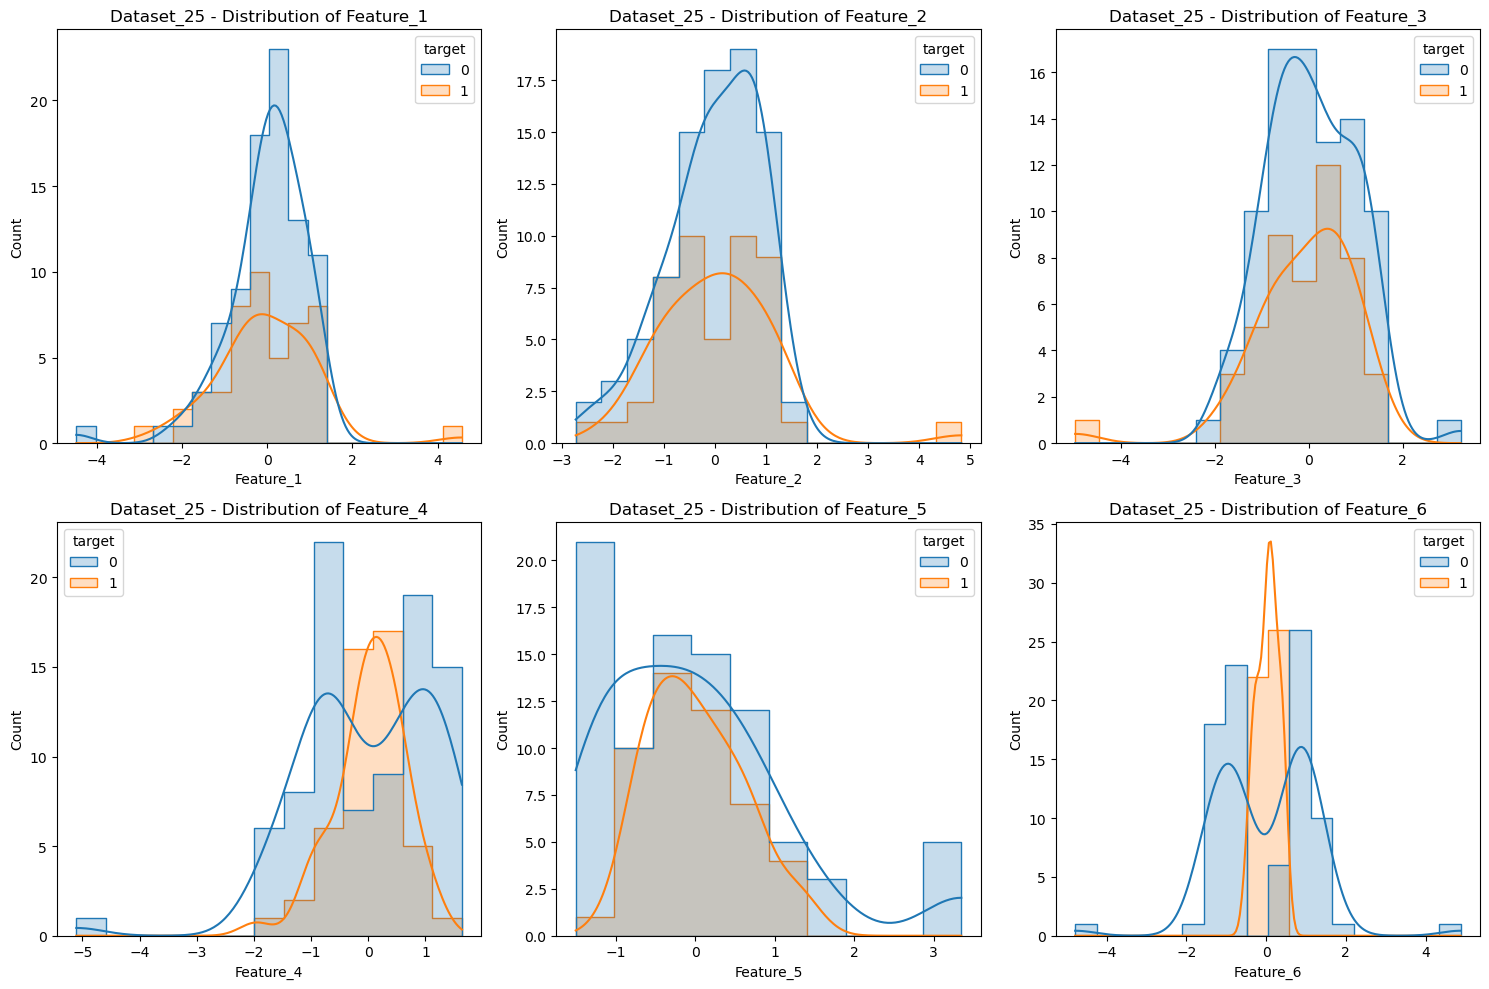

Dataset_25 - Validation Accuracy: 0.96
Dataset_25 - Validation F1 Score: 0.94

Dataset_25 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.24      0.52      0.33        25
           1       0.67      0.37      0.48        65

    accuracy                           0.41        90
   macro avg       0.45      0.44      0.40        90
weighted avg       0.55      0.41      0.43        90

Saved predictions for Dataset_25 to ../Group_DS34/Competition_data/Dataset_25/y_predict.csv.

Processing Dataset_22...
DEBUG INFO: Dataset_22 - y_train.keys(): Index(['target'], dtype='object')


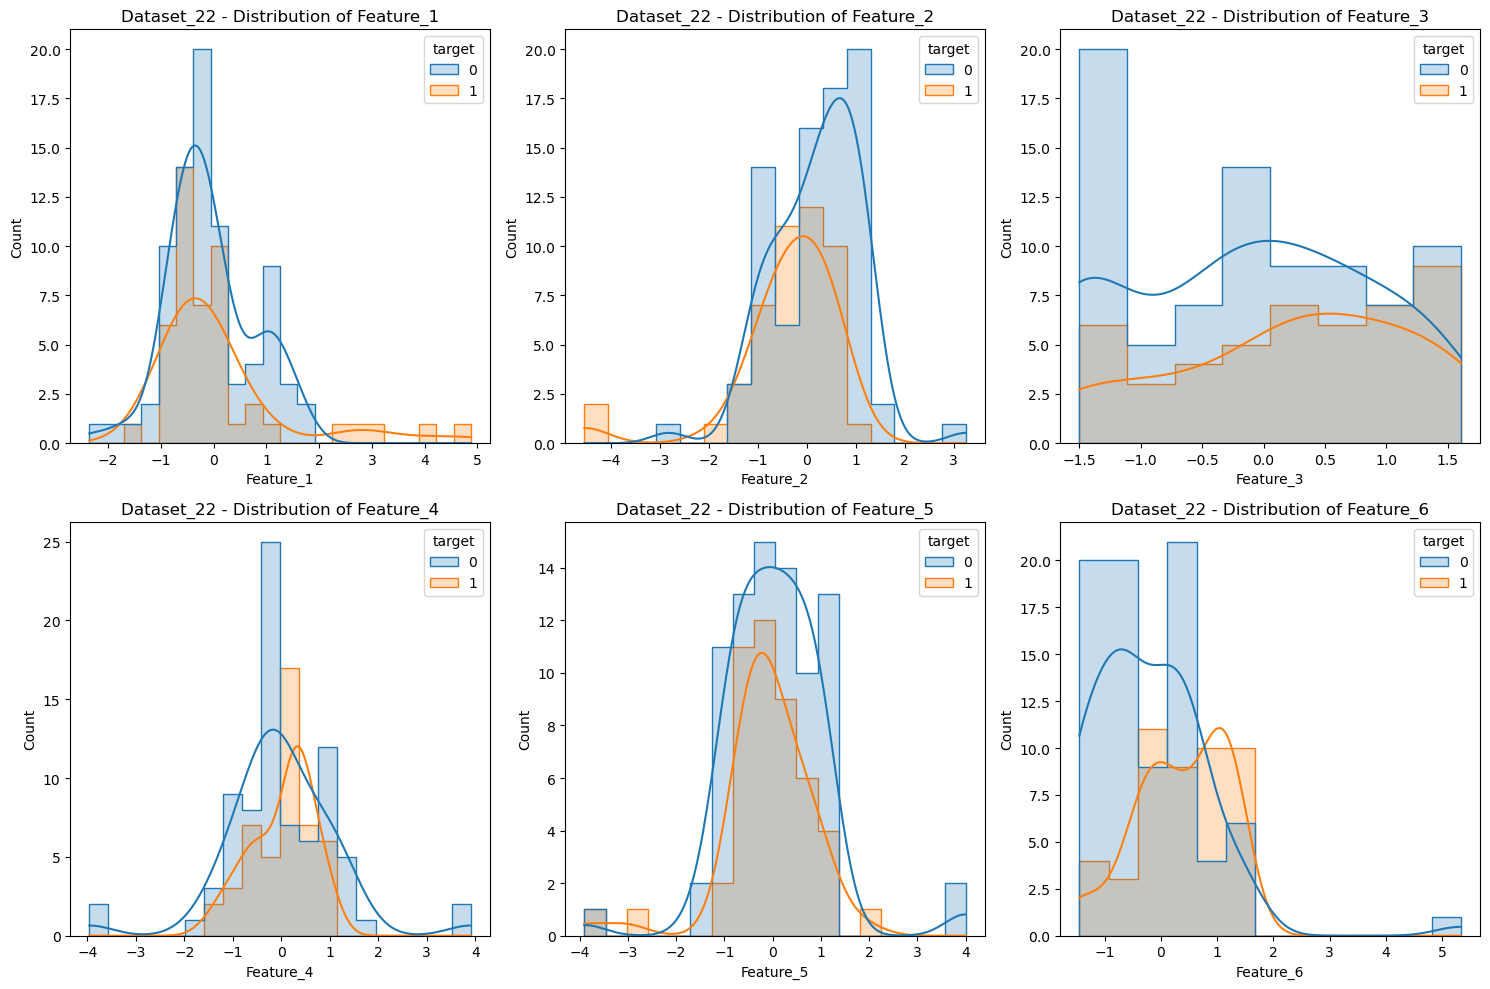

Dataset_22 - Validation Accuracy: 0.85
Dataset_22 - Validation F1 Score: 0.78

Dataset_22 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.27      0.81      0.40        21
           1       0.83      0.29      0.43        65

    accuracy                           0.42        86
   macro avg       0.55      0.55      0.42        86
weighted avg       0.69      0.42      0.43        86

Saved predictions for Dataset_22 to ../Group_DS34/Competition_data/Dataset_22/y_predict.csv.

Processing Dataset_49...
DEBUG INFO: Dataset_49 - y_train.keys(): Index(['target'], dtype='object')


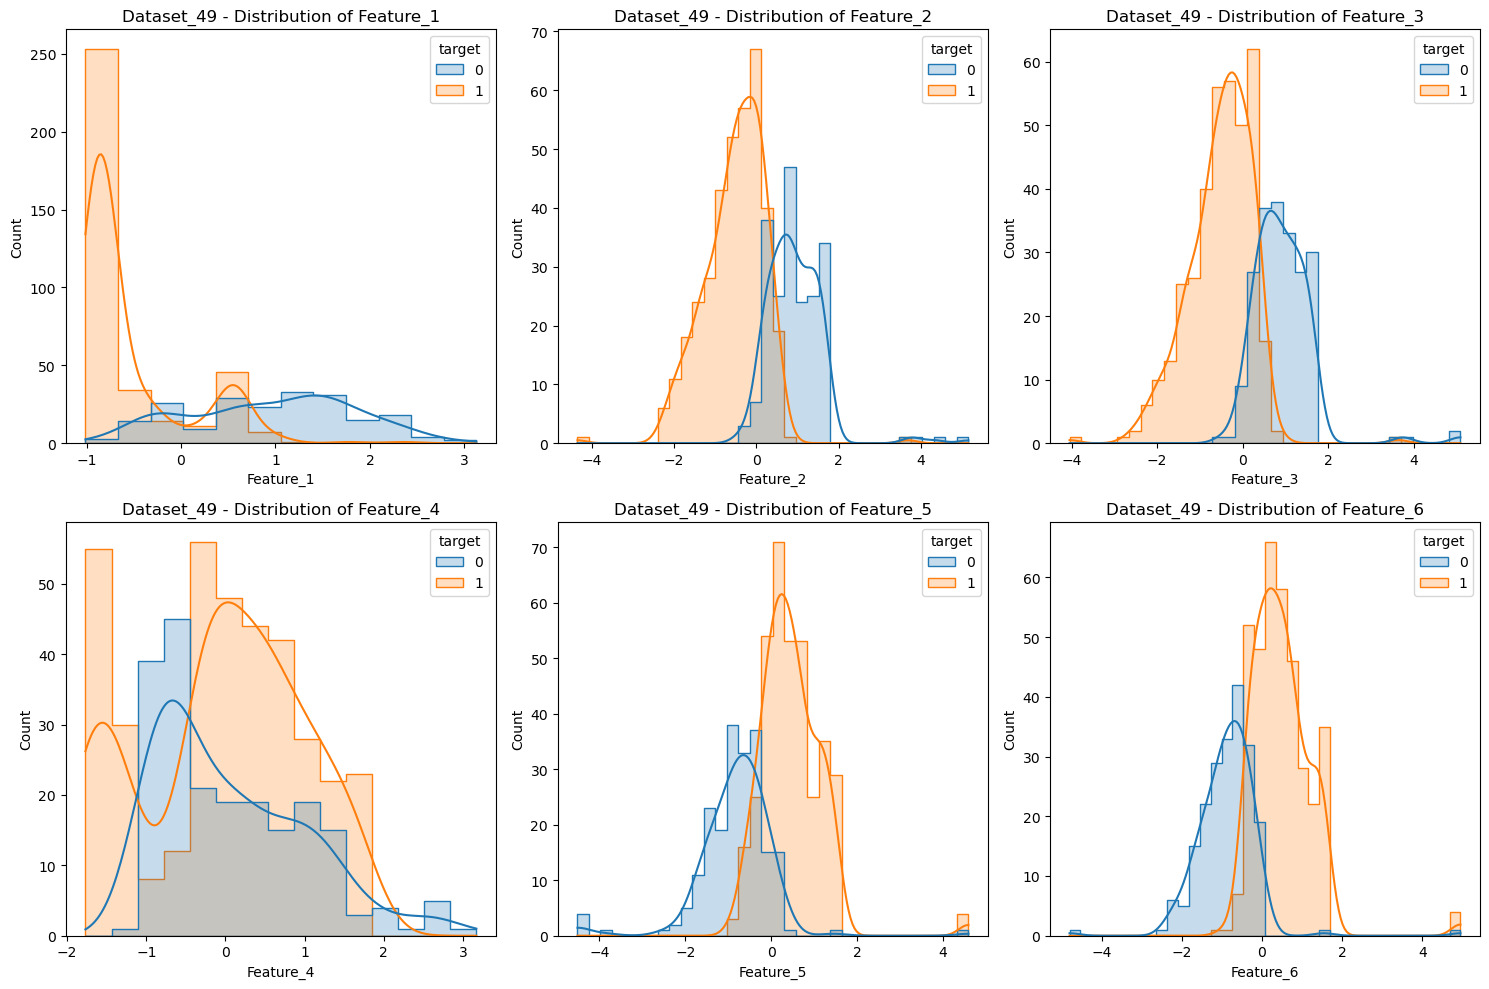

Dataset_49 - Validation Accuracy: 0.93
Dataset_49 - Validation F1 Score: 0.94

Dataset_49 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.98      0.94      0.96       246

    accuracy                           0.95       384
   macro avg       0.94      0.95      0.94       384
weighted avg       0.95      0.95      0.95       384

Saved predictions for Dataset_49 to ../Group_DS34/Competition_data/Dataset_49/y_predict.csv.

Processing Dataset_47...
DEBUG INFO: Dataset_47 - y_train.keys(): Index(['target'], dtype='object')


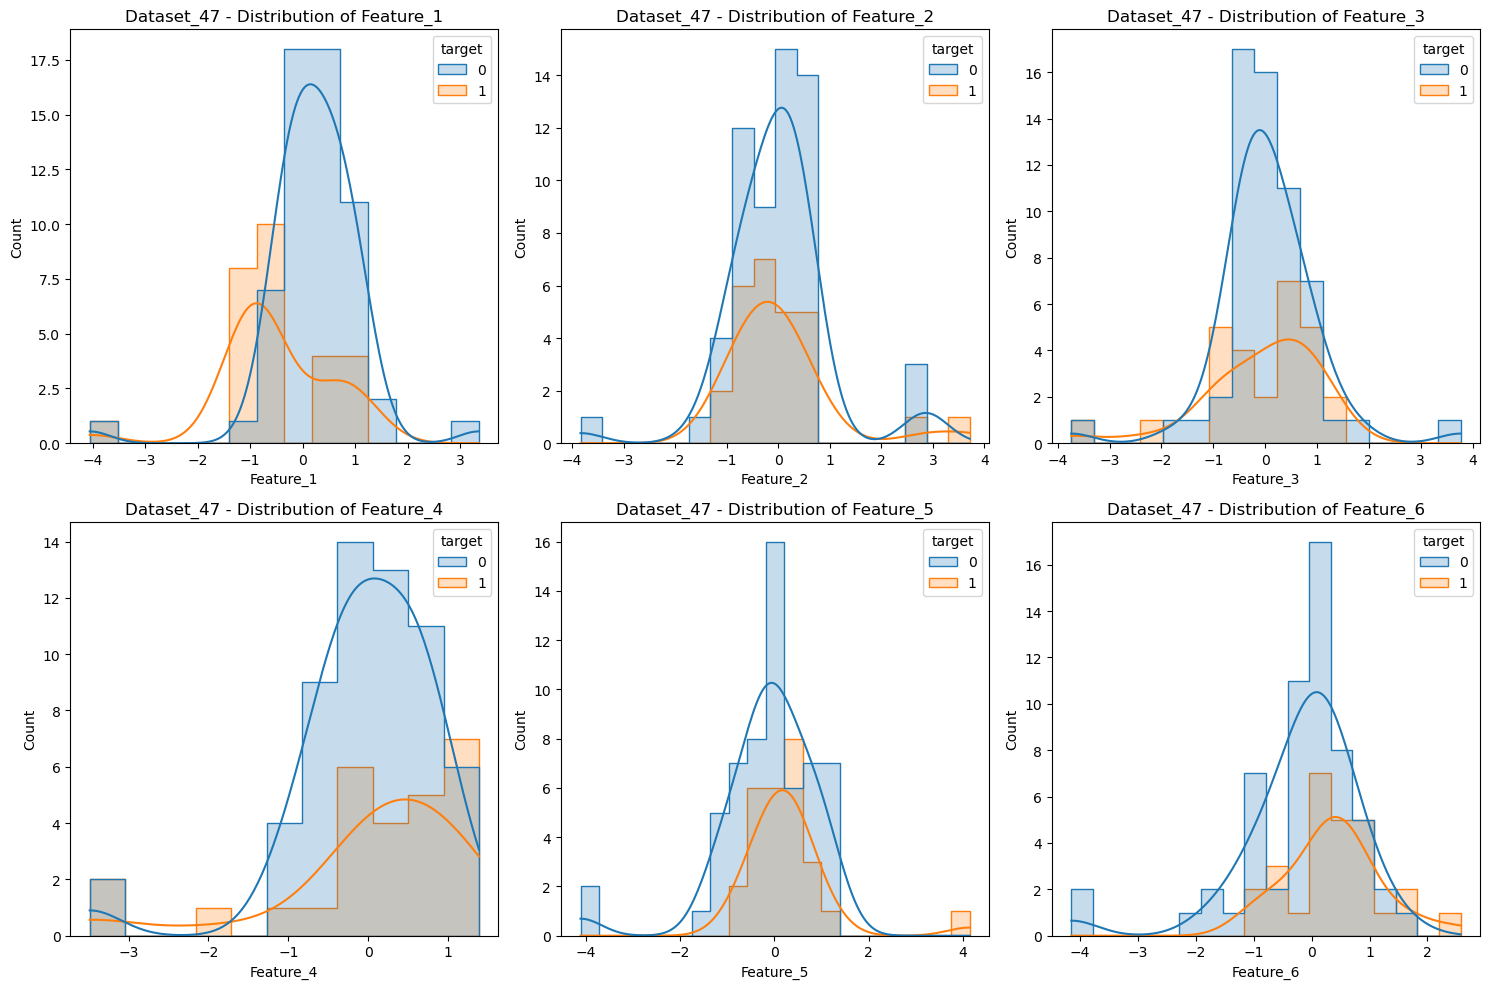

Dataset_47 - Validation Accuracy: 0.83
Dataset_47 - Validation F1 Score: 0.40

Dataset_47 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        45
           1       0.43      0.23      0.30        13

    accuracy                           0.76        58
   macro avg       0.62      0.57      0.58        58
weighted avg       0.72      0.76      0.73        58

Saved predictions for Dataset_47 to ../Group_DS34/Competition_data/Dataset_47/y_predict.csv.

Processing Dataset_40...
DEBUG INFO: Dataset_40 - y_train.keys(): Index(['target'], dtype='object')


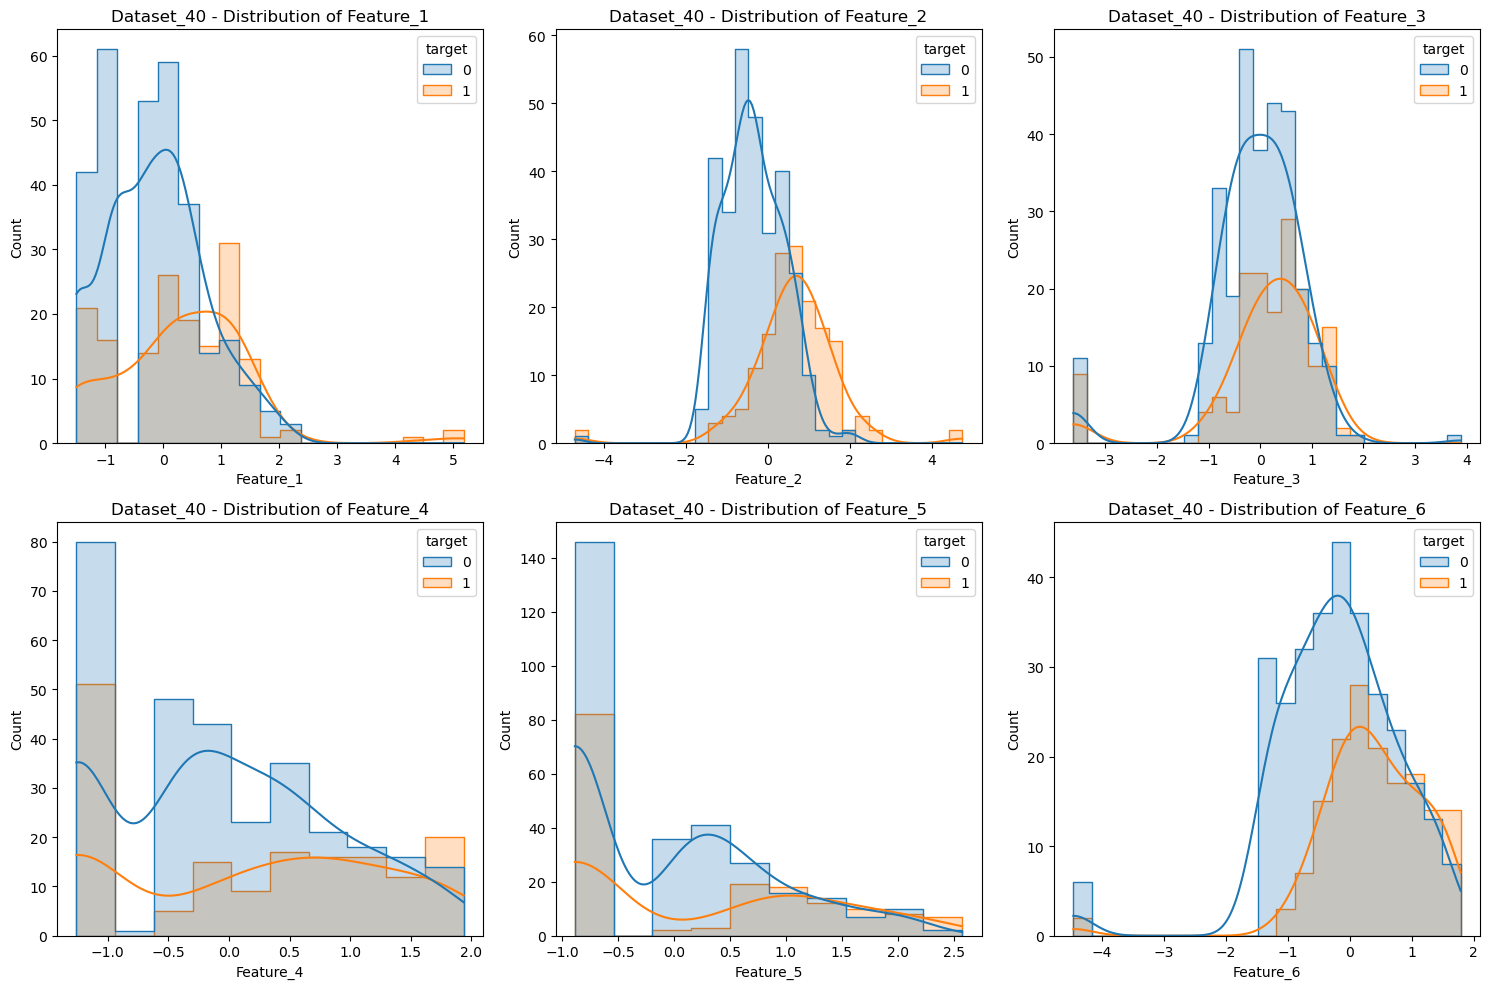

Dataset_40 - Validation Accuracy: 0.76
Dataset_40 - Validation F1 Score: 0.52

Dataset_40 - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.18      0.98      0.31        42
           1       0.99      0.32      0.48       266

    accuracy                           0.41       308
   macro avg       0.59      0.65      0.39       308
weighted avg       0.88      0.41      0.46       308

Saved predictions for Dataset_40 to ../Group_DS34/Competition_data/Dataset_40/y_predict.csv.



[('Dataset_2', '../Group_DS34/Competition_data/Dataset_2/y_predict.csv'),
 ('Dataset_35', '../Group_DS34/Competition_data/Dataset_35/y_predict.csv'),
 ('Dataset_5', '../Group_DS34/Competition_data/Dataset_5/y_predict.csv'),
 ('Dataset_32', '../Group_DS34/Competition_data/Dataset_32/y_predict.csv'),
 ('Dataset_4', '../Group_DS34/Competition_data/Dataset_4/y_predict.csv'),
 ('Dataset_33', '../Group_DS34/Competition_data/Dataset_33/y_predict.csv'),
 ('Dataset_3', '../Group_DS34/Competition_data/Dataset_3/y_predict.csv'),
 ('Dataset_34', '../Group_DS34/Competition_data/Dataset_34/y_predict.csv'),
 ('Dataset_45', '../Group_DS34/Competition_data/Dataset_45/y_predict.csv'),
 ('Dataset_42', '../Group_DS34/Competition_data/Dataset_42/y_predict.csv'),
 ('Dataset_27', '../Group_DS34/Competition_data/Dataset_27/y_predict.csv'),
 ('Dataset_18', '../Group_DS34/Competition_data/Dataset_18/y_predict.csv'),
 ('Dataset_20', '../Group_DS34/Competition_data/Dataset_20/y_predict.csv'),
 ('Dataset_16', '../

In [6]:

# Loop through all datasets, apply preprocessing, train model, and save results
results = []

for dataset_folder in dataset_folders:
    dataset_name = os.path.basename(dataset_folder)
    print(f"Processing {dataset_name}...")
    
    # Load data
    X_train, X_test, y_train, y_predict = load_dataset(dataset_folder)
    
    print(f"DEBUG INFO: {dataset_name} - y_train.keys(): {y_train.keys()}")
    # Preprocess and visualize
    try:
        y_train = y_train['target'].astype(int)  # Ensure binary target is integer type
    except KeyError:
        
        y_train = y_train['y'].astype(int)

    #y_predict_binary = (y_predict['y_predict_proba'] >= 0.5).astype(int)  # Convert to binary predictions
    y_predict_binary = (y_predict['target'] >= 0.5).astype(int)  # Convert to binary predictions
    X_train_scaled = preprocess_and_visualize(X_train, y_train, dataset_name)
    
    # Train model and get predictions
    model, y_test_pred = train_and_evaluate_model(X_train_scaled.drop(columns='target'), y_train, X_test, y_predict_binary, dataset_name)
    
    # Save results for each dataset
    results_df = pd.DataFrame({'True Labels': y_predict_binary, 'Predicted Labels': y_test_pred})
    #results_path = f"{dataset_name}_predictions.csv"
    results_path = f"{competition_data_dir}/{dataset_name}/y_predict.csv"
    results_df.to_csv(results_path, index=False)
    results.append((dataset_name, results_path))
    print(f"Saved predictions for {dataset_name} to {results_path}.\n")
    
results  # Display all saved result paths
